```
Trabalho para conclusão do Nanodegree em Data Science da Udacity.

Aluno: Ítalo dos Santos Barreto
```
[Jornada d](https://medium.com/@talobarreto/seu-professor-vai-continuar-na-escola-dc9fb146963e)


<h1> <center> Será que um professor fica por 2 anos em uma escola? </center> </h1>



<img src='https://media.giphy.com/media/xT5LMpjrnf2Ao4hBMk/giphy.gif'/>




In [3]:
#importacoes de bibliotecas
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
import os
from glob import glob
from pathlib import Path
import seaborn as sns
from unicodedata import normalize
from tqdm import tqdm
from scipy import stats
from sklearn import metrics
from tqdm import tqdm
from IPython.core.display import display, HTML
import folium

#Arquivos criados para deixar o codigo do notebook mais clean.
from files_util import *
from df_inep_utils import *
from SetorCensitario import *
from modelagem import *
from sklearn import cluster 
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

In [4]:
#Configuracao para mostrar duas casas decimans.
pd.options.display.float_format = '{:.2f}'.format
anos_psq = [2007,2009,2011,2013,2014,2015,2017]


## <center> Vamos começar a jornada</center>
<img src='https://media.giphy.com/media/fdHg7T902uzLy/giphy.gif'/>

## 01. Obtencao dos dados brutos

In [4]:
#extraindo arquivos baixados
#funcoes de file_utils
shutil.rmtree(ARQ_PATH,ignore_errors=True)
os.mkdir(ARQ_PATH)
list(map(extrai_arq,glob(f'{CSV_PATH}*.zip')));

patool: Extracting /home/itsbarreto/csv/educacao/micro_censo_escolar_2013.zip ...
patool: ... /home/itsbarreto/csv/educacao/micro_censo_escolar_2013.zip extracted to `/home/itsbarreto/csv/educacao/TMP/'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2013/DADOS/TURMAS.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/educacao/TMP/2013/DADOS/TURMAS.rar
patool:     with cwd='/home/itsbarreto/csv/educacao/dsc/2013'
patool: ... /home/itsbarreto/csv/educacao/TMP/2013/DADOS/TURMAS.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2013'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2013/DADOS/MATRICULA_CO.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/educacao/TMP/2013/DADOS/MATRICULA_CO.rar
patool:     with cwd='/home/itsbarreto/csv/educacao/dsc/2013'
patool: ... /home/itsbarreto/csv/educacao/TMP/2013/DADOS/MATRICULA_CO.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2013'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2013/DADOS/ES

patool: ... /home/itsbarreto/csv/educacao/TMP/2011/DADOS/TURMAS.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2011'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2011/DADOS/MATRICULA_CO.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/educacao/TMP/2011/DADOS/MATRICULA_CO.rar
patool:     with cwd='/home/itsbarreto/csv/educacao/dsc/2011'
patool: ... /home/itsbarreto/csv/educacao/TMP/2011/DADOS/MATRICULA_CO.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2011'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2011/DADOS/ESCOLAS.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/educacao/TMP/2011/DADOS/ESCOLAS.rar
patool:     with cwd='/home/itsbarreto/csv/educacao/dsc/2011'
patool: ... /home/itsbarreto/csv/educacao/TMP/2011/DADOS/ESCOLAS.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2011'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2011/DADOS/DOCENTES_CO.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/edu

## 02. Carregando dados

In [4]:
#importacao do arquivo DOCENTES
#funcao de arquivos muito velhos, anos anteriores a 2011 nao tem o tipo de contratacao
fmv = lambda df: df.loc[(df.FK_COD_ESTADO == 53) & (df.ID_DEPENDENCIA_ADM == 2)]  
fv = lambda df: df.loc[(df.FK_COD_ESTADO == 53) & (df.ID_TIPO_CONTRATACAO == 1) & (df.ID_DEPENDENCIA_ADM == 2)]  
fn = lambda df: df.loc[(df.CO_UF == 53) & (df.TP_TIPO_CONTRATACAO == 1) & (df.TP_DEPENDENCIA == 2)]
l_df_doc = lambda ano: monta_df_docente(f'{ARQ_PATH}/{ano}/DOCENTES_CO.CSV')
dfs = {a :  fmv(l_df_doc(a)) if a <= 2009 else fv(l_df_doc(a)) if a < 2015 else fn(l_df_doc(a)) for a in tqdm(anos_psq)}


  0%|          | 0/7 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
for k,v in dfs.items():
    if k <= 2009:
        print(f'O DF possuia em {k} {v.FK_COD_DOCENTE.nunique()} professores escolas distritais.')
    elif k<2015:
        print(f'O DF possuia em {k} {v.FK_COD_DOCENTE.nunique()} professores concursados em escolas distritais.')
    else:
        print(f'O DF possuia em {k} {v.CO_PESSOA_FISICA.nunique()} professores concursados em escolas distritais.')
    v.to_csv(f'{ARQ_PATH}DOCENTES_FILTRADOS_{k}.csv',index=None)


O DF possuia em 2007 18026 professores escolas distritais.
O DF possuia em 2009 20211 professores escolas distritais.
O DF possuia em 2011 14969 professores concursados em escolas distritais.
O DF possuia em 2013 15411 professores concursados em escolas distritais.
O DF possuia em 2014 15604 professores concursados em escolas distritais.
O DF possuia em 2015 17131 professores concursados em escolas distritais.
O DF possuia em 2017 15123 professores concursados em escolas distritais.


In [80]:
dfs = {a : ajusta_colunas_int_df_inep(pd.read_csv(f'{ARQ_PATH}DOCENTES_FILTRADOS_{a}.csv',low_memory=False)) for a in tqdm(anos_psq)}

100%|██████████| 7/7 [00:15<00:00,  2.16s/it]


<table columns=2 style='width:100%'><tr><td>
<img src='img/profa.jpg'/></td><td> <h2>Professores.</h2><br/>
    Professores que dão aula em escolas da rede estadual/distrital, localizadas no DF,  concursados, estáveis, que estão há mais de um ano na SEDF e que também estavam no Censo de 2017.</td></tr></table>

In [10]:
#seleciona os professores
cols_prof = ['CO_PESSOA_FISICA','NU_IDADE_REFERENCIA','TP_SEXO',
             'TP_COR_RACA','CO_UF_NASC',
'CO_UF_END',
'TP_ZONA_RESIDENCIAL','IN_POSSUI_NEC_ESPECIAL',
'IN_CEGUEIRA','IN_BAIXA_VISAO',
'IN_SURDEZ','IN_DEF_AUDITIVA',
'IN_SURDOCEGUEIRA','IN_DEF_FISICA',
'IN_DEF_INTELECTUAL','IN_DEF_MULTIPLA',
'TP_ESCOLARIDADE',
'TP_SITUACAO_CURSO_1','CO_AREA_CURSO_1',
'IN_LICENCIATURA_1','IN_COM_PEDAGOGICA_1','TP_TIPO_IES_1',
'TP_SITUACAO_CURSO_2','CO_AREA_CURSO_2',
'IN_LICENCIATURA_2',
'IN_COM_PEDAGOGICA_2','TP_TIPO_IES_2',
'TP_SITUACAO_CURSO_3','CO_AREA_CURSO_3','IN_LICENCIATURA_3',
'IN_COM_PEDAGOGICA_3','TP_TIPO_IES_3',
'IN_ESPECIALIZACAO','IN_MESTRADO',
'IN_DOUTORADO','IN_POS_NENHUM'
]
prof_pbc_df15 = dfs[2015][cols_prof].drop_duplicates()
prof_pbc_df15 = prof_pbc_df15.loc[((prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2013].FK_COD_DOCENTE)) | \
                                   (prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2014].FK_COD_DOCENTE))) & \
                                  (prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2017].CO_PESSOA_FISICA))]          
display(prof_pbc_df15.shape)
display(prof_pbc_df15.CO_PESSOA_FISICA.nunique())
#prof_pbc_df15.set_index('CO_PESSOA_FISICA',inplace=True)
prof_pbc_df15.head()

(9908, 36)

9908

CO_PESSOA_FISICA  NU_IDADE_REFERENCIA  TP_SEXO  TP_COR_RACA  CO_UF_NASC  \
2       115161698917                   41        2            0       53.00   
9       115111512003                   54        1            2       31.00   
14      115075856674                   41        2            0       35.00   
15      115075569420                   47        2            0       31.00   
16      115076358503                   41        2            1       53.00   

    CO_UF_END  TP_ZONA_RESIDENCIAL  IN_POSSUI_NEC_ESPECIAL  IN_CEGUEIRA  \
2       53.00                 1.00                       0          nan   
9       31.00                 2.00                       0          nan   
14      53.00                 1.00                       0          nan   
15      53.00                 1.00                       0          nan   
16      53.00                 1.00                       0          nan   

    IN_BAIXA_VISAO      ...        TP_TIPO_IES_2  TP_SITUACAO_CURSO_3  \
2              nan      ...                 2.00                  nan   
9              nan      ...                 2.00                  nan   
14             nan      ...                  nan                  nan   
15             nan      ...                  nan                  nan   
16             nan      ...                  nan                  nan   

    CO_AREA_CURSO_3  IN_LICENCIATURA_3  IN_COM_PEDAGOGICA_3  TP_TIPO_IES_3  \
2               nan                nan                  nan            nan   
9               nan                nan                  nan            nan   
14              nan                nan                  nan            nan   
15              nan                nan                  nan            nan   
16              nan                nan                  nan            nan   

    IN_ESPECIALIZACAO  IN_MESTRADO  IN_DOUTORADO  IN_POS_NENHUM  
2                0.00         0.00          0.00           1.00  
9                1.00         1.00          0.00           0.00  
14               1.00         0.00          0.00           0.00  
15               1.00         0.00          0.00           0.00  
16               1.00         0.00          0.00           0.00  

[5 rows x 36 columns]

In [11]:
#criação de features de professores
cols_drop = []
prof_pbc_df15['IN_MORA_ZONA_URBANA'] = (prof_pbc_df15.TP_ZONA_RESIDENCIAL == 1).astype(np.int8)
cols_drop.append('TP_ZONA_RESIDENCIAL')
prof_pbc_df15['IN_NASCEU_DF'] = (prof_pbc_df15.CO_UF_NASC == 53).astype(np.int8)
cols_drop.append('CO_UF_NASC')
prof_pbc_df15['IN_MORA_DF'] = (prof_pbc_df15.CO_UF_END == 53).astype(np.int8)
cols_drop.append('CO_UF_END')
prof_pbc_df15['IN_MULHER'] = (prof_pbc_df15.TP_SEXO == 2).astype(np.int8)
cols_drop.append('TP_SEXO')
prof_pbc_df15['NU_QTD_GRAD'] = (prof_pbc_df15.TP_SITUACAO_CURSO_1 == 1).astype(np.int8)  + (prof_pbc_df15.TP_SITUACAO_CURSO_2 == 1).astype(np.int8) + (prof_pbc_df15.TP_SITUACAO_CURSO_3 == 1).astype(np.int8)  
cols_drop.append('TP_SITUACAO_CURSO_1')
cols_drop.append('TP_SITUACAO_CURSO_2')
cols_drop.append('TP_SITUACAO_CURSO_3')
prof_pbc_df15['NU_QTD_GRAD_PBC'] = (prof_pbc_df15.TP_TIPO_IES_1 == 1).astype(np.int8)  + (prof_pbc_df15.TP_TIPO_IES_2 == 1).astype(np.int8) + (prof_pbc_df15.TP_TIPO_IES_3 == 1).astype(np.int8)  
prof_pbc_df15['NU_QTD_GRAD_PRIV'] = (prof_pbc_df15.TP_TIPO_IES_1 == 2).astype(np.int8)  + (prof_pbc_df15.TP_TIPO_IES_2 == 2).astype(np.int8) + (prof_pbc_df15.TP_TIPO_IES_3 == 2).astype(np.int8)  
cols_drop.append('TP_TIPO_IES_1')
cols_drop.append('TP_TIPO_IES_2')
cols_drop.append('TP_TIPO_IES_3')
prof_pbc_df15['NU_QTD_LICENCIATURA'] = (prof_pbc_df15.IN_LICENCIATURA_1 == 1).astype(np.int8)  + (prof_pbc_df15.IN_LICENCIATURA_2 == 1).astype(np.int8) + (prof_pbc_df15.IN_LICENCIATURA_3 == 1).astype(np.int8)  
cols_drop.append('IN_LICENCIATURA_1')
cols_drop.append('IN_LICENCIATURA_2')
cols_drop.append('IN_LICENCIATURA_3')
prof_pbc_df15['NU_QTD_COM_PEDAGOGICA'] = (prof_pbc_df15.IN_COM_PEDAGOGICA_1 == 1).astype(np.int8)  + (prof_pbc_df15.IN_COM_PEDAGOGICA_2 == 1).astype(np.int8) + (prof_pbc_df15.IN_COM_PEDAGOGICA_3 == 1).astype(np.int8)  
cols_drop.append('IN_COM_PEDAGOGICA_1')
cols_drop.append('IN_COM_PEDAGOGICA_2')
cols_drop.append('IN_COM_PEDAGOGICA_3')
prof_pbc_df15['IN_PROF_2007'] = prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2007].FK_COD_DOCENTE.values)
prof_pbc_df15['IN_PROF_2009'] = prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2009].FK_COD_DOCENTE.values)
prof_pbc_df15['IN_PROF_2011'] = prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2011].FK_COD_DOCENTE.values)
prof_pbc_df15['IN_PROF_2013'] = prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2013].FK_COD_DOCENTE.values)
prof_pbc_df15['NU_ANO_PRIM_CENSO'] = prof_pbc_df15.apply(lambda x: \
                                                         2007 if x['IN_PROF_2007'] == 1
                                                         else \
                                                         2009 if x['IN_PROF_2009'] == 1 \
                                                         else
                                                         2011 if x['IN_PROF_2011'] == 1 \
                                                         else
                                                         2013 if x['IN_PROF_2013'] == 1 \
                                                         else 2014 \
                                                         ,axis=1)
cols_drop.append('IN_PROF_2007')
cols_drop.append('IN_PROF_2009')
cols_drop.append('IN_PROF_2011')
cols_drop.append('IN_PROF_2013')
monta_nu_cursos_area = lambda x: (prof_pbc_df15.CO_AREA_CURSO_1.fillna(0).astype(np.int8) == np.int8(x)).astype(np.int8) + \
                                 (prof_pbc_df15.CO_AREA_CURSO_2.fillna(0).astype(np.int8) == np.int8(x)).astype(np.int8) + \
                                 (prof_pbc_df15.CO_AREA_CURSO_3.fillna(0).astype(np.int8) == np.int8(x)).astype(np.int8)
prof_pbc_df15['NU_GRAD_AREA_EDUCACAO']    = pd.Series(monta_nu_cursos_area(1))
prof_pbc_df15['NU_GRAD_AREA_HUMANIDADES'] = pd.Series(monta_nu_cursos_area(2))
prof_pbc_df15['NU_GRAD_AREA_SOCIAIS']  = pd.Series(monta_nu_cursos_area(3)) 
prof_pbc_df15['NU_GRAD_AREA_MATEMATICA']  = pd.Series(monta_nu_cursos_area(4)) 
prof_pbc_df15['NU_GRAD_AREA_ENGENHARIA']  = pd.Series(monta_nu_cursos_area(5)) 
prof_pbc_df15['NU_GRAD_AREA_AGRICULTURA'] = pd.Series(monta_nu_cursos_area(6)) 
prof_pbc_df15['NU_GRAD_AREA_SERVICOS']    = pd.Series(monta_nu_cursos_area(7)) 
prof_pbc_df15['NU_GRAD_AREA_SAUDE']       = pd.Series(monta_nu_cursos_area(8)) 
prof_pbc_df15['NU_GRAD_AREA_OUTROS']      = pd.Series(monta_nu_cursos_area(9)) 
cols_drop.append('CO_AREA_CURSO_1')
cols_drop.append('CO_AREA_CURSO_2')
cols_drop.append('CO_AREA_CURSO_3')
prof_pbc_df15 = prof_pbc_df15.merge(pd.get_dummies(prof_pbc_df15.TP_COR_RACA,prefix='TP_COR_RACA',dtype=np.int8),right_index=True,left_index=True)     
cols_drop.append('TP_COR_RACA')
for a in anos_psq[:-1]:
    prof_pbc_df15[f'NU_QTD_TURMAS_INFANT_{a}'] = prof_pbc_df15.merge(monta_por_tip_serie(dfs[a],'INFANT',a,nivel_escola=False), \
                   on='CO_PESSOA_FISICA', \
                   how='left',suffixes=('','_y'))[f'NU_QTD_TURMAS_INFANT_{a}'].fillna(0)
    prof_pbc_df15[f'NU_QTD_TURMAS_MEDIO_{a}'] = prof_pbc_df15.merge(monta_por_tip_serie(dfs[a],'MEDIO',a,nivel_escola=False), \
                   on='CO_PESSOA_FISICA', \
                   how='left',suffixes=('','_y'))[f'NU_QTD_TURMAS_MEDIO_{a}'].fillna(0)
cols_drop.extend([c for c in prof_pbc_df15.columns if c.endswith('_y')])

a,b = pd.qcut(prof_pbc_df15.NU_IDADE_REFERENCIA.unique(),5,retbins=True,labels=['Muito jovem','Jovem','Meia idade', 'Idoso','Melhor idade'])      
prof_pbc_df15['CLSC_QTL_NU_IDADE_REFERENCIA'] = pd.cut(prof_pbc_df15.NU_IDADE_REFERENCIA, bins=b, labels=False, include_lowest=True)   
prof_pbc_df15.set_index('CO_PESSOA_FISICA',inplace=True)
prof_pbc_df15['NU_QTD_ESCOLAS_2015'] = dfs[2015].groupby('CO_PESSOA_FISICA')['CO_ENTIDADE'].nunique()

In [12]:
#indexando e removendo colunas desnecessarias
prof_pbc_df15.drop(cols_drop,axis=1,inplace=True)
display(prof_pbc_df15.shape)
prof_pbc_df15.head()

(9908, 54)

NU_IDADE_REFERENCIA  IN_POSSUI_NEC_ESPECIAL  IN_CEGUEIRA  \
CO_PESSOA_FISICA                                                             
115161698917                       41                       0          nan   
115111512003                       54                       0          nan   
115075856674                       41                       0          nan   
115075569420                       47                       0          nan   
115076358503                       41                       0          nan   

                  IN_BAIXA_VISAO  IN_SURDEZ  IN_DEF_AUDITIVA  \
CO_PESSOA_FISICA                                               
115161698917                 nan        nan              nan   
115111512003                 nan        nan              nan   
115075856674                 nan        nan              nan   
115075569420                 nan        nan              nan   
115076358503                 nan        nan              nan   

                  IN_SURDOCEGUEIRA  IN_DEF_FISICA  IN_DEF_INTELECTUAL  \
CO_PESSOA_FISICA                                                        
115161698917                   nan            nan                 nan   
115111512003                   nan            nan                 nan   
115075856674                   nan            nan                 nan   
115075569420                   nan            nan                 nan   
115076358503                   nan            nan                 nan   

                  IN_DEF_MULTIPLA         ...           \
CO_PESSOA_FISICA                          ...            
115161698917                  nan         ...            
115111512003                  nan         ...            
115075856674                  nan         ...            
115075569420                  nan         ...            
115076358503                  nan         ...            

                  NU_QTD_TURMAS_INFANT_2011  NU_QTD_TURMAS_MEDIO_2011  \
CO_PESSOA_FISICA                                                        
115161698917                           0.00                      0.00   
115111512003                           0.00                      0.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           0.00                      0.00   

                  NU_QTD_TURMAS_INFANT_2013  NU_QTD_TURMAS_MEDIO_2013  \
CO_PESSOA_FISICA                                                        
115161698917                           1.00                      0.00   
115111512003                           0.00                      3.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           0.00                      0.00   

                  NU_QTD_TURMAS_INFANT_2014  NU_QTD_TURMAS_MEDIO_2014  \
CO_PESSOA_FISICA                                                        
115161698917                           0.00                      0.00   
115111512003                           0.00                      5.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           1.00                      0.00   

                  NU_QTD_TURMAS_INFANT_2015  NU_QTD_TURMAS_MEDIO_2015  \
CO_PESSOA_FISICA                                                        
115161698917                           0.00                      0.00   
115111512003                           0.00                      7.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           1.00                      0.00   

                  CLSC_QTL_NU_IDADE_REFERENCIA  NU_QTD_

In [13]:
for c in prof_pbc_df15.columns:
    if not c.startswith('NU'):
        prof_pbc_df15[c] = prof_pbc_df15[c].fillna(0)
        

'0.0% de registros nulos'

'Variância: 57.08771032654555'

count   9908.00
mean      42.79
std        7.56
min       24.00
25%       37.00
50%       43.00
75%       47.00
max       69.00
Name: NU_IDADE_REFERENCIA, dtype: float64

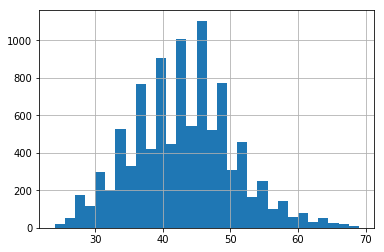

'0.0% de registros nulos'

'Variância: 0.009893085631781297'

qtd   pc
0  9809 0.99
1    99 0.01

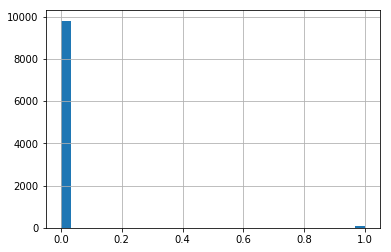

'0.0% de registros nulos'

'Variância: 0.0005044389609805372'

qtd   pc
0.00  9903 1.00
1.00     5 0.00

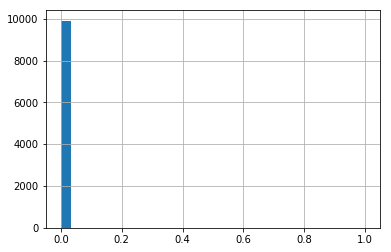

'0.0% de registros nulos'

'Variância: 0.0020146995642435677'

qtd   pc
0.00  9888 1.00
1.00    20 0.00

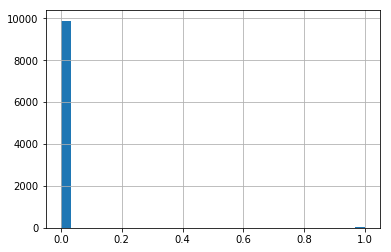

'0.0% de registros nulos'

'Variância: 0.00040359191918017996'

qtd   pc
0.00  9904 1.00
1.00     4 0.00

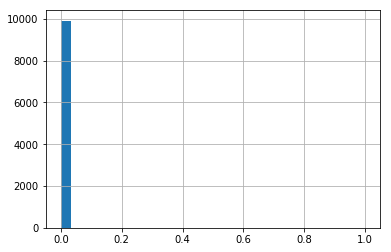

'0.0% de registros nulos'

'Variância: 0.0012097977480435684'

qtd   pc
0.00  9896 1.00
1.00    12 0.00

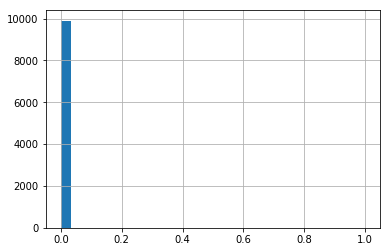

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  9908 1.00

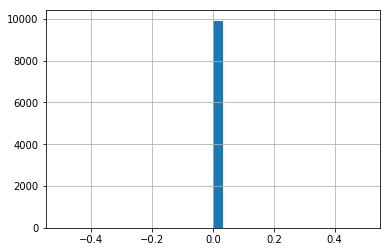

'0.0% de registros nulos'

'Variância: 0.006019648455301776'

qtd   pc
0.00  9848 0.99
1.00    60 0.01

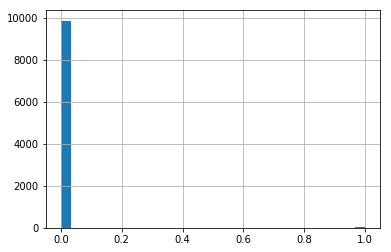

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  9908 1.00

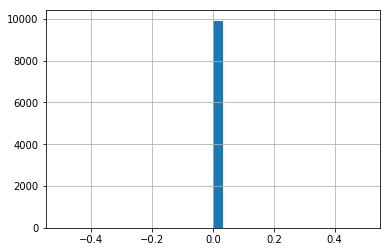

'0.0% de registros nulos'

'Variância: 0.00020183670998579362'

qtd   pc
0.00  9906 1.00
1.00     2 0.00

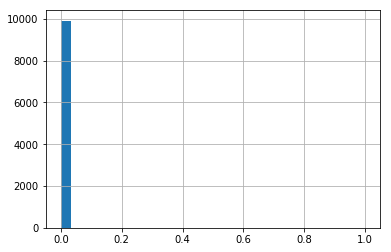

'0.0% de registros nulos'

'Variância: 0.021713440853795767'

qtd   pc
4  9688 0.98
3   220 0.02

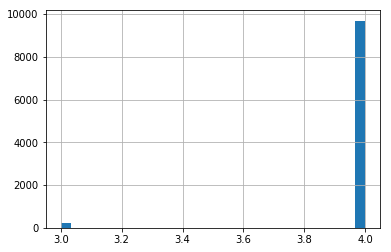

'0.0% de registros nulos'

'Variância: 0.2479248046875'

qtd   pc
1.00  5409 0.55
0.00  4499 0.45

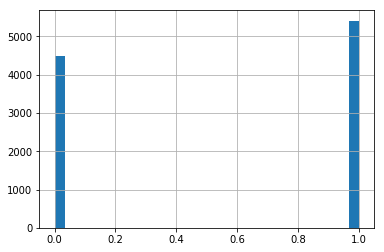

'0.0% de registros nulos'

'Variância: 0.0293731689453125'

qtd   pc
0.00  9608 0.97
1.00   300 0.03

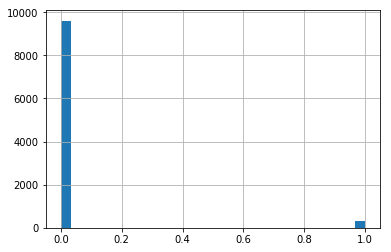

'0.0% de registros nulos'

'Variância: 0.002216339111328125'

qtd   pc
0.00  9886 1.00
1.00    22 0.00

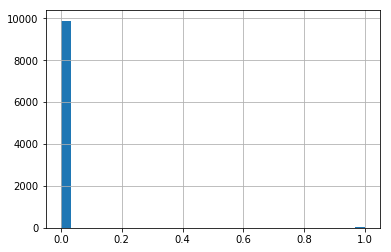

'0.0% de registros nulos'

'Variância: 0.2418212890625'

qtd   pc
0.00  5851 0.59
1.00  4057 0.41

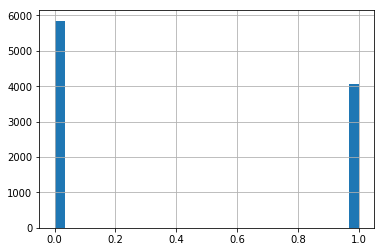

'0.0% de registros nulos'

'Variância: 0.01813061512437082'

qtd   pc
1  9725 0.98
0   183 0.02

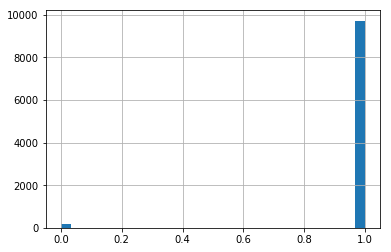

'0.0% de registros nulos'

'Variância: 0.25001544439997664'

qtd   pc
1  4985 0.50
0  4923 0.50

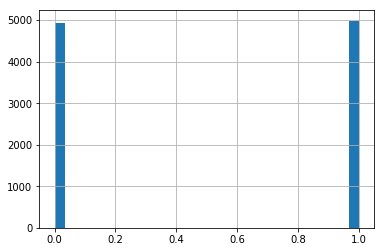

'0.0% de registros nulos'

'Variância: 0.19918141420091792'

qtd   pc
1  7188 0.73
0  2720 0.27

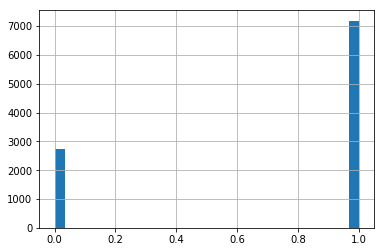

'0.0% de registros nulos'

'Variância: 0.19163770094580443'

qtd   pc
1  7348 0.74
0  2560 0.26

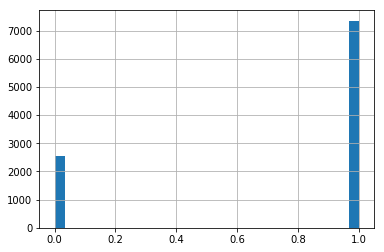

'0.0% de registros nulos'

'Variância: 0.05890489057316615'

qtd   pc
1  9362 0.94
2   313 0.03
0   220 0.02
3    13 0.00

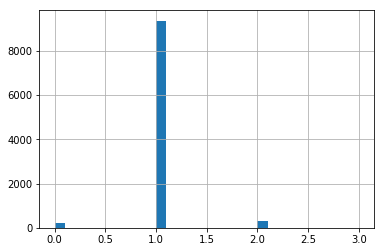

'0.0% de registros nulos'

'Variância: 0.2707247140025165'

qtd   pc
1  5233 0.53
0  4568 0.46
2   103 0.01
3     4 0.00

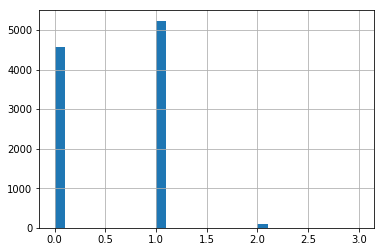

'0.0% de registros nulos'

'Variância: 0.27523909377802985'

qtd   pc
0  5398 0.54
1  4388 0.44
2   118 0.01
3     4 0.00

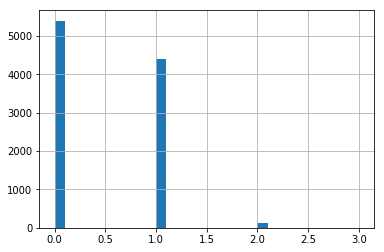

'0.0% de registros nulos'

'Variância: 0.1427312255897489'

qtd   pc
1  8355 0.84
0  1390 0.14
2   159 0.02
3     4 0.00

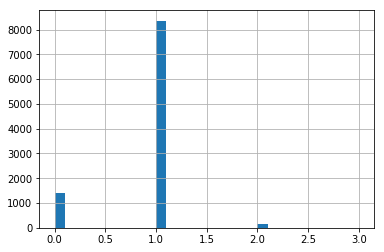

'0.0% de registros nulos'

'Variância: 0.10729689218329577'

qtd   pc
0  8737 0.88
1  1160 0.12
2    11 0.00

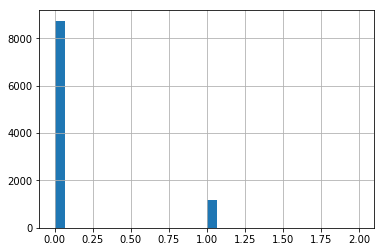

'0.0% de registros nulos'

'Variância: 5.7710933726441525'

qtd   pc
2007  5935 0.60
2009  1660 0.17
2013  1148 0.12
2011   617 0.06
2014   548 0.06

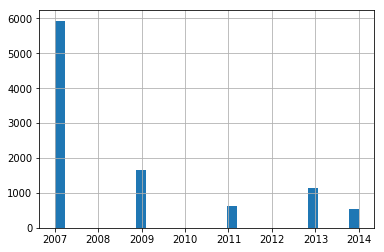

'0.0% de registros nulos'

'Variância: 0.10381028832575735'

qtd   pc
1  8852 0.89
0   843 0.09
2   209 0.02
3     4 0.00

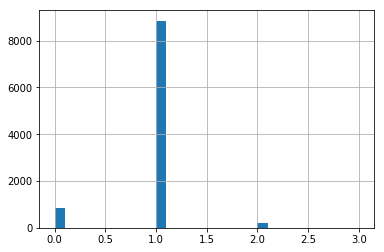

'0.0% de registros nulos'

'Variância: 0.031742225303314366'

qtd   pc
0  9586 0.97
1   321 0.03
2     1 0.00

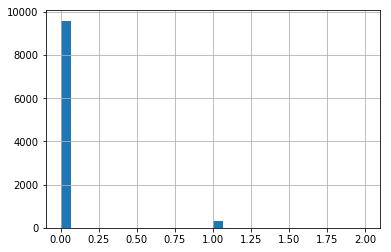

'0.0% de registros nulos'

'Variância: 0.012463213089646511'

qtd   pc
0  9786 0.99
1   121 0.01
2     1 0.00

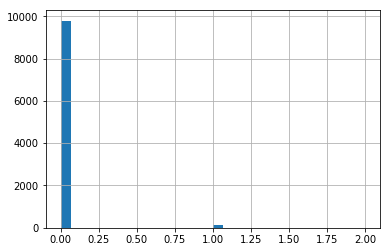

'0.0% de registros nulos'

'Variância: 0.015993582872184876'

qtd   pc
0  9750 0.98
1   157 0.02
2     1 0.00

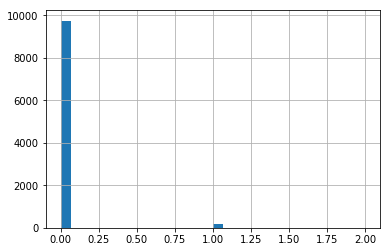

'0.0% de registros nulos'

'Variância: 0.0026175201680839724'

qtd   pc
0  9882 1.00
1    26 0.00

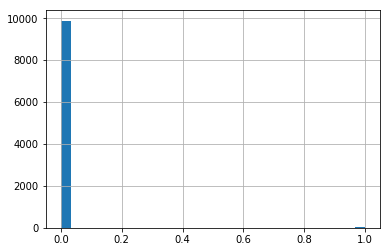

'0.0% de registros nulos'

'Variância: 0.0003027245021819595'

qtd   pc
0  9905 1.00
1     3 0.00

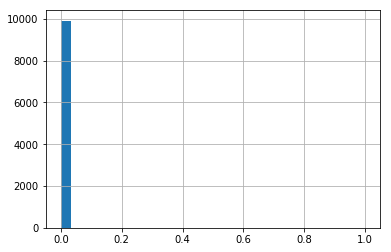

'0.0% de registros nulos'

'Variância: 0.004821586821224225'

qtd   pc
0  9860 1.00
1    48 0.00

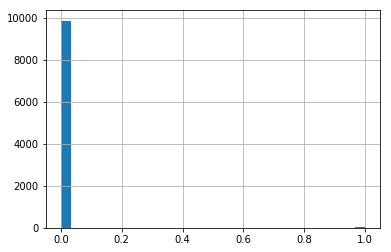

'0.0% de registros nulos'

'Variância: 0.00020183670998583138'

qtd   pc
0  9906 1.00
1     2 0.00

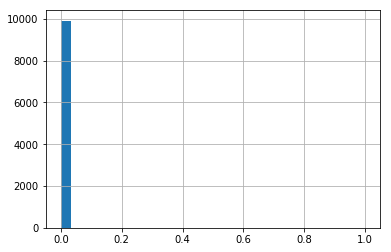

'0.0% de registros nulos'

'Variância: 0.012064429717160874'

qtd   pc
0  9787 0.99
1   121 0.01

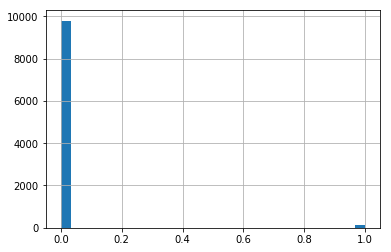

'0.0% de registros nulos'

'Variância: 0.2275592868338446'

qtd   pc
0  6439 0.65
1  3469 0.35

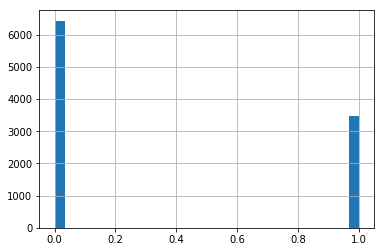

'0.0% de registros nulos'

'Variância: 0.21172270504875812'

qtd   pc
0  6893 0.70
1  3015 0.30

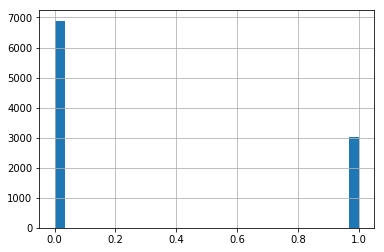

'0.0% de registros nulos'

'Variância: 0.042716551372251235'

qtd   pc
0  9465 0.96
1   443 0.04

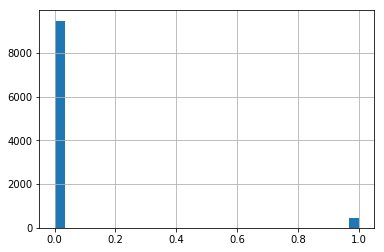

'0.0% de registros nulos'

'Variância: 0.2078775486469055'

qtd   pc
0  6988 0.71
1  2920 0.29

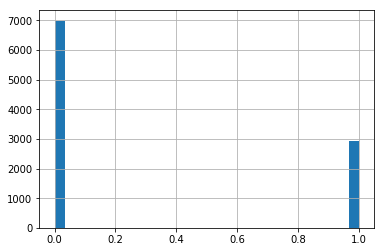

'0.0% de registros nulos'

'Variância: 0.0051213772949145675'

qtd   pc
0  9857 0.99
1    51 0.01

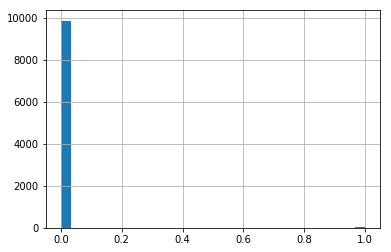

'0.0% de registros nulos'

'Variância: 0.0010083685420148186'

qtd   pc
0  9898 1.00
1    10 0.00

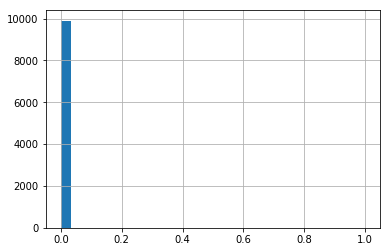

'89.28138877674606% de registros nulos'

'Variância: 0.06811610409111936'

qtd   pc
0.00  984 0.10
1.00   78 0.01

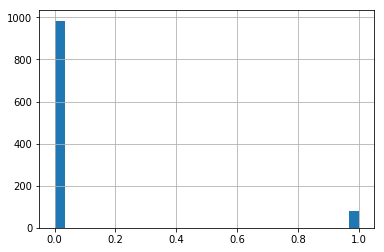

'89.28138877674606% de registros nulos'

'Variância: 7.339940645129359'

count   1062.00
mean       0.76
std        2.71
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       21.00
Name: NU_QTD_TURMAS_MEDIO_2007, dtype: float64

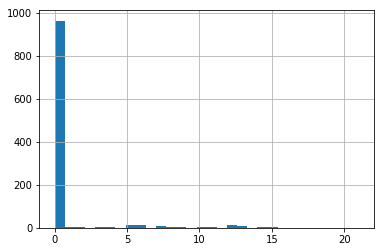

'89.28138877674606% de registros nulos'

'Variância: 0.058339590089299266'

qtd   pc
0.00  996 0.10
1.00   66 0.01

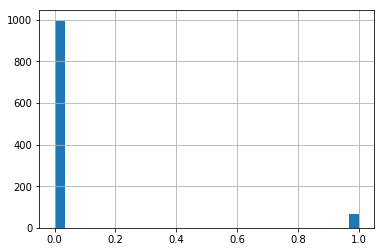

'89.28138877674606% de registros nulos'

'Variância: 11.599738014984196'

count   1062.00
mean       1.09
std        3.41
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       25.00
Name: NU_QTD_TURMAS_MEDIO_2009, dtype: float64

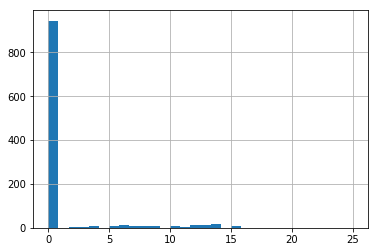

'89.28138877674606% de registros nulos'

'Variância: 0.05272448441668317'

qtd   pc
0.00  1006 0.10
1.00    55 0.01
2.00     1 0.00

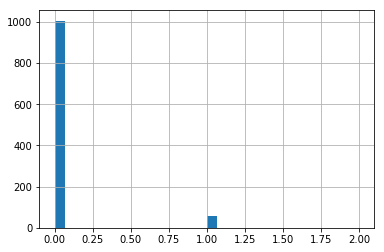

'89.28138877674606% de registros nulos'

'Variância: 14.061083687883109'

count   1062.00
mean       1.27
std        3.75
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       28.00
Name: NU_QTD_TURMAS_MEDIO_2011, dtype: float64

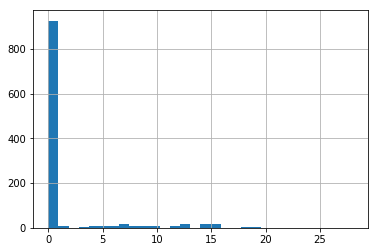

'89.28138877674606% de registros nulos'

'Variância: 0.06080768063387603'

qtd   pc
0.00  993 0.10
1.00   69 0.01

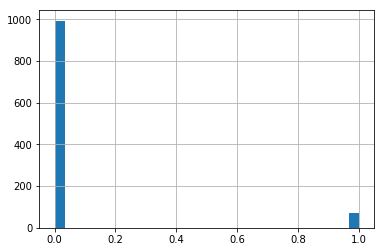

'89.28138877674606% de registros nulos'

'Variância: 11.1603060751768'

count   1062.00
mean       1.15
std        3.34
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       28.00
Name: NU_QTD_TURMAS_MEDIO_2013, dtype: float64

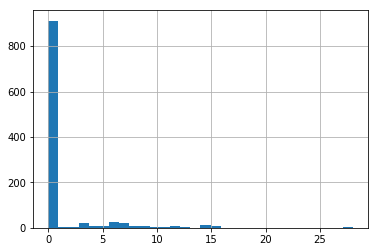

'89.28138877674606% de registros nulos'

'Variância: 0.09491809418325721'

qtd   pc
0.00  981 0.10
1.00   77 0.01
3.00    3 0.00
2.00    1 0.00

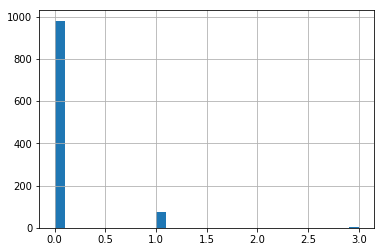

'89.28138877674606% de registros nulos'

'Variância: 16.230487352478413'

count   1062.00
mean       1.55
std        4.03
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       28.00
Name: NU_QTD_TURMAS_MEDIO_2014, dtype: float64

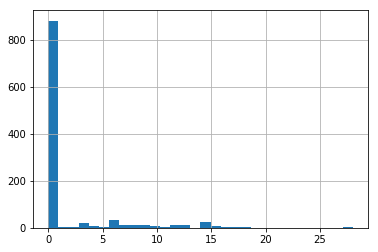

'89.28138877674606% de registros nulos'

'Variância: 0.07240530998897592'

qtd   pc
0.00  982 0.10
1.00   79 0.01
2.00    1 0.00

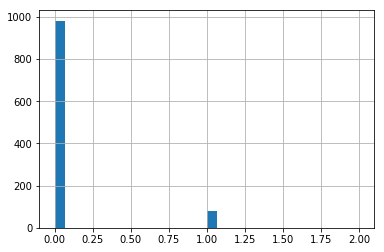

'89.28138877674606% de registros nulos'

'Variância: 13.259900317896474'

count   1062.00
mean       1.45
std        3.64
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       25.00
Name: NU_QTD_TURMAS_MEDIO_2015, dtype: float64

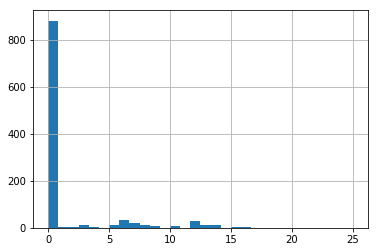

'0.0% de registros nulos'

'Variância: 0.7776573546985432'

qtd   pc
2  4006 0.40
1  3623 0.37
0  1117 0.11
3   990 0.10
4   172 0.02

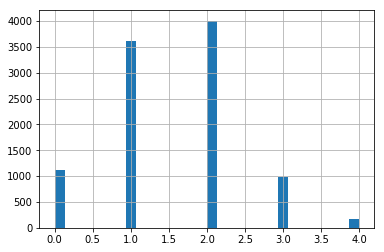

'0.0% de registros nulos'

'Variância: 0.06995737590109899'

qtd   pc
1  9185 0.93
2   715 0.07
3     8 0.00

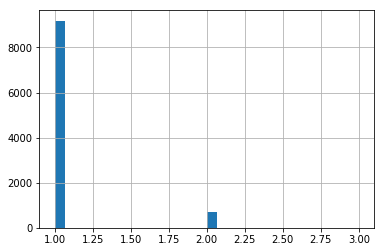

In [251]:
explora_df(prof_pbc_df15)

In [15]:
#salva arquivo com todas as features dos professores
prof_pbc_df15.to_csv(f'{PATH_DF_CSV}dados_prof.csv')

In [16]:
#recarrega o arquivo com todas as features dos professores
prof_pbc_df15 = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}dados_prof.csv',index_col='CO_PESSOA_FISICA'))
prof_pbc_df15.head()

NU_IDADE_REFERENCIA  IN_POSSUI_NEC_ESPECIAL  IN_CEGUEIRA  \
CO_PESSOA_FISICA                                                             
115161698917                       41                       0         0.00   
115111512003                       54                       0         0.00   
115075856674                       41                       0         0.00   
115075569420                       47                       0         0.00   
115076358503                       41                       0         0.00   

                  IN_BAIXA_VISAO  IN_SURDEZ  IN_DEF_AUDITIVA  \
CO_PESSOA_FISICA                                               
115161698917                0.00       0.00             0.00   
115111512003                0.00       0.00             0.00   
115075856674                0.00       0.00             0.00   
115075569420                0.00       0.00             0.00   
115076358503                0.00       0.00             0.00   

                  IN_SURDOCEGUEIRA  IN_DEF_FISICA  IN_DEF_INTELECTUAL  \
CO_PESSOA_FISICA                                                        
115161698917                  0.00           0.00                0.00   
115111512003                  0.00           0.00                0.00   
115075856674                  0.00           0.00                0.00   
115075569420                  0.00           0.00                0.00   
115076358503                  0.00           0.00                0.00   

                  IN_DEF_MULTIPLA         ...           \
CO_PESSOA_FISICA                          ...            
115161698917                 0.00         ...            
115111512003                 0.00         ...            
115075856674                 0.00         ...            
115075569420                 0.00         ...            
115076358503                 0.00         ...            

                  NU_QTD_TURMAS_INFANT_2011  NU_QTD_TURMAS_MEDIO_2011  \
CO_PESSOA_FISICA                                                        
115161698917                           0.00                      0.00   
115111512003                           0.00                      0.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           0.00                      0.00   

                  NU_QTD_TURMAS_INFANT_2013  NU_QTD_TURMAS_MEDIO_2013  \
CO_PESSOA_FISICA                                                        
115161698917                           1.00                      0.00   
115111512003                           0.00                      3.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           0.00                      0.00   

                  NU_QTD_TURMAS_INFANT_2014  NU_QTD_TURMAS_MEDIO_2014  \
CO_PESSOA_FISICA                                                        
115161698917                           0.00                      0.00   
115111512003                           0.00                      5.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           1.00                      0.00   

                  NU_QTD_TURMAS_INFANT_2015  NU_QTD_TURMAS_MEDIO_2015  \
CO_PESSOA_FISICA                                                        
115161698917                           0.00                      0.00   
115111512003                           0.00                      7.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           1.00                      0.00   

                  CLSC_QTL_NU_IDADE_REFERENCIA  NU_QTD_

In [40]:
#inicia o feature selection com a variancia e nulos
VARIANCIA_MINIMA = 0.05
PC_MAX_MODA = 0.9
PC_MAX_MODA_NU = 0.6
MAXIMO_DE_NULOS  = 0.05
prof = prof_pbc_df15.copy()
qtd_ttl = prof_pbc_df15.shape[0]
cd = []
for c in prof_pbc_df15.columns:
    s = prof_pbc_df15[c]
    pc_nulos = s.isnull().sum() / qtd_ttl * 100
    pc_moda = prof_pbc_df15.loc[s == s.mode()[0]].shape[0]/qtd_ttl
    if pc_moda > PC_MAX_MODA or (c.startswith('NU') and pc_moda > PC_MAX_MODA_NU) or pc_nulos > MAXIMO_DE_NULOS:
        #display(f'{c} - {pc_moda}')
        cd.append(c)
display(f'Serao apagadas {len(cd)} de {len(prof.columns)} colunas.')    
prof.drop(cd,axis=1,inplace=True)
display(' '.join(prof.columns))
display(prof.var())
display(prof.head())

'Serao apagadas 41 de 54 colunas.'

'NU_IDADE_REFERENCIA IN_ESPECIALIZACAO IN_POS_NENHUM IN_NASCEU_DF IN_MORA_DF IN_MULHER NU_QTD_GRAD_PBC NU_QTD_GRAD_PRIV NU_ANO_PRIM_CENSO TP_COR_RACA_0 TP_COR_RACA_1 TP_COR_RACA_3 CLSC_QTL_NU_IDADE_REFERENCIA'

NU_IDADE_REFERENCIA            57.09
IN_ESPECIALIZACAO               0.25
IN_POS_NENHUM                   0.24
IN_NASCEU_DF                    0.25
IN_MORA_DF                      0.20
IN_MULHER                       0.19
NU_QTD_GRAD_PBC                 0.27
NU_QTD_GRAD_PRIV                0.28
NU_ANO_PRIM_CENSO               5.77
TP_COR_RACA_0                   0.23
TP_COR_RACA_1                   0.21
TP_COR_RACA_3                   0.21
CLSC_QTL_NU_IDADE_REFERENCIA    0.78
dtype: float32

NU_IDADE_REFERENCIA  IN_ESPECIALIZACAO  IN_POS_NENHUM  \
CO_PESSOA_FISICA                                                          
115161698917                       41               0.00           1.00   
115111512003                       54               1.00           0.00   
115075856674                       41               1.00           0.00   
115075569420                       47               1.00           0.00   
115076358503                       41               1.00           0.00   

                  IN_NASCEU_DF  IN_MORA_DF  IN_MULHER  NU_QTD_GRAD_PBC  \
CO_PESSOA_FISICA                                                         
115161698917                 1           1          1                0   
115111512003                 0           0          0                0   
115075856674                 0           1          1                1   
115075569420                 0           1          1                0   
115076358503                 1           1          1                1   

                  NU_QTD_GRAD_PRIV  NU_ANO_PRIM_CENSO  TP_COR_RACA_0  \
CO_PESSOA_FISICA                                                       
115161698917                     2               2009              1   
115111512003                     2               2007              0   
115075856674                     0               2007              1   
115075569420                     1               2007              1   
115076358503                     0               2007              0   

                  TP_COR_RACA_1  TP_COR_RACA_3  CLSC_QTL_NU_IDADE_REFERENCIA  
CO_PESSOA_FISICA                                                              
115161698917                  0              0                             1  
115111512003                  0              0                             3  
115075856674                  0              0                             1  
115075569420                  0              0                             2  
115076358503                  1              0                             1

In [41]:
#apaga colunas que nao ficaram boas para o modelo
prof.drop(['CLSC_QTL_NU_IDADE_REFERENCIA','IN_POS_NENHUM'],axis=1,inplace=True)

In [42]:
#faz uma copia para poder testar varias vezes
p_km = prof.copy()

In [44]:
#agrupa os professores em 9 classes
km = kmeans_professores(p_km,8)
display(pd.Series(km.labels_).value_counts())
prof['rotulos'] = pd.Categorical(km.labels_);


5    1536
0    1508
1    1479
7    1123
4    1112
3    1094
6    1070
2     986
dtype: int64

5    1536
0    1508
1    1479
7    1123
4    1112
3    1094
6    1070
2     986
Name: rotulos, dtype: int64

Base de TREINO
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1118
          1       1.00      1.00      1.00      1108
          2       1.00      1.00      1.00       740
          3       1.00      1.00      1.00       813
          4       1.00      1.00      1.00       853
          5       1.00      1.00      1.00      1163
          6       1.00      1.00      1.00       801
          7       1.00      1.00      1.00       835

avg / total       1.00      1.00      1.00      7431

Base de TESTE
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       390
          1       1.00      1.00      1.00       371
          2       1.00      1.00      1.00       246
          3       1.00      1.00      1.00       281
          4       1.00      1.00      1.00       259
          5       1.00      1.00      1.00       373
          6       1.00      1.00      1.00       269
          7  

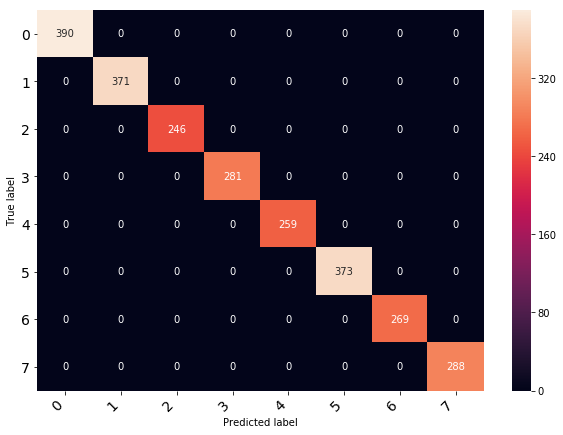

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature IN_NASCEU_DF (0.300724)
2. feature IN_ESPECIALIZACAO (0.256222)
3. feature TP_COR_RACA_1 (0.153333)
4. feature TP_COR_RACA_0 (0.133762)
5. feature TP_COR_RACA_3 (0.110084)
6. feature NU_IDADE_REFERENCIA (0.029686)
7. feature NU_ANO_PRIM_CENSO (0.004820)
8. feature NU_QTD_GRAD_PRIV (0.003305)
9. feature NU_QTD_GRAD_PBC (0.003234)
10. feature IN_MULHER (0.002784)
11. feature IN_MORA_DF (0.002045)


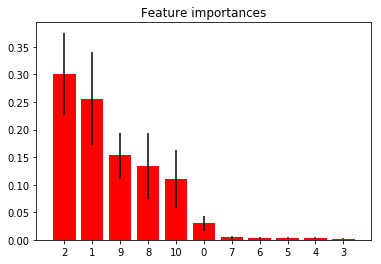

In [45]:
#faz um Random Forest com todas as features
ft, rf = processa_tudo(prof,False,'rotulos',vai_escalar=True);

In [47]:
#6 features ficaram acima de 1% de importancia
QTD_FEATURES_IMPORTANTES = 6

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Base de TREINO
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1118
          1       1.00      1.00      1.00      1108
          2       1.00      1.00      1.00       740
          3       1.00      1.00      1.00       813
          4       1.00      1.00      1.00       853
          5       1.00      1.00      1.00      1163
          6       1.00      1.00      1.00       801
          7       1.00      1.00      1.00       835

avg / total       1.00      1.00      1.00      7431

Base de TESTE
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       390
          1       1.00      1.00      1.00       371
          2       1.00      1.00      1.00       246
          3       1.00      1.00      1.00       281
          4       1.00      1.00      1.00       259
          5       1.00      1.00      1.00       373
          6       1.00      1.00      1.00       269
          7  

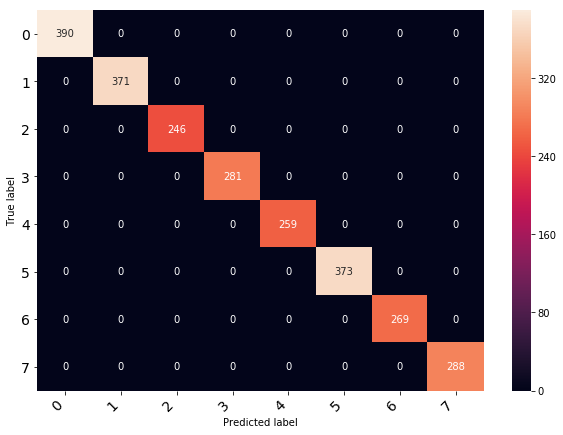

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature IN_NASCEU_DF (0.313497)
2. feature IN_ESPECIALIZACAO (0.250116)
3. feature TP_COR_RACA_1 (0.156198)
4. feature TP_COR_RACA_3 (0.147500)
5. feature TP_COR_RACA_0 (0.108707)
6. feature NU_IDADE_REFERENCIA (0.023982)


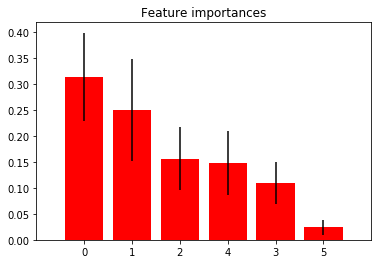

In [48]:
#Roda com o número de features importantes
processa_tudo(prof[ft[:QTD_FEATURES_IMPORTANTES]+['rotulos']],False,'rotulos');

In [49]:
prof = prof[ft[:QTD_FEATURES_IMPORTANTES]+['rotulos']]

In [50]:
prof.head()

IN_NASCEU_DF  IN_ESPECIALIZACAO  TP_COR_RACA_1  \
CO_PESSOA_FISICA                                                   
115161698917                 1               0.00              0   
115111512003                 0               1.00              0   
115075856674                 0               1.00              0   
115075569420                 0               1.00              0   
115076358503                 1               1.00              1   

                  TP_COR_RACA_0  TP_COR_RACA_3  NU_IDADE_REFERENCIA rotulos  
CO_PESSOA_FISICA                                                             
115161698917                  1              0                   41       6  
115111512003                  0              0                   54       2  
115075856674                  1              0                   41       0  
115075569420                  1              0                   47       0  
115076358503                  0              0                   41       1

rotulos
0   0.47
1   1.00
2   0.00
3   0.00
4   0.55
5   0.00
6   1.00
7   1.00
Name: IN_NASCEU_DF, dtype: float64

4985

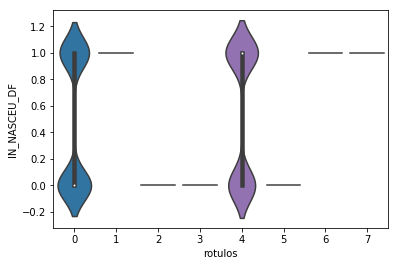

rotulos
0   1.00
1   0.56
2   1.00
3   0.00
4   0.00
5   0.62
6   0.00
7   1.00
Name: IN_ESPECIALIZACAO, dtype: float16

5410.0

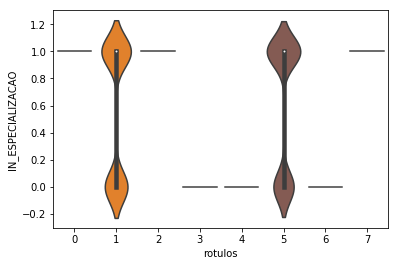

rotulos
0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
Name: TP_COR_RACA_1, dtype: int8

3015

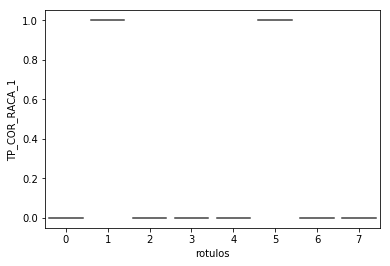

rotulos
0   1.00
1   0.00
2   0.00
3   0.91
4   0.00
5   0.00
6   0.90
7   0.00
Name: TP_COR_RACA_0, dtype: float64

3469

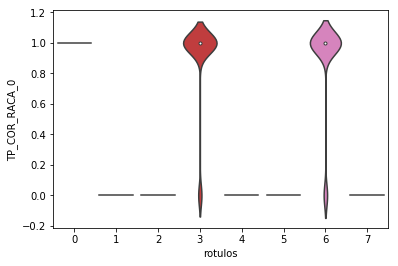

rotulos
0   0.00
1   0.00
2   0.86
3   0.00
4   1.00
5   0.00
6   0.00
7   0.85
Name: TP_COR_RACA_3, dtype: float64

2920

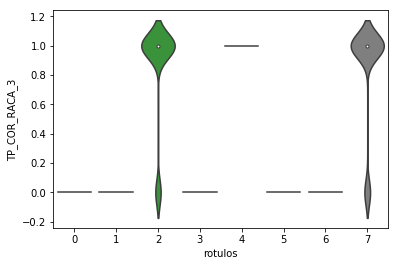

count  mean  std   min   25%   50%   75%   max
rotulos                                                 
0       1508.00 43.80 7.09 26.00 39.00 44.00 48.00 69.00
1       1479.00 39.93 6.43 25.00 35.00 40.00 45.00 69.00
2        986.00 44.89 7.17 26.00 40.00 45.00 50.00 68.00
3       1094.00 46.01 7.89 24.00 41.00 46.00 51.00 68.00
4       1112.00 41.26 7.93 25.00 35.00 42.00 47.00 68.00
5       1536.00 45.51 7.96 25.00 40.00 46.00 50.00 69.00
6       1070.00 40.22 6.60 24.00 35.00 40.00 45.00 67.00
7       1123.00 40.50 5.97 25.00 36.00 40.00 45.00 65.00

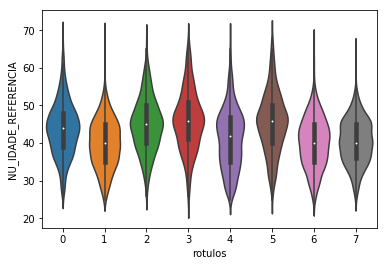

In [51]:
#percorre as variaveis mostrando a distribuicao de acordo com a classe.
import seaborn as sns
for c in prof.columns[:-1]:
    display(HTML(f'<h2>{c}</h2>'))
    if prof[c].dtype == bool:
        prof[c] = prof[c].astype(np.int8)
    sns.violinplot(y=c,x='rotulos',data=prof)
    if c.startswith('NU'):
        display(prof.groupby('rotulos')[c].describe())
    elif c.startswith('CLSC'):
        sns.heatmap(prof.pivot_table(index=c,columns='rotulos',values='IN_ESPECIALIZACAO',aggfunc='count'), annot=True, fmt="d",cmap='RdYlGn')
        plt.show()
    else:
        display(prof.groupby('rotulos')[c].mean())
        display(prof[c].sum())
        
    plt.show()

<table><tr>
    <td><img src='img/Eliza_Simpson_Detective.png' /></td>
<td>
<h3>Elementar...</h3>
<ul>
<li><strong>Classe 0 - 1.508 professores :</strong>
<ul>
<li>Segundo maior grupo</li>
<li>47% nasceu no DF</li>
<li>Possui especializa&ccedil;&atilde;o</li>
<li>Ra&ccedil;a/cor n&atilde;o declarada</li>
</ul>
</li>
<li><strong>Classe 1 - 1.479 professores:</strong>
<ul>
<li>Nasceu no DF</li>
<li>56% possui especializa&ccedil;&atilde;o</li>
<li>Ra&ccedil;a/cor branca</li>
<li>Grupo mais jovem</li>
</ul>
</li>
<li><strong>Classe 2 - 986 professores:</strong>
<ul>
<li>Menor grupo</li>
<li>N&atilde;o nasceu no DF</li>
<li>Possui especializa&ccedil;&atilde;o</li>
<li>86% Ra&ccedil;a/cor parda</li>
</ul>
</li>
<li><strong>Classe 3 - 1.094 professores:</strong>
<ul>
<li>N&atilde;o nasceu no DF</li>
<li>N&atilde;o possui especializa&ccedil;&atilde;o</li>
<li>91% Ra&ccedil;a/cor n&atilde;o declarada</li>
<li>Grupo mais velho</li>
<li></li>
</ul>
</li>
<li><strong>Classe 4 - 1.112 professores:</strong>
<ul>
<li>55% nasceu no DF</li>
<li>N&atilde;o possui especializa&ccedil;&atilde;o</li>
<li>Ra&ccedil;a/cor parda</li>
<li></li>
</ul>
</li>
<li><strong>Classe 5 - 1.536 professores:</strong>
<ul>
<li>Maior grupo</li>
<li>N&atilde;o nasceu no DF</li>
<li>62% possui especializa&ccedil;&atilde;o</li>
<li>Ra&ccedil;a/cor branca</li>
<li>Segundo grupo mais velho</li>
<li></li>
</ul>
</li>
<li><strong>Classe 6 - 1.070 professores:</strong>
<ul>
<li>Segundo menor grupo</li>
<li>Nasceu no DF</li>
<li>N&atilde;o possui especializa&ccedil;&atilde;o</li>
<li>90% Ra&ccedil;a/cor n&atilde;o declarada</li>
<li>Segundo grupo mais jovem</li>
<li></li>
</ul>
</li>
<li><strong>Classe 7 - 1.123 professores:</strong><br />
<ul>
<li>Nasceu no DF</li>
<li>Possui especializa&ccedil;&atilde;o</li>
<li>85% ra&ccedil;a/cor parda</li>
</ul>
</li>
</ul>
</td>
</tr>
</table>

In [52]:
#salva o DataFrame com as features dos professores
prof.to_csv(f'{PATH_DF_CSV}prof_feature_mod.csv')

In [3]:
#recarrega o DataFrame com as features dos professores
prof = pd.read_csv(f'{PATH_DF_CSV}prof_feature_mod.csv',index_col='CO_PESSOA_FISICA')
prof.head()

IN_NASCEU_DF  IN_ESPECIALIZACAO  TP_COR_RACA_1  \
CO_PESSOA_FISICA                                                   
115161698917                 1               0.00              0   
115111512003                 0               1.00              0   
115075856674                 0               1.00              0   
115075569420                 0               1.00              0   
115076358503                 1               1.00              1   

                  TP_COR_RACA_0  TP_COR_RACA_3  NU_IDADE_REFERENCIA  rotulos  
CO_PESSOA_FISICA                                                              
115161698917                  1              0                   41        6  
115111512003                  0              0                   54        2  
115075856674                  1              0                   41        0  
115075569420                  1              0                   47        0  
115076358503                  0              0                   41        1

<table columns=2 style='width:100%'><tr><td>
<img src='img/escola.jpg'/></td><td> <h1>Escolas.</h1><br/>
    Escolas que estavam em funcionamento em 2015 e 2017.</td></tr></table>

In [132]:
#escolas da rede distrital do DF em funcionamento no ano em questao
fen = lambda df: df.loc[(df.CO_UF == 53) & (df.TP_SITUACAO_FUNCIONAMENTO == 1) & (df.TP_DEPENDENCIA == 2)] 
fev = lambda df: df.loc[(df.FK_COD_ESTADO == 53) & (df.DESC_SITUACAO_FUNCIONAMENTO == 1) & (df.ID_DEPENDENCIA_ADM == 2)] 
l_df_escolas = lambda ano: monta_df_docente(f'{ARQ_PATH}{ano}/ESCOLAS.CSV')
escolas_df = {a : fen(l_df_escolas(a)) if a >= 2015 else fev(l_df_escolas(a)) for a in tqdm(anos_psq)}


100%|██████████| 7/7 [01:22<00:00, 11.72s/it]


## Features das escolas

- Dados da infraestrutura da escola, disponiveis no censo
- Dados da vizinhanca, conseguidos no censo


In [133]:
#montagem do dataframe com as features das escolas
cols_escola = [
'CO_ENTIDADE',
'IN_LOCAL_FUNC_PREDIO_ESCOLAR', 'TP_OCUPACAO_PREDIO_ESCOLAR',
'IN_LOCAL_FUNC_SALAS_EMPRESA', 'IN_LOCAL_FUNC_SOCIOEDUCATIVO',
'IN_LOCAL_FUNC_UNID_PRISIONAL','IN_LOCAL_FUNC_PRISIONAL_SOCIO',
'IN_LOCAL_FUNC_TEMPLO_IGREJA','IN_LOCAL_FUNC_CASA_PROFESSOR',
'IN_LOCAL_FUNC_GALPAO','IN_LOCAL_FUNC_SALAS_OUTRA_ESC',
'IN_LOCAL_FUNC_OUTROS','IN_PREDIO_COMPARTILHADO',
'IN_AGUA_FILTRADA','IN_AGUA_REDE_PUBLICA',
'IN_AGUA_POCO_ARTESIANO','IN_AGUA_CACIMBA',
'IN_AGUA_FONTE_RIO', 'IN_AGUA_INEXISTENTE',
'IN_ENERGIA_REDE_PUBLICA', 'IN_ENERGIA_GERADOR',
'IN_ENERGIA_OUTROS', 'IN_ENERGIA_INEXISTENTE',
'IN_ESGOTO_REDE_PUBLICA','IN_ESGOTO_FOSSA',
'IN_ESGOTO_INEXISTENTE','IN_LIXO_COLETA_PERIODICA',
'IN_LIXO_QUEIMA','IN_LIXO_JOGA_OUTRA_AREA',
'IN_LIXO_RECICLA','IN_LIXO_ENTERRA',
'IN_LIXO_OUTROS','IN_SALA_DIRETORIA',
'IN_SALA_PROFESSOR','IN_LABORATORIO_INFORMATICA',
'IN_LABORATORIO_CIENCIAS','IN_SALA_ATENDIMENTO_ESPECIAL',
'IN_QUADRA_ESPORTES_COBERTA','IN_QUADRA_ESPORTES_DESCOBERTA',
'IN_QUADRA_ESPORTES','IN_COZINHA', 'IN_BIBLIOTECA','IN_SALA_LEITURA',
'IN_BIBLIOTECA_SALA_LEITURA', 'IN_PARQUE_INFANTIL',
'IN_BERCARIO', 'IN_BANHEIRO_FORA_PREDIO',
'IN_BANHEIRO_DENTRO_PREDIO','IN_BANHEIRO_EI',
'IN_BANHEIRO_PNE','IN_DEPENDENCIAS_PNE',
'IN_SECRETARIA','IN_BANHEIRO_CHUVEIRO',
'IN_REFEITORIO', 'IN_DESPENSA',
'IN_ALMOXARIFADO', 'IN_AUDITORIO',
'IN_PATIO_COBERTO', 'IN_PATIO_DESCOBERTO',
'IN_ALOJAM_ALUNO', 'IN_ALOJAM_PROFESSOR',
'IN_AREA_VERDE', 'IN_LAVANDERIA',
'IN_DEPENDENCIAS_OUTRAS', 'NU_SALAS_EXISTENTES',
'NU_SALAS_UTILIZADAS', 'IN_EQUIP_TV',
'IN_EQUIP_VIDEOCASSETE', 'IN_EQUIP_DVD',
'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA',
'IN_EQUIP_RETROPROJETOR', 'IN_EQUIP_IMPRESSORA',
'IN_EQUIP_IMPRESSORA_MULT','IN_EQUIP_SOM',
'IN_EQUIP_MULTIMIDIA','IN_EQUIP_FAX',
'IN_EQUIP_FOTO','IN_COMPUTADOR',
'NU_COMPUTADOR','NU_COMP_ADMINISTRATIVO',
'NU_COMP_ALUNO','IN_INTERNET',
'IN_BANDA_LARGA','NU_FUNCIONARIOS',
'IN_ALIMENTACAO','TP_AEE',
'TP_ATIVIDADE_COMPLEMENTAR', 'IN_FUNDAMENTAL_CICLOS',
'IN_MATERIAL_ESP_QUILOMBOLA', 'IN_MATERIAL_ESP_INDIGENA',
'IN_MATERIAL_ESP_NAO_UTILIZA', 'IN_EDUCACAO_INDIGENA',
'IN_BRASIL_ALFABETIZADO', 'IN_FINAL_SEMANA',
'IN_FORMACAO_ALTERNANCIA'
]

fte = escolas_df[2015].copy()[cols_escola].drop_duplicates()
fte.shape

(660, 96)

In [134]:
#criação de novas features
fte['NU_PCT_SALAS_UTILIZADAS'] = fte.NU_SALAS_UTILIZADAS/fte.NU_SALAS_EXISTENTES
cd = ['NU_SALAS_UTILIZADAS']
fte['NU_PROP_FUNS_SALAS_UTZD'] = fte.NU_FUNCIONARIOS/fte.NU_SALAS_UTILIZADAS
fte['NU_PROP_CPU_SALAS_UTZD'] = fte.NU_COMPUTADOR/fte.NU_SALAS_UTILIZADAS
fte['NU_PRIM_ANO_CENSO'] = 0
for a in anos_psq[:-1]:
    cp = 'CO_PESSOA_FISICA' if a >= 2015 else 'FK_COD_DOCENTE'
    ce = 'CO_ENTIDADE' if a >= 2015 else 'PK_COD_ENTIDADE'
    np = dfs[a].loc[dfs[a][ce].isin(escolas_df[a][ce].values)].groupby(ce)[[cp]].nunique().reset_index()
    np.columns = ['CO_ENTIDADE','qtd']
    fte[f'NU_TTL_PROF_{a}'] = fte.merge(np,on='CO_ENTIDADE',how='left')['qtd'].values
    fte.loc[fte.CO_ENTIDADE.isin(escolas_df[a][ce]) & fte.NU_PRIM_ANO_CENSO == 0,'NU_PRIM_ANO_CENSO'] = a

fte['NU_DIF_QTD_DOCENTES_13_14'] = fte[f'NU_TTL_PROF_2013'] - fte[f'NU_TTL_PROF_2014'] 
fte['NU_DIF_QTD_DOCENTES_14_15'] = fte[f'NU_TTL_PROF_2014'] - fte[f'NU_TTL_PROF_2015'] 
fte['NU_PROP_PROF_FUNC_2015'] = fte.NU_TTL_PROF_2015 / fte.NU_FUNCIONARIOS



In [10]:
fte.head()

CO_ENTIDADE  IN_LOCAL_FUNC_PREDIO_ESCOLAR  TP_OCUPACAO_PREDIO_ESCOLAR  \
45       53014294                          1.00                        1.00   
244      53004167                          1.00                        1.00   
381      53002296                          1.00                        1.00   
676      53005759                          1.00                        1.00   
1209     53001567                          1.00                        1.00   

      IN_LOCAL_FUNC_SALAS_EMPRESA  IN_LOCAL_FUNC_SOCIOEDUCATIVO  \
45                           0.00                          0.00   
244                          0.00                          0.00   
381                          0.00                          0.00   
676                          0.00                          0.00   
1209                         0.00                          0.00   

      IN_LOCAL_FUNC_UNID_PRISIONAL  IN_LOCAL_FUNC_PRISIONAL_SOCIO  \
45                            0.00                           0.00   
244                           0.00                           0.00   
381                           0.00                           0.00   
676                           0.00                           0.00   
1209                          0.00                           0.00   

      IN_LOCAL_FUNC_TEMPLO_IGREJA  IN_LOCAL_FUNC_CASA_PROFESSOR  \
45                           0.00                          0.00   
244                          0.00                          0.00   
381                          0.00                          0.00   
676                          0.00                          0.00   
1209                         0.00                          0.00   

      IN_LOCAL_FUNC_GALPAO           ...            NU_PRIM_ANO_CENSO  \
45                    0.00           ...                         2007   
244                   0.00           ...                         2007   
381                   0.00           ...                         2007   
676                   0.00           ...                         2007   
1209                  0.00           ...                         2007   

      NU_TTL_PROF_2007  NU_TTL_PROF_2009  NU_TTL_PROF_2011  NU_TTL_PROF_2013  \
45                 nan             60.00             38.00             35.00   
244                nan             15.00             12.00              7.00   
381                nan              9.00              9.00              8.00   
676                nan              9.00              9.00              6.00   
1209               nan             32.00             23.00             21.00   

      NU_TTL_PROF_2014  NU_TTL_PROF_2015  NU_DIF_QTD_DOCENTES_13_14  \
45               35.00             36.00                       0.00   
244               5.00              5.00                       2.00   
381              12.00             15.00                      -4.00   
676               6.00              7.00                       0.00   
1209             20.00             17.00                       1.00   

      NU_DIF_QTD_DOCENTES_14_15  NU_PROP_PROF_FUNC_2015  
45                        -1.00                    0.37  
244                        0.00                    0.13  
381                       -3.00                    0.35  
676                       -1.00                    0.19  
1209                       3.00                    0.30  

[5 rows x 109 columns]

In [135]:
#exclusão de colunas desnecessárias e indexação
fte.drop(cd,axis=1,inplace=True)
fte.set_index('CO_ENTIDADE',inplace=True)

'0.0% de registros nulos'

'Variância: 0.00603485107421875'

qtd   pc
1.00  656 0.99
0.00    4 0.01

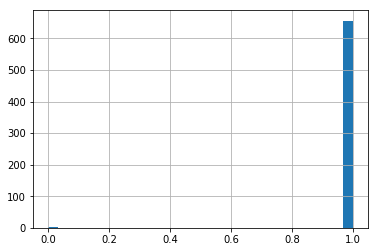

'0.6060606060606061% de registros nulos'

'Variância: 0.105224609375'

qtd   pc
1.00  636 0.96
3.00   17 0.03
2.00    3 0.00

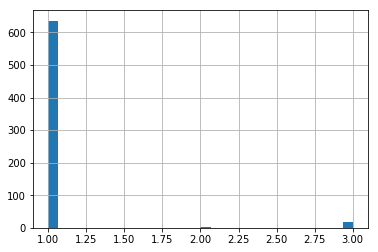

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

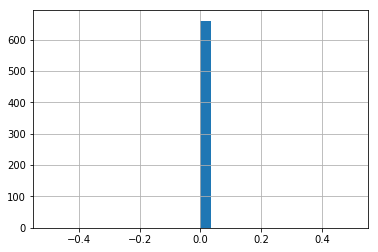

'0.0% de registros nulos'

'Variância: 0.007526397705078125'

qtd   pc
0.00  655 0.99
1.00    5 0.01

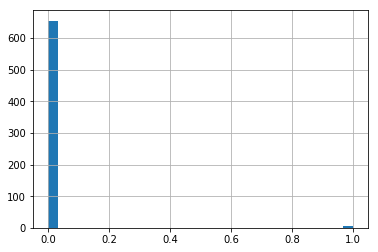

'0.0% de registros nulos'

'Variância: 0.0090179443359375'

qtd   pc
0.00  654 0.99
1.00    6 0.01

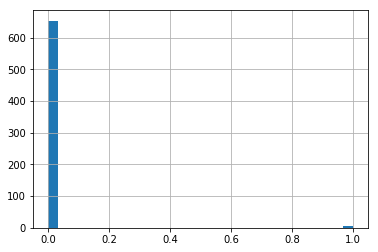

'0.0% de registros nulos'

'Variância: 0.0149383544921875'

qtd   pc
0.00  650 0.98
1.00   10 0.02

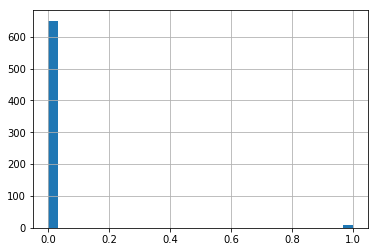

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

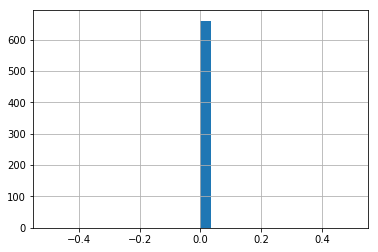

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

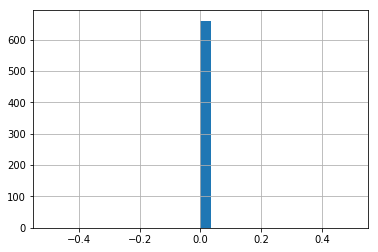

'0.0% de registros nulos'

'Variância: 0.0030269622802734375'

qtd   pc
0.00  658 1.00
1.00    2 0.00

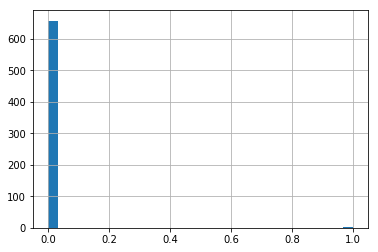

'0.0% de registros nulos'

'Variância: 0.0090179443359375'

qtd   pc
0.00  654 0.99
1.00    6 0.01

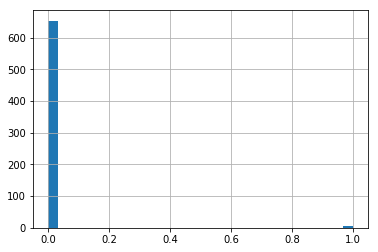

'0.0% de registros nulos'

'Variância: 0.0149383544921875'

qtd   pc
0.00  650 0.98
1.00   10 0.02

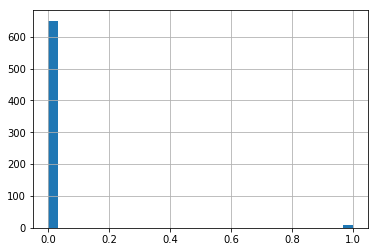

'0.6060606060606061% de registros nulos'

'Variância: 0.029632568359375'

qtd   pc
0.00  636 0.96
1.00   20 0.03

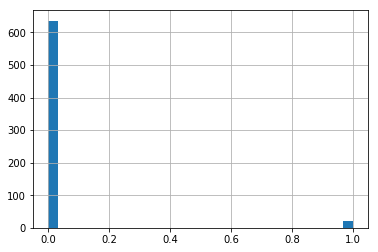

'0.0% de registros nulos'

'Variância: 0.0030269622802734375'

qtd   pc
1.00  658 1.00
0.00    2 0.00

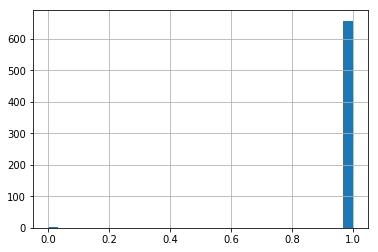

'0.0% de registros nulos'

'Variância: 0.07269287109375'

qtd   pc
1.00  608 0.92
0.00   52 0.08

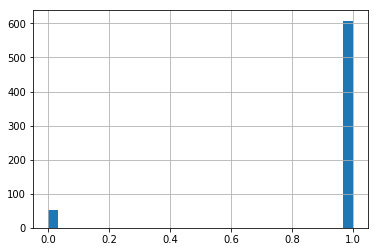

'0.0% de registros nulos'

'Variância: 0.08526611328125'

qtd   pc
0.00  598 0.91
1.00   62 0.09

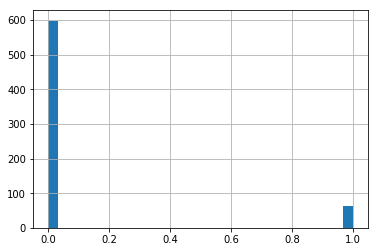

'0.0% de registros nulos'

'Variância: 0.0045318603515625'

qtd   pc
0.00  657 1.00
1.00    3 0.00

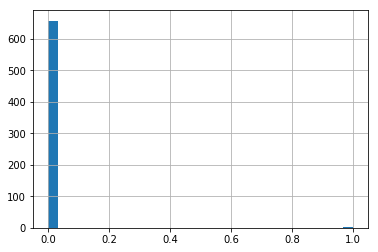

'0.0% de registros nulos'

'Variância: 0.0030269622802734375'

qtd   pc
0.00  658 1.00
1.00    2 0.00

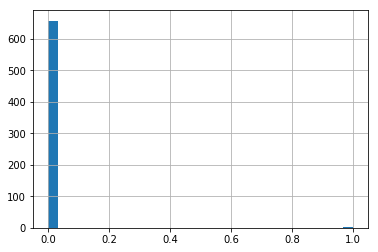

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

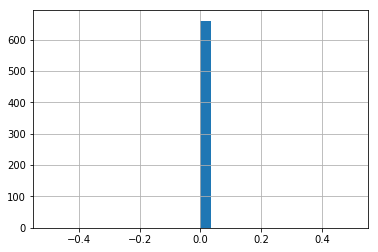

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
1.00  660 1.00

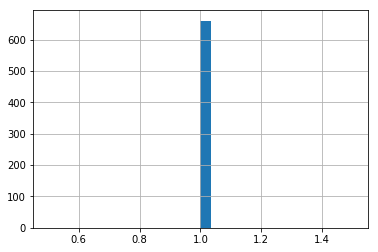

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

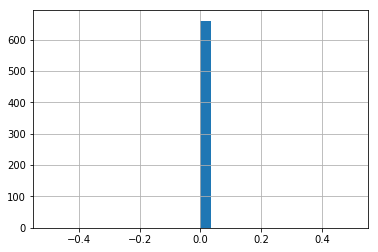

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

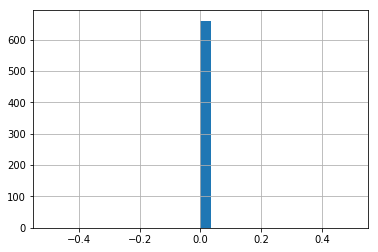

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

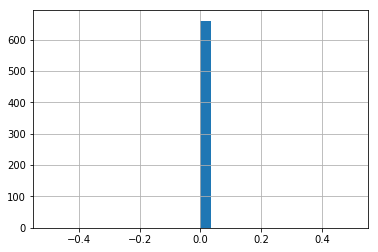

'0.0% de registros nulos'

'Variância: 0.1451416015625'

qtd   pc
1.00  544 0.82
0.00  116 0.18

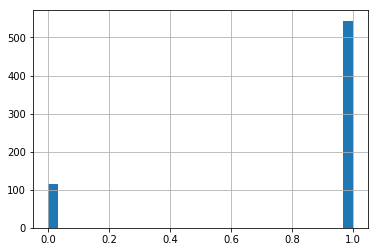

'0.0% de registros nulos'

'Variância: 0.1451416015625'

qtd   pc
0.00  544 0.82
1.00  116 0.18

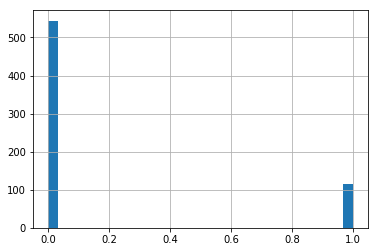

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

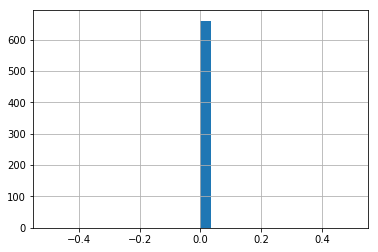

'0.0% de registros nulos'

'Variância: 0.0030269622802734375'

qtd   pc
1.00  658 1.00
0.00    2 0.00

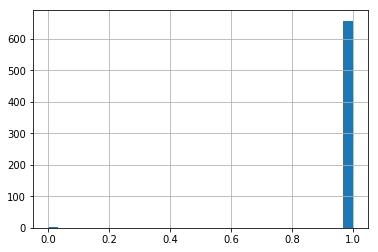

'0.0% de registros nulos'

'Variância: 0.01346588134765625'

qtd   pc
0.00  651 0.99
1.00    9 0.01

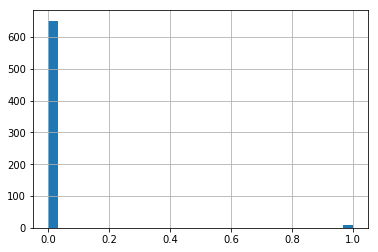

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

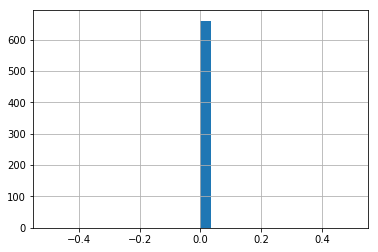

'0.0% de registros nulos'

'Variância: 0.057037353515625'

qtd   pc
0.00  620 0.94
1.00   40 0.06

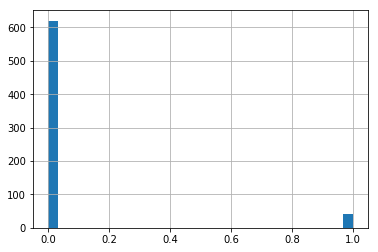

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

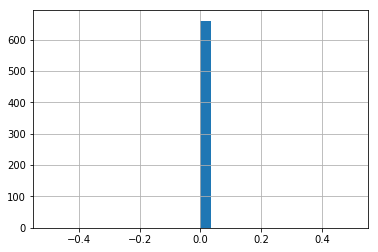

'0.0% de registros nulos'

'Variância: 0.0015153884887695312'

qtd   pc
0.00  659 1.00
1.00    1 0.00

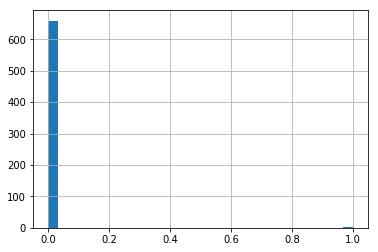

'0.0% de registros nulos'

'Variância: 0.0105133056640625'

qtd   pc
1.00  653 0.99
0.00    7 0.01

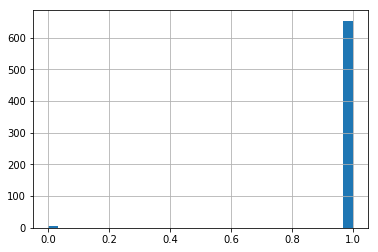

'0.0% de registros nulos'

'Variância: 0.01346588134765625'

qtd   pc
1.00  651 0.99
0.00    9 0.01

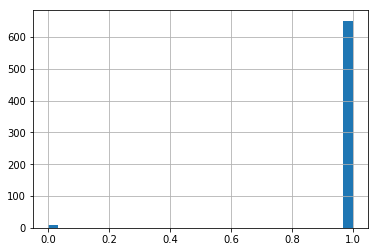

'0.0% de registros nulos'

'Variância: 0.1546630859375'

qtd   pc
1.00  534 0.81
0.00  126 0.19

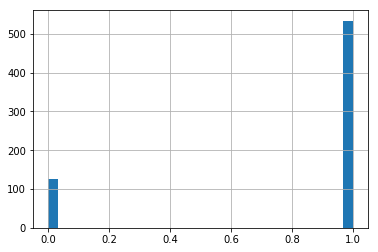

'0.0% de registros nulos'

'Variância: 0.14404296875'

qtd   pc
0.00  545 0.83
1.00  115 0.17

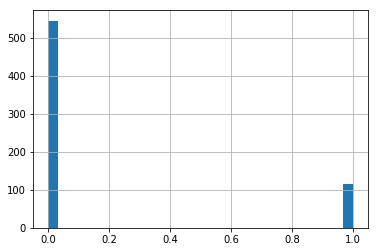

'0.0% de registros nulos'

'Variância: 0.186279296875'

qtd   pc
1.00  497 0.75
0.00  163 0.25

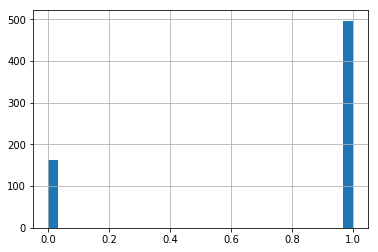

'0.0% de registros nulos'

'Variância: 0.1885986328125'

qtd   pc
0.00  494 0.75
1.00  166 0.25

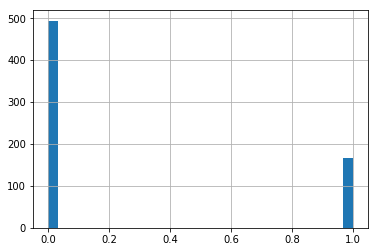

'0.0% de registros nulos'

'Variância: 0.248046875'

qtd   pc
0.00  362 0.55
1.00  298 0.45

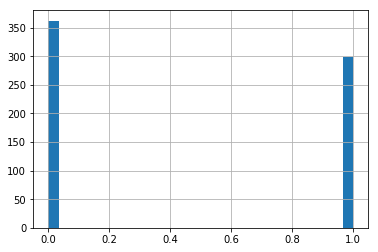

'0.0% de registros nulos'

'Variância: 0.2308349609375'

qtd   pc
1.00  422 0.64
0.00  238 0.36

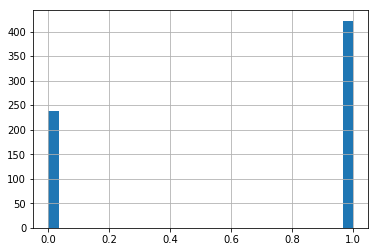

'0.0% de registros nulos'

'Variância: 0.0207977294921875'

qtd   pc
1.00  646 0.98
0.00   14 0.02

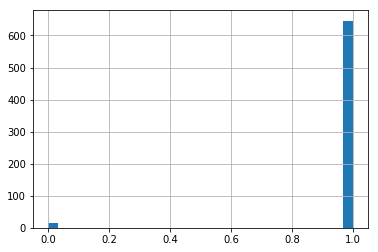

'0.0% de registros nulos'

'Variância: 0.21337890625'

qtd   pc
0.00  457 0.69
1.00  203 0.31

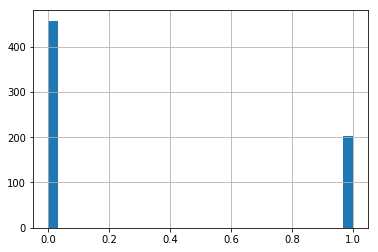

'0.0% de registros nulos'

'Variância: 0.1944580078125'

qtd   pc
1.00  486 0.74
0.00  174 0.26

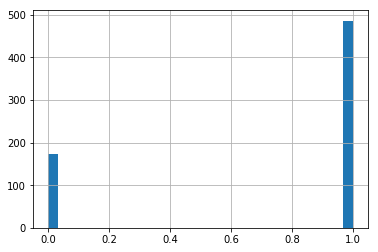

'0.0% de registros nulos'

'Variância: 0.11236572265625'

qtd   pc
1.00  575 0.87
0.00   85 0.13

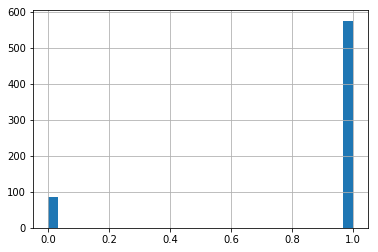

'0.0% de registros nulos'

'Variância: 0.2496337890625'

qtd   pc
1.00  347 0.53
0.00  313 0.47

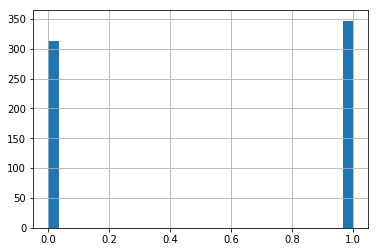

'0.0% de registros nulos'

'Variância: 0.0030269622802734375'

qtd   pc
0.00  658 1.00
1.00    2 0.00

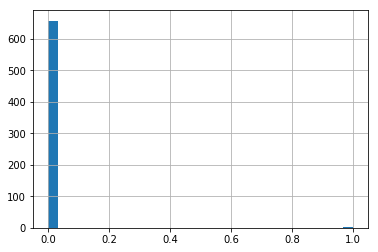

'0.0% de registros nulos'

'Variância: 0.057037353515625'

qtd   pc
0.00  620 0.94
1.00   40 0.06

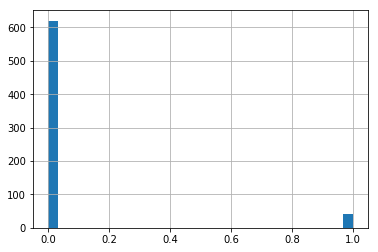

'0.0% de registros nulos'

'Variância: 0.0015153884887695312'

qtd   pc
1.00  659 1.00
0.00    1 0.00

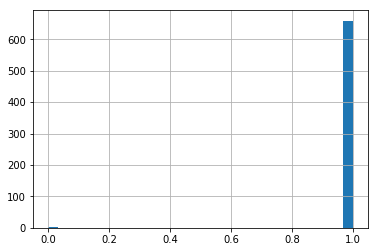

'0.0% de registros nulos'

'Variância: 0.2239990234375'

qtd   pc
0.00  437 0.66
1.00  223 0.34

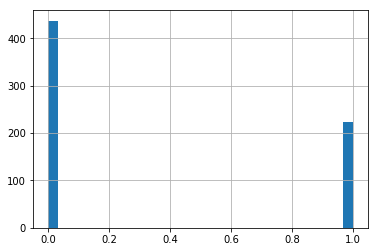

'0.0% de registros nulos'

'Variância: 0.1766357421875'

qtd   pc
1.00  509 0.77
0.00  151 0.23

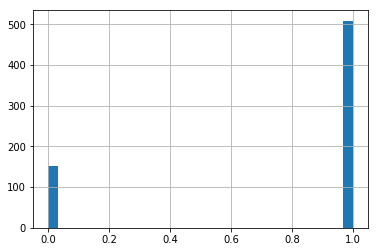

'0.0% de registros nulos'

'Variância: 0.232177734375'

qtd   pc
1.00  419 0.63
0.00  241 0.37

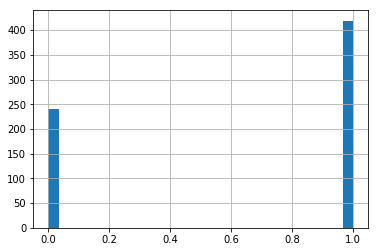

'0.0% de registros nulos'

'Variância: 0.054351806640625'

qtd   pc
1.00  622 0.94
0.00   38 0.06

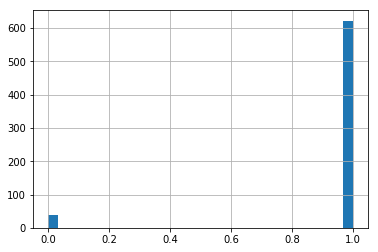

'0.0% de registros nulos'

'Variância: 0.250244140625'

qtd   pc
1.00  339 0.51
0.00  321 0.49

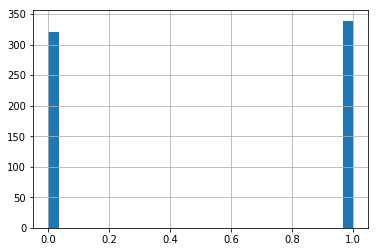

'0.0% de registros nulos'

'Variância: 0.16748046875'

qtd   pc
0.00  520 0.79
1.00  140 0.21

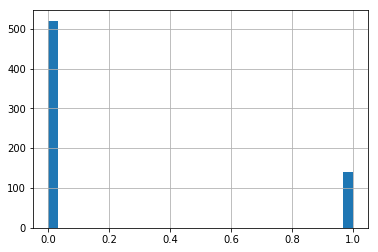

'0.0% de registros nulos'

'Variância: 0.220947265625'

qtd   pc
1.00  443 0.67
0.00  217 0.33

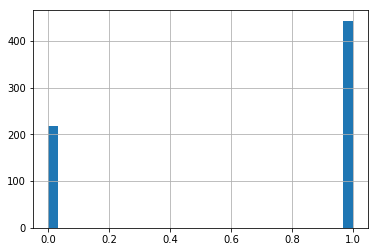

'0.0% de registros nulos'

'Variância: 0.203857421875'

qtd   pc
0.00  472 0.72
1.00  188 0.28

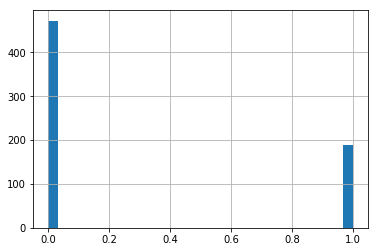

'0.0% de registros nulos'

'Variância: 0.10791015625'

qtd   pc
0.00  579 0.88
1.00   81 0.12

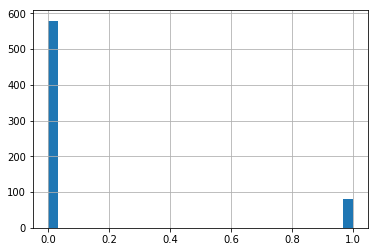

'0.0% de registros nulos'

'Variância: 0.19873046875'

qtd   pc
1.00  480 0.73
0.00  180 0.27

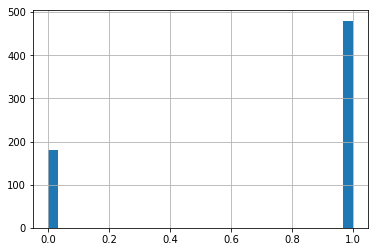

'0.0% de registros nulos'

'Variância: 0.243896484375'

qtd   pc
0.00  384 0.58
1.00  276 0.42

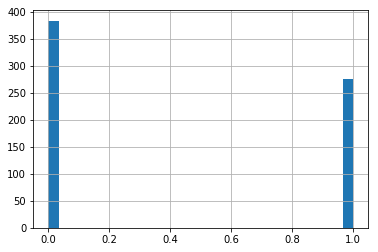

'0.0% de registros nulos'

'Variância: 0.0015153884887695312'

qtd   pc
0.00  659 1.00
1.00    1 0.00

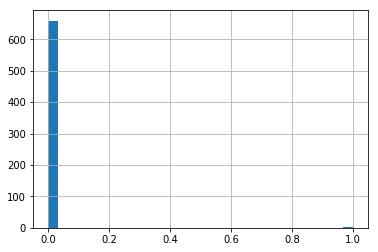

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

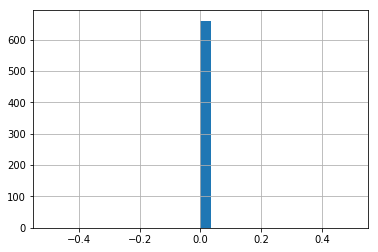

'0.0% de registros nulos'

'Variância: 0.2489013671875'

qtd   pc
0.00  354 0.54
1.00  306 0.46

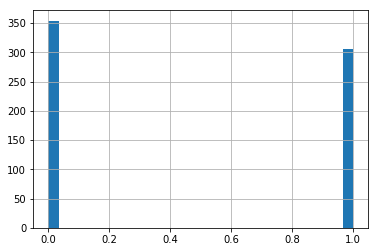

'0.0% de registros nulos'

'Variância: 0.01934814453125'

qtd   pc
0.00  647 0.98
1.00   13 0.02

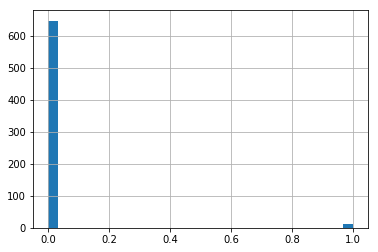

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

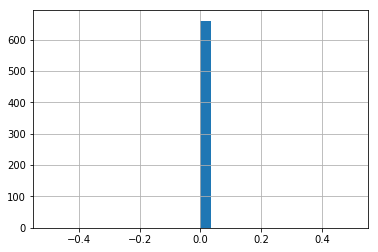

'0.15151515151515152% de registros nulos'

'Variância: 79.75'

count   659.00
mean     15.15
std       8.93
min       2.00
25%       9.00
50%      15.00
75%      20.00
max      84.00
Name: NU_SALAS_EXISTENTES, dtype: float64

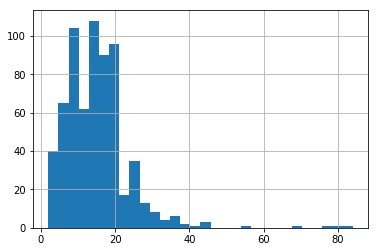

'0.0% de registros nulos'

'Variância: 0.0149383544921875'

qtd   pc
1.00  650 0.98
0.00   10 0.02

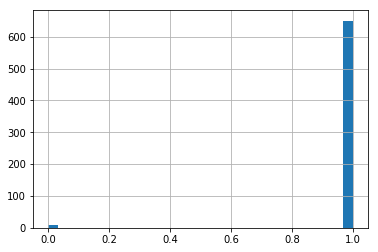

'0.0% de registros nulos'

'Variância: 0.246826171875'

qtd   pc
1.00  370 0.56
0.00  290 0.44

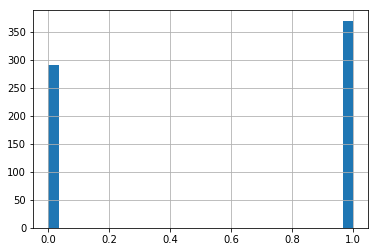

'0.0% de registros nulos'

'Variância: 0.04205322265625'

qtd   pc
1.00  631 0.96
0.00   29 0.04

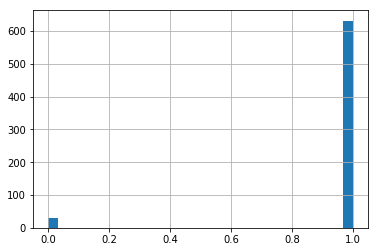

'0.0% de registros nulos'

'Variância: 0.24853515625'

qtd   pc
1.00  358 0.54
0.00  302 0.46

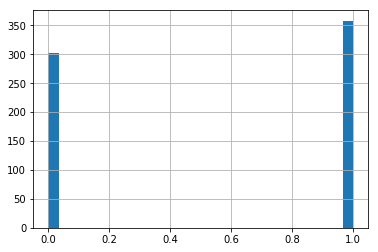

'0.0% de registros nulos'

'Variância: 0.07269287109375'

qtd   pc
1.00  608 0.92
0.00   52 0.08

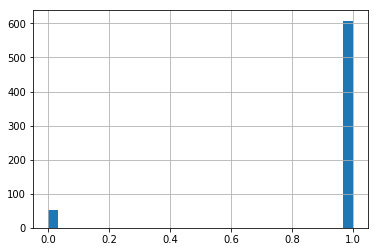

'0.0% de registros nulos'

'Variância: 0.1724853515625'

qtd   pc
1.00  514 0.78
0.00  146 0.22

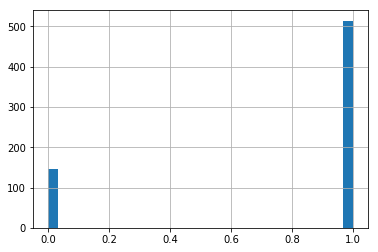

'0.0% de registros nulos'

'Variância: 0.039276123046875'

qtd   pc
1.00  633 0.96
0.00   27 0.04

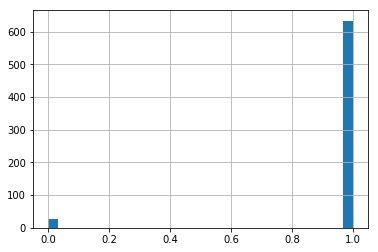

'0.0% de registros nulos'

'Variância: 0.2236328125'

qtd   pc
0.00  438 0.66
1.00  222 0.34

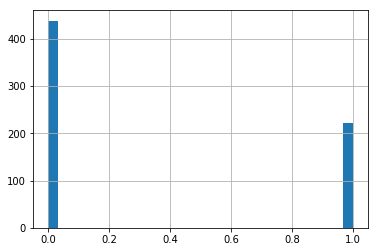

'0.0% de registros nulos'

'Variância: 0.06365966796875'

qtd   pc
1.00  615 0.93
0.00   45 0.07

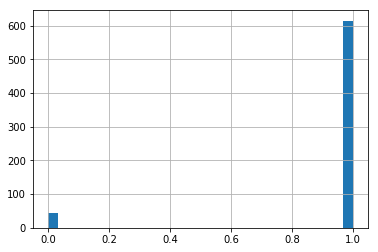

'0.0% de registros nulos'

'Variância: 0.07525634765625'

qtd   pc
1.00  606 0.92
0.00   54 0.08

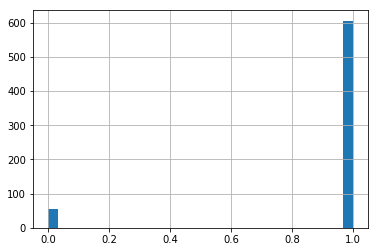

'0.0% de registros nulos'

'Variância: 0.2393798828125'

qtd   pc
0.00  399 0.60
1.00  261 0.40

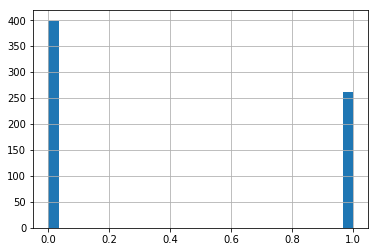

'0.0% de registros nulos'

'Variância: 0.220947265625'

qtd   pc
1.00  443 0.67
0.00  217 0.33

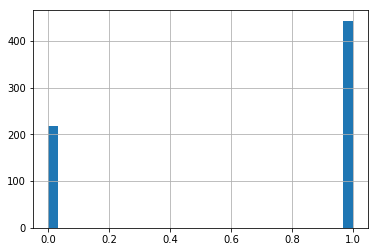

'0.0% de registros nulos'

'Variância: 0.0045318603515625'

qtd   pc
1.00  657 1.00
0.00    3 0.00

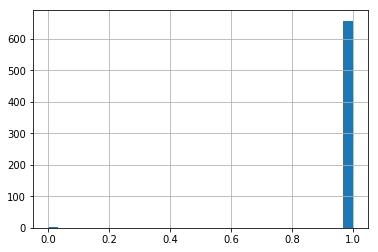

'0.0% de registros nulos'

'Variância: inf'

count   660.00
mean     25.81
std        inf
min       0.00
25%      14.00
50%      22.00
75%      31.00
max     639.00
Name: NU_COMPUTADOR, dtype: float64

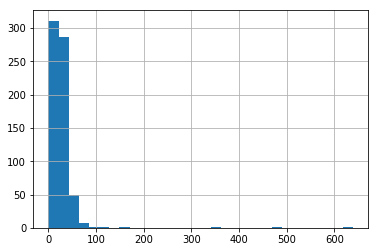

'0.0% de registros nulos'

'Variância: 38.1875'

count   660.00
mean      4.83
std       6.18
min       0.00
25%       2.00
50%       4.00
75%       6.00
max     100.00
Name: NU_COMP_ADMINISTRATIVO, dtype: float64

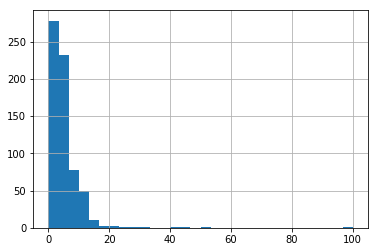

'0.0% de registros nulos'

'Variância: 158.0'

count   660.00
mean     14.29
std      12.57
min       0.00
25%       0.00
50%      13.50
75%      20.00
max      80.00
Name: NU_COMP_ALUNO, dtype: float64

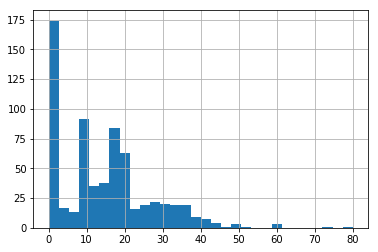

'0.0% de registros nulos'

'Variância: 0.04345703125'

qtd   pc
1.00  630 0.95
0.00   30 0.05

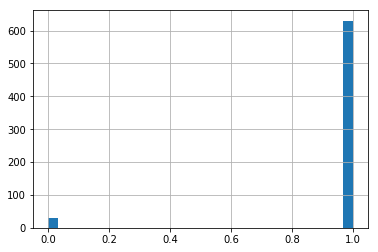

'0.0% de registros nulos'

'Variância: 0.08026123046875'

qtd   pc
1.00  602 0.91
0.00   58 0.09

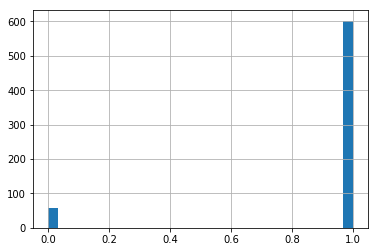

'0.0% de registros nulos'

'Variância: inf'

count   660.00
mean     77.19
std        inf
min      10.00
25%      49.00
50%      70.00
75%      97.00
max     393.00
Name: NU_FUNCIONARIOS, dtype: float64

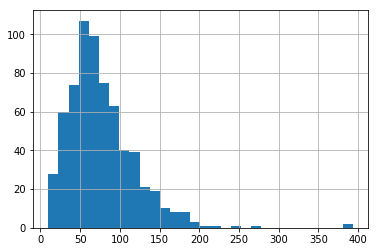

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
1.00  660 1.00

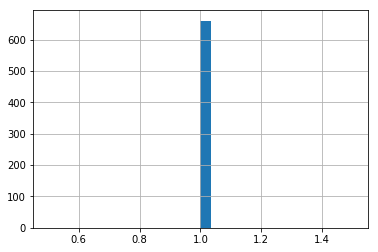

'0.0% de registros nulos'

'Variância: 0.2413330078125'

qtd   pc
1.00  393 0.60
0.00  267 0.40

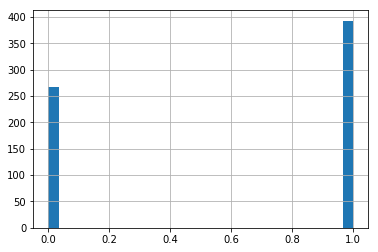

'0.0% de registros nulos'

'Variância: 0.296875'

qtd   pc
0.00  408 0.62
1.00  234 0.35
2.00   18 0.03

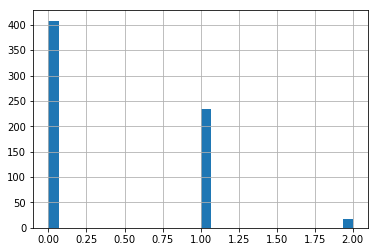

'20.151515151515152% de registros nulos'

'Variância: 0.2476806640625'

qtd   pc
1.00  292 0.44
0.00  235 0.36

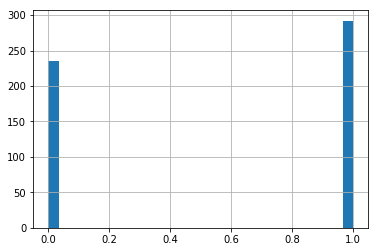

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

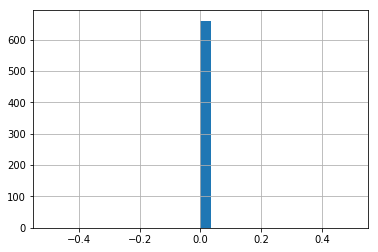

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

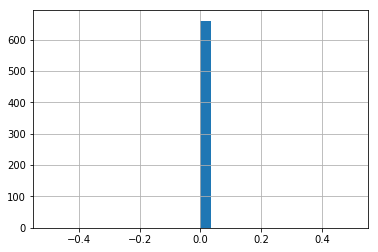

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
1.00  660 1.00

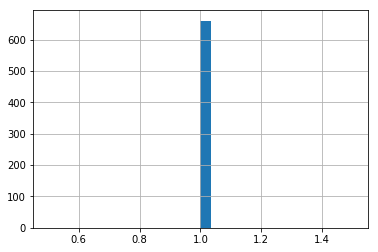

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

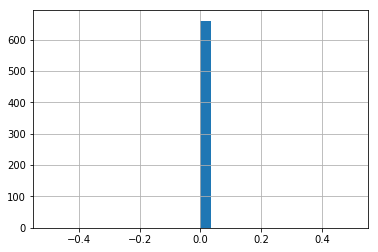

'0.0% de registros nulos'

'Variância: 0.0596923828125'

qtd   pc
0.00  618 0.94
1.00   42 0.06

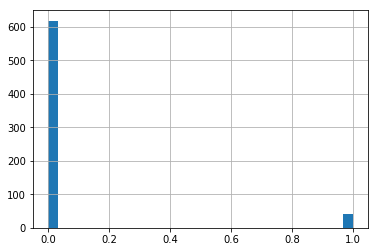

'0.0% de registros nulos'

'Variância: 0.15380859375'

qtd   pc
0.00  535 0.81
1.00  125 0.19

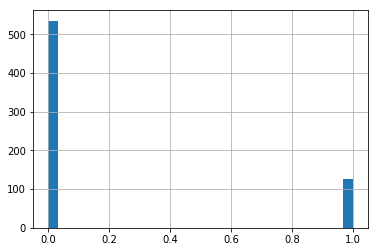

'1.9696969696969695% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  647 0.98

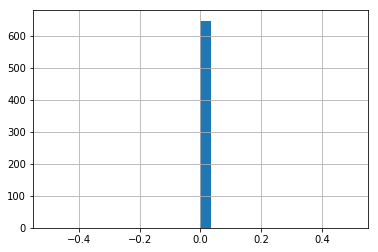

'0.15151515151515152% de registros nulos'

'Variância: 0.01837158203125'

count   659.00
mean      0.96
std       0.14
min       0.06
25%       0.93
50%       1.00
75%       1.00
max       2.06
Name: NU_PCT_SALAS_UTILIZADAS, dtype: float64

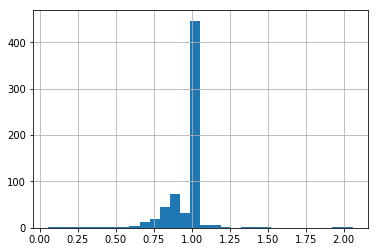

'0.0% de registros nulos'

'Variância: 20.046875'

count   660.00
mean      5.88
std       4.48
min       0.62
25%       4.58
50%       5.39
75%       6.46
max      96.00
Name: NU_PROP_FUNS_SALAS_UTZD, dtype: float64

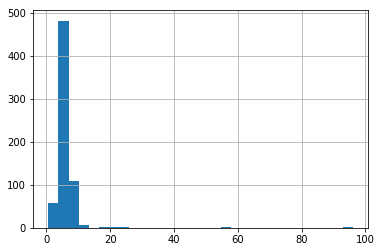

'0.0% de registros nulos'

'Variância: 11.6328125'

count   660.00
mean      2.10
std       3.41
min       0.00
25%       1.06
50%       1.73
75%       2.43
max      60.75
Name: NU_PROP_CPU_SALAS_UTZD, dtype: float64

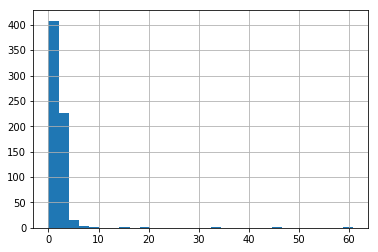

'0.0% de registros nulos'

'Variância: 1.0232215937830498'

qtd   pc
2007  621 0.94
2009   23 0.03
2011    8 0.01
2015    7 0.01
2013    1 0.00

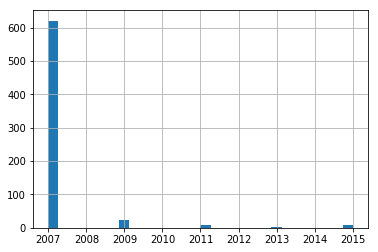

'100.0% de registros nulos'

'Variância: nan'

Empty DataFrame
Columns: [qtd, pc]
Index: []

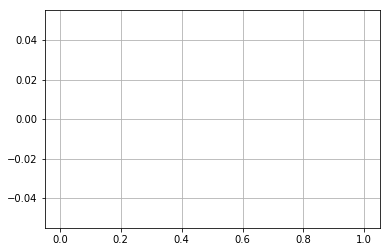

'5.909090909090909% de registros nulos'

'Variância: 480.9041504337442'

count   621.00
mean     33.84
std      21.93
min       2.00
25%      18.00
50%      30.00
75%      46.00
max     123.00
Name: NU_TTL_PROF_2009, dtype: float64

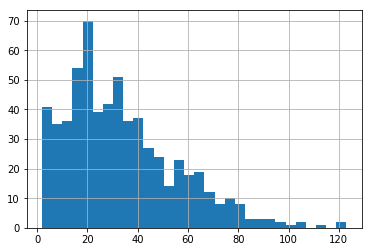

'4.696969696969696% de registros nulos'

'Variância: 322.46962623920297'

count   629.00
mean     24.96
std      17.96
min       1.00
25%      13.00
50%      20.00
75%      33.00
max      94.00
Name: NU_TTL_PROF_2011, dtype: float64

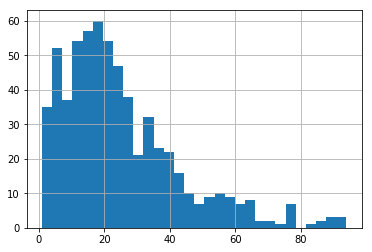

'1.9696969696969695% de registros nulos'

'Variância: 305.59799694709085'

count   647.00
mean     25.12
std      17.48
min       1.00
25%      12.00
50%      21.00
75%      34.00
max     100.00
Name: NU_TTL_PROF_2013, dtype: float64

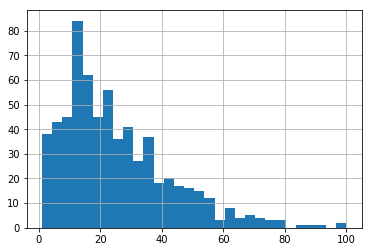

'1.3636363636363635% de registros nulos'

'Variância: 318.0424152191896'

count   651.00
mean     25.43
std      17.83
min       1.00
25%      12.00
50%      21.00
75%      34.50
max     103.00
Name: NU_TTL_PROF_2014, dtype: float64

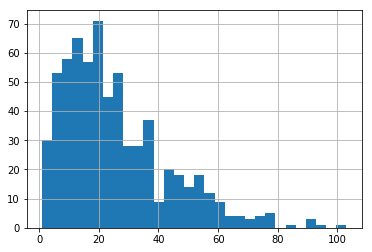

'0.15151515151515152% de registros nulos'

'Variância: 362.91774863821536'

count   659.00
mean     27.43
std      19.05
min       1.00
25%      13.00
50%      23.00
75%      36.00
max     123.00
Name: NU_TTL_PROF_2015, dtype: float64

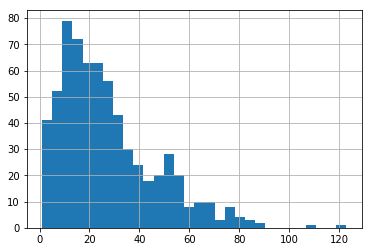

'2.1212121212121215% de registros nulos'

'Variância: 28.355957952336425'

count   646.00
mean     -0.27
std       5.33
min     -35.00
25%      -2.00
50%       0.00
75%       2.00
max      32.00
Name: NU_DIF_QTD_DOCENTES_13_14, dtype: float64

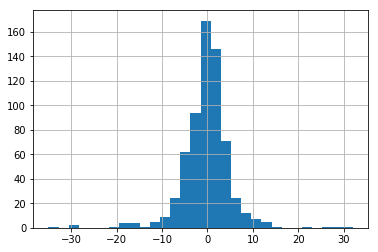

'1.5151515151515151% de registros nulos'

'Variância: 34.25814863102994'

count   650.00
mean     -2.14
std       5.85
min     -34.00
25%      -4.00
50%      -1.00
75%       1.00
max      36.00
Name: NU_DIF_QTD_DOCENTES_14_15, dtype: float64

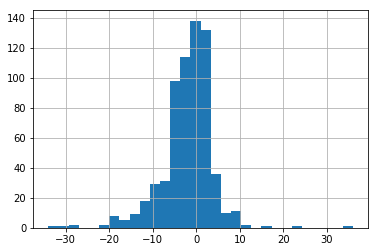

'0.15151515151515152% de registros nulos'

'Variância: 0.014279819810089805'

count   659.00
mean      0.34
std       0.12
min       0.03
25%       0.26
50%       0.33
75%       0.41
max       0.90
Name: NU_PROP_PROF_FUNC_2015, dtype: float64

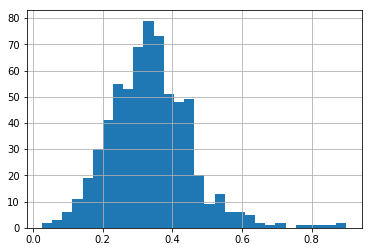

In [16]:
explora_df(fte)

In [136]:
#inicia o feature selection com a variancia e nulos
f = fte.copy()
VARIANCIA_MINIMA = 0.05
PC_MAX_MODA = 0.9
PC_MAX_MODA_NU = 0.6
MAXIMO_DE_NULOS  = 0.05
qtd_ttl = f.shape[0]
cd = []
for c in f.columns:
    s = f[c]
    pc_nulos = s.isnull().sum() / qtd_ttl * 100
    try:
        a = f.loc[s == s.mode()[0]].shape[0]
    except:
        a = 0
        pass
    pc_moda = a/qtd_ttl
    if pc_moda > PC_MAX_MODA or (c.startswith('NU') and pc_moda > PC_MAX_MODA_NU) or pc_nulos > MAXIMO_DE_NULOS:
        #display(f'{c} - {pc_moda}')
        cd.append(c)
    
f.drop(cd,axis=1,inplace=True)
display(' '.join(f.columns))
display(f'Restaram {len(f.columns)/len(fte.columns)} das colunas')
display(f.var())
display(f.head())

'IN_ESGOTO_REDE_PUBLICA IN_ESGOTO_FOSSA IN_LABORATORIO_INFORMATICA IN_LABORATORIO_CIENCIAS IN_SALA_ATENDIMENTO_ESPECIAL IN_QUADRA_ESPORTES_COBERTA IN_QUADRA_ESPORTES_DESCOBERTA IN_QUADRA_ESPORTES IN_BIBLIOTECA IN_SALA_LEITURA IN_BIBLIOTECA_SALA_LEITURA IN_PARQUE_INFANTIL IN_BANHEIRO_EI IN_BANHEIRO_PNE IN_DEPENDENCIAS_PNE IN_BANHEIRO_CHUVEIRO IN_REFEITORIO IN_DESPENSA IN_ALMOXARIFADO IN_AUDITORIO IN_PATIO_COBERTO IN_PATIO_DESCOBERTO IN_AREA_VERDE IN_EQUIP_VIDEOCASSETE IN_EQUIP_PARABOLICA IN_EQUIP_RETROPROJETOR IN_EQUIP_IMPRESSORA_MULT IN_EQUIP_FAX IN_EQUIP_FOTO NU_COMPUTADOR NU_COMP_ADMINISTRATIVO NU_COMP_ALUNO NU_FUNCIONARIOS TP_AEE TP_ATIVIDADE_COMPLEMENTAR IN_FINAL_SEMANA NU_PROP_FUNS_SALAS_UTZD NU_PROP_CPU_SALAS_UTZD'

'Restaram 0.35514018691588783 das colunas'

IN_ESGOTO_REDE_PUBLICA             0.15
IN_ESGOTO_FOSSA                    0.15
IN_LABORATORIO_INFORMATICA         0.15
IN_LABORATORIO_CIENCIAS            0.14
IN_SALA_ATENDIMENTO_ESPECIAL       0.19
IN_QUADRA_ESPORTES_COBERTA         0.19
IN_QUADRA_ESPORTES_DESCOBERTA      0.25
IN_QUADRA_ESPORTES                 0.23
IN_BIBLIOTECA                      0.21
IN_SALA_LEITURA                    0.19
IN_BIBLIOTECA_SALA_LEITURA         0.11
IN_PARQUE_INFANTIL                 0.25
IN_BANHEIRO_EI                     0.22
IN_BANHEIRO_PNE                    0.18
IN_DEPENDENCIAS_PNE                0.23
IN_BANHEIRO_CHUVEIRO               0.25
IN_REFEITORIO                      0.17
IN_DESPENSA                        0.22
IN_ALMOXARIFADO                    0.20
IN_AUDITORIO                       0.11
IN_PATIO_COBERTO                   0.20
IN_PATIO_DESCOBERTO                0.24
IN_AREA_VERDE                      0.25
IN_EQUIP_VIDEOCASSETE              0.25
IN_EQUIP_PARABOLICA                0.25


IN_ESGOTO_REDE_PUBLICA  IN_ESGOTO_FOSSA  \
CO_ENTIDADE                                            
53014294                       1.00             0.00   
53004167                       1.00             0.00   
53002296                       1.00             0.00   
53005759                       0.00             1.00   
53001567                       1.00             0.00   

             IN_LABORATORIO_INFORMATICA  IN_LABORATORIO_CIENCIAS  \
CO_ENTIDADE                                                        
53014294                           1.00                     0.00   
53004167                           0.00                     0.00   
53002296                           0.00                     0.00   
53005759                           1.00                     0.00   
53001567                           1.00                     0.00   

             IN_SALA_ATENDIMENTO_ESPECIAL  IN_QUADRA_ESPORTES_COBERTA  \
CO_ENTIDADE                                                             
53014294                             1.00                        1.00   
53004167                             0.00                        0.00   
53002296                             0.00                        0.00   
53005759                             1.00                        0.00   
53001567                             1.00                        0.00   

             IN_QUADRA_ESPORTES_DESCOBERTA  IN_QUADRA_ESPORTES  IN_BIBLIOTECA  \
CO_ENTIDADE                                                                     
53014294                              0.00                1.00           1.00   
53004167                              0.00                0.00           0.00   
53002296                              0.00                0.00           0.00   
53005759                              0.00                0.00           0.00   
53001567                              0.00                0.00           1.00   

             IN_SALA_LEITURA           ...            IN_EQUIP_FOTO  \
CO_ENTIDADE                            ...                            
53014294                1.00           ...                     1.00   
53004167                0.00           ...                     1.00   
53002296                0.00           ...                     0.00   
53005759                1.00           ...                     0.00   
53001567                1.00           ...                     1.00   

             NU_COMPUTADOR  NU_COMP_ADMINISTRATIVO  NU_COMP_ALUNO  \
CO_ENTIDADE                                                         
53014294             41.00                    7.00          36.00   
53004167              3.00                    2.00           0.00   
53002296              3.00                    0.00           0.00   
53005759              8.00                    4.00           4.00   
53001567             22.00                   10.00          12.00   

             NU_FUNCIONARIOS  TP_AEE  TP_ATIVIDADE_COMPLEMENTAR  \
CO_ENTIDADE                                                       
53014294               98.00    1.00                       1.00   
53004167               39.00    0.00                       0.00   
53002296               43.00    1.00                       0.00   
53005759               37.00    1.00                       1.00   
53001567               56.00    1.00                       0.00   

             IN_FINAL_SEMANA  NU_PROP_FUNS_SALAS_UTZD  NU_PROP_CPU_SALAS_UTZD  
CO_ENTIDADE                                                                    
53014294                0.00                     4.67                    1.95  
53004167                0.00                     9.75                    0.75  
53002296                1.00                     8.60                    0.60  
53005759                0.00                     7.40                    1.60  
53001567                0.00                     5.60                    2.20  

[5 rows x 38 columns]

In [137]:
#carrega DataFrame com a localização das escolas
escolas = ajusta_colunas_int_df_inep( pd.read_csv(f'{CSV_PATH}lclz_df/DADOS_ESCOLAS_PUBLICAS.csv',index_col='CO_ENTIDADE'))
escolas.head()

TP_OCUPACAO_PREDIO_ESCOLAR  IN_LOCAL_FUNC_UNID_PRISIONAL  \
CO_ENTIDADE                                                             
11000023                           2.00                          0.00   
11000040                           1.00                          0.00   
11000201                           1.00                          0.00   
11000260                           1.00                          0.00   
11000295                           1.00                          0.00   

             IN_LOCAL_FUNC_PRISIONAL_SOCIO  IN_AGUA_FILTRADA  \
CO_ENTIDADE                                                    
11000023                              0.00              1.00   
11000040                              0.00              1.00   
11000201                              0.00              1.00   
11000260                              0.00              1.00   
11000295                              0.00              1.00   

             IN_AGUA_REDE_PUBLICA  IN_AGUA_POCO_ARTESIANO  IN_AGUA_CACIMBA  \
CO_ENTIDADE                                                                  
11000023                     0.00                    1.00             0.00   
11000040                     0.00                    1.00             0.00   
11000201                     0.00                    1.00             0.00   
11000260                     0.00                    1.00             0.00   
11000295                     1.00                    1.00             0.00   

             IN_AGUA_FONTE_RIO  IN_AGUA_INEXISTENTE  IN_ENERGIA_REDE_PUBLICA  \
CO_ENTIDADE                                                                    
11000023                  0.00                 0.00                     1.00   
11000040                  0.00                 0.00                     1.00   
11000201                  0.00                 0.00                     1.00   
11000260                  0.00                 0.00                     1.00   
11000295                  0.00                 0.00                     1.00   

               ...     IN_LIXO_ENTERRA  IN_LIXO_OUTROS  IN_EJA       CEP  \
CO_ENTIDADE    ...                                                         
11000023       ...                0.00            0.00    0.00  76824556   
11000040       ...                0.00            0.00    0.00  76801000   
11000201       ...                0.00            0.00    0.00  76820168   
11000260       ...                0.00            0.00    0.00  76821291   
11000295       ...                0.00            0.00    0.00  76820732   

               PRECISAO   LAT   LONG  TP_CATEGORIA_ESCOLA_PRIVADA  pc_desist  \
CO_ENTIDADE                                                                    
11000023     4 Estrelas -8.76 -63.84                          nan       0.16   
11000040     3 Estrelas -8.80 -63.88                          nan       0.47   
11000201     4 Estrelas -8.76 -63.88                          nan       0.29   
11000260     4 Estrelas -8.73 -63.88                          nan       0.04   
11000295     4 Estrelas -8.74 -63.88                          nan       0.05   

             PREC_BOA  
CO_ENTIDADE            
11000023         True  
11000040         True  
11000201         True  
11000260         True  
11000295         True  

[5 rows x 30 columns]

#### Setores Censitários

In [138]:
#adiciona informação de geoloc no dataframe de features e carrega Setores Censitários
f = f.merge(escolas.loc[escolas.PREC_BOA==1][['LAT','LONG']],left_index=True,right_index=True)
dsc = dados_setor_censitario(f'{CSV_PATH}lclz_df/censo_df/dados/',glob(f'{CSV_PATH}lclz_df/censo_df/*.shp')[0],f.reset_index())
dsc.head()

100%|██████████| 4454/4454 [06:17<00:00, 11.79it/s]


CO_ENTIDADE CO_SETOR_CENSITARIO  DISTANCIA_SETOR_ENTIDADE  \
0  53002296.00     530010805060145                      1.56   
1  53001567.00     530010805060145                      0.21   
2  53002326.00     530010805060145                      0.98   
3  53001648.00     530010805060145                      0.21   
4  53001540.00     530010805060145                      0.98   

   area_media_domicilio  densidade_demografica  qtd_alugados  qtd_cedidos  \
0                  0.00                   0.00         47.00         2.00   
1                  0.00                   0.00         47.00         2.00   
2                  0.00                   0.00         47.00         2.00   
3                  0.00                   0.00         47.00         2.00   
4                  0.00                   0.00         47.00         2.00   

   qtd_dom_renda_max_per_mais_5sm  qtd_dom_renda_per_cap_abx_1sm  \
0                           70.00                          15.00   
1                           70.00                          15.00   
2                           70.00                          15.00   
3                           70.00                          15.00   
4                           70.00                          15.00   

   qtd_domicilios  qtd_em_aquisicao  qtd_mulheres  qtd_mulheres_resp  \
0          159.00             10.00        271.00              89.00   
1          159.00             10.00        271.00              89.00   
2          159.00             10.00        271.00              89.00   
3          159.00             10.00        271.00              89.00   
4          159.00             10.00        271.00              89.00   

   qtd_pessoas  qtd_pss_abx_12  qtd_pss_acima_65  qtd_pss_acima_90  \
0       472.00           49.00             44.00              1.00   
1       472.00           49.00             44.00              1.00   
2       472.00           49.00             44.00              1.00   
3       472.00           49.00             44.00              1.00   
4       472.00           49.00             44.00              1.00   

   qtd_quitados  renda_media_dom  sit_setor  
0        100.00          6898.43       1.00  
1        100.00          6898.43       1.00  
2        100.00          6898.43       1.00  
3        100.00          6898.43       1.00  
4        100.00          6898.43       1.00

In [20]:
dsc.columns

Index(['CO_ENTIDADE', 'CO_SETOR_CENSITARIO', 'DISTANCIA_SETOR_ENTIDADE',
       'area_media_domicilio', 'densidade_demografica', 'qtd_alugados',
       'qtd_cedidos', 'qtd_dom_renda_max_per_mais_5sm',
       'qtd_dom_renda_per_cap_abx_1sm', 'qtd_domicilios', 'qtd_em_aquisicao',
       'qtd_mulheres', 'qtd_mulheres_resp', 'qtd_pessoas', 'qtd_pss_abx_12',
       'qtd_pss_acima_65', 'qtd_pss_acima_90', 'qtd_quitados',
       'renda_media_dom', 'sit_setor'],
      dtype='object')

In [139]:
#Agrupa setores censitários por escola e remove registros nulos
dg = dsc.dropna().drop_duplicates().groupby('CO_ENTIDADE')

In [140]:
b = dg[[col for col in dsc.columns if col.startswith('qtd_')]].sum()

In [141]:
#Criação de features a partir dos dados dos Setores Censitários
set_agp_esc = pd.DataFrame()
#contagens
set_agp_esc['NU_QTD_SETORES_CENSITARIOS'] = dg['CO_SETOR_CENSITARIO'].nunique()
#medias
set_agp_esc['NU_MEDIA_DISTANCIA_ESCOLA_SETOR'] = dg['DISTANCIA_SETOR_ENTIDADE'].mean()
#medianas
set_agp_esc['NU_MEDIANA_RENDA_MEDIA'] = dg['renda_media_dom'].median()
set_agp_esc['NU_MEDIANA_QTD_DOMICILIOS'] = dg['qtd_domicilios'].median()
set_agp_esc['NU_MEDIANA_QTD_PESSOAS'] = dg['qtd_pessoas'].median()
#somas
set_agp_esc['NU_SOMA_QTD_DOMICILIOS'] = b['qtd_domicilios']
set_agp_esc['NU_SOMA_QTD_PESSOAS'] = b['qtd_pessoas']
#proporcoes
set_agp_esc['NU_PROP_DOM_ALUGADOS'] = b['qtd_alugados']/b['qtd_domicilios']
set_agp_esc['NU_PROP_DOM_CEDIDOS'] = b['qtd_cedidos']/b['qtd_domicilios']
set_agp_esc['NU_PROP_DOM_EM_AQUISICAO'] = b['qtd_em_aquisicao']/b['qtd_domicilios']
set_agp_esc['NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM'] = b['qtd_dom_renda_max_per_mais_5sm']/b['qtd_domicilios']
set_agp_esc['NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM'] = b['qtd_dom_renda_per_cap_abx_1sm']/b['qtd_domicilios']
set_agp_esc['NU_PROP_PSS_MULHERES'] = b['qtd_mulheres']/b['qtd_pessoas']
set_agp_esc['NU_PROP_PSS_MULHERES_RSP'] = b['qtd_mulheres_resp']/b['qtd_pessoas']
set_agp_esc['NU_PROP_PSS_ABXO_12ANOS'] = b['qtd_pss_abx_12']/b['qtd_pessoas']
set_agp_esc['NU_PROP_PSS_ACIMA_65ANOS'] = b['qtd_pss_acima_65']/b['qtd_pessoas']
set_agp_esc['NU_PROP_PSS_ACIMA_90ANOS'] = b['qtd_pss_acima_90']/b['qtd_pessoas']


In [32]:
display(set_agp_esc.shape)
set_agp_esc.head()

(500, 17)

NU_QTD_SETORES_CENSITARIOS  NU_MEDIA_DISTANCIA_ESCOLA_SETOR  \
CO_ENTIDADE                                                                
53000200.00                         161                             1.43   
53000234.00                          67                             1.95   
53000714.00                         161                             1.43   
53000846.00                         187                             1.49   
53000854.00                         129                             2.02   

             NU_MEDIANA_RENDA_MEDIA  NU_MEDIANA_QTD_DOMICILIOS  \
CO_ENTIDADE                                                      
53000200.00                11234.02                     177.00   
53000234.00                11433.29                     164.00   
53000714.00                11234.02                     177.00   
53000846.00                11234.02                     180.00   
53000854.00                 9314.70                     190.00   

             NU_MEDIANA_QTD_PESSOAS  NU_SOMA_QTD_DOMICILIOS  \
CO_ENTIDADE                                                   
53000200.00                  509.00                29557.00   
53000234.00                  464.00                10924.00   
53000714.00                  509.00                29557.00   
53000846.00                  492.00                34966.00   
53000854.00                  573.00                25968.00   

             NU_SOMA_QTD_PESSOAS  NU_PROP_DOM_ALUGADOS  NU_PROP_DOM_CEDIDOS  \
CO_ENTIDADE                                                                   
53000200.00             83601.00                  0.28                 0.11   
53000234.00             30338.00                  0.30                 0.11   
53000714.00             83601.00                  0.28                 0.11   
53000846.00             93855.00                  0.33                 0.10   
53000854.00             76734.00                  0.29                 0.13   

             NU_PROP_DOM_EM_AQUISICAO  NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM  \
CO_ENTIDADE                                                                    
53000200.00                      0.06                                   0.66   
53000234.00                      0.05                                   0.71   
53000714.00                      0.06                                   0.66   
53000846.00                      0.06                                   0.69   
53000854.00                      0.09                                   0.53   

             NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM  NU_PROP_PSS_MULHERES  \
CO_ENTIDADE                                                               
53000200.00                                  0.04                  0.55   
53000234.00                                  0.02                  0.55   
53000714.00                                  0.04                  0.55   
53000846.00                                  0.03                  0.55   
53000854.00                                  0.09                  0.53   

             NU_PROP_PSS_MULHERES_RSP  NU_PROP_PSS_ABXO_12ANOS  \
CO_ENTIDADE                                                      
53000200.00                      0.16                     0.12   
53000234.00                      0.15                     0.11   
53000714.00                      0.16                     0.12   
53000846.00                      0.17                     0.12   
53000854.00                      0.15                     0.15   

             NU_PROP_PSS_ACIMA_65ANOS  NU_PROP_PSS_ACIMA_90ANOS  
CO_ENTIDADE                                                      
53000200.00                      0.13                      0.00  
53000234.00                      0.14                      0.00  
53000714.00                      0.13                      0.00  
53000846.00                      0.12                      0.00  
53000854.00                      0.08                      0.00

In [142]:
#ajuste de tipos para otimizar o uso da memória
import numpy as np

for col in set_agp_esc.columns:
    if col.startswith('NU_MEDIA') or col.startswith('NU_PROP'):
        set_agp_esc[col] = set_agp_esc[col].astype(np.float16)
    else:
        set_agp_esc[col] = set_agp_esc[col].astype(np.int16)
        

In [143]:
set_agp_esc.index = set_agp_esc.index.astype(np.int64)

In [144]:
#Adiciona features dos Setores Censtários ao Dataframe de escolas
features_escolas = f.drop(['LAT','LONG'],axis=1).merge(set_agp_esc,left_index=True,right_index=True)

In [145]:
#inicia o feature selection com a variancia e nulos
f = features_escolas.copy()
VARIANCIA_MINIMA = 0.05
PC_MAX_MODA = 0.9
PC_MAX_MODA_NU = 0.6
MAXIMO_DE_NULOS  = 0.05
qtd_ttl = f.shape[0]
cd = []
for c in f.columns:
    s = f[c]
    pc_nulos = s.isnull().sum() / qtd_ttl * 100
    try:
        a = f.loc[s == s.mode()[0]].shape[0]
    except:
        a = 0
        pass
    pc_moda = a/qtd_ttl
    if pc_moda > PC_MAX_MODA or (c.startswith('NU') and pc_moda > PC_MAX_MODA_NU) or pc_nulos > MAXIMO_DE_NULOS:
        #display(f'{c} - {pc_moda}')
        cd.append(c)
    
f.drop(cd,axis=1,inplace=True)
display(' '.join(f.columns))
display(f'Restaram {len(f.columns)/len(features_escolas.columns)} das colunas')
display(f.var())
display(f.head())

'IN_ESGOTO_REDE_PUBLICA IN_ESGOTO_FOSSA IN_LABORATORIO_INFORMATICA IN_LABORATORIO_CIENCIAS IN_SALA_ATENDIMENTO_ESPECIAL IN_QUADRA_ESPORTES_COBERTA IN_QUADRA_ESPORTES_DESCOBERTA IN_QUADRA_ESPORTES IN_BIBLIOTECA IN_SALA_LEITURA IN_BIBLIOTECA_SALA_LEITURA IN_PARQUE_INFANTIL IN_BANHEIRO_EI IN_BANHEIRO_PNE IN_DEPENDENCIAS_PNE IN_BANHEIRO_CHUVEIRO IN_REFEITORIO IN_DESPENSA IN_ALMOXARIFADO IN_AUDITORIO IN_PATIO_COBERTO IN_PATIO_DESCOBERTO IN_AREA_VERDE IN_EQUIP_VIDEOCASSETE IN_EQUIP_PARABOLICA IN_EQUIP_RETROPROJETOR IN_EQUIP_IMPRESSORA_MULT IN_EQUIP_FAX IN_EQUIP_FOTO NU_COMPUTADOR NU_COMP_ADMINISTRATIVO NU_COMP_ALUNO NU_FUNCIONARIOS TP_AEE TP_ATIVIDADE_COMPLEMENTAR IN_FINAL_SEMANA NU_PROP_FUNS_SALAS_UTZD NU_PROP_CPU_SALAS_UTZD NU_QTD_SETORES_CENSITARIOS NU_MEDIA_DISTANCIA_ESCOLA_SETOR NU_MEDIANA_RENDA_MEDIA NU_MEDIANA_QTD_DOMICILIOS NU_MEDIANA_QTD_PESSOAS NU_SOMA_QTD_DOMICILIOS NU_SOMA_QTD_PESSOAS NU_PROP_DOM_ALUGADOS NU_PROP_DOM_CEDIDOS NU_PROP_DOM_EM_AQUISICAO NU_PROP_DOM_RENDA_PERCAPITA_AC

'Restaram 1.0 das colunas'

IN_ESGOTO_REDE_PUBLICA                          0.13
IN_ESGOTO_FOSSA                                 0.13
IN_LABORATORIO_INFORMATICA                      0.15
IN_LABORATORIO_CIENCIAS                         0.15
IN_SALA_ATENDIMENTO_ESPECIAL                    0.18
IN_QUADRA_ESPORTES_COBERTA                      0.18
IN_QUADRA_ESPORTES_DESCOBERTA                   0.25
IN_QUADRA_ESPORTES                              0.23
IN_BIBLIOTECA                                   0.21
IN_SALA_LEITURA                                 0.20
IN_BIBLIOTECA_SALA_LEITURA                      0.11
IN_PARQUE_INFANTIL                              0.25
IN_BANHEIRO_EI                                  0.23
IN_BANHEIRO_PNE                                 0.17
IN_DEPENDENCIAS_PNE                             0.23
IN_BANHEIRO_CHUVEIRO                            0.25
IN_REFEITORIO                                   0.16
IN_DESPENSA                                     0.22
IN_ALMOXARIFADO                               

IN_ESGOTO_REDE_PUBLICA  IN_ESGOTO_FOSSA  \
CO_ENTIDADE                                            
53004167                       1.00             0.00   
53002296                       1.00             0.00   
53001567                       1.00             0.00   
53009479                       1.00             0.00   
53002474                       1.00             0.00   

             IN_LABORATORIO_INFORMATICA  IN_LABORATORIO_CIENCIAS  \
CO_ENTIDADE                                                        
53004167                           0.00                     0.00   
53002296                           0.00                     0.00   
53001567                           1.00                     0.00   
53009479                           1.00                     1.00   
53002474                           1.00                     0.00   

             IN_SALA_ATENDIMENTO_ESPECIAL  IN_QUADRA_ESPORTES_COBERTA  \
CO_ENTIDADE                                                             
53004167                             0.00                        0.00   
53002296                             0.00                        0.00   
53001567                             1.00                        0.00   
53009479                             1.00                        0.00   
53002474                             1.00                        0.00   

             IN_QUADRA_ESPORTES_DESCOBERTA  IN_QUADRA_ESPORTES  IN_BIBLIOTECA  \
CO_ENTIDADE                                                                     
53004167                              0.00                0.00           0.00   
53002296                              0.00                0.00           0.00   
53001567                              0.00                0.00           1.00   
53009479                              1.00                1.00           1.00   
53002474                              1.00                1.00           0.00   

             IN_SALA_LEITURA            ...             NU_PROP_DOM_ALUGADOS  \
CO_ENTIDADE                             ...                                    
53004167                0.00            ...                             0.41   
53002296                0.00            ...                             0.34   
53001567                1.00            ...                             0.28   
53009479                1.00            ...                             0.22   
53002474                1.00            ...                             0.23   

             NU_PROP_DOM_CEDIDOS  NU_PROP_DOM_EM_AQUISICAO  \
CO_ENTIDADE                                                  
53004167                    0.10                      0.04   
53002296                    0.09                      0.06   
53001567                    0.11                      0.06   
53009479                    0.05                      0.05   
53002474                    0.11                      0.03   

             NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM  \
CO_ENTIDADE                                          
53004167                                      0.06   
53002296                                      0.70   
53001567                                      0.66   
53009479                                      0.71   
53002474                                      0.01   

             NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM  NU_PROP_PSS_MULHERES  \
CO_ENTIDADE                                                               
53004167                                     0.41                  0.52   
53002296                                     0.03                  0.55   
53001567                                     0.04                  0.55   
53009479                                     0.03                  0.54   
53002474                                     0.63                  0.51   

             NU_PROP_PSS_MULHERES_RSP  NU_PROP_PSS_ABXO_12ANOS  \
CO_ENTIDADE                                                      
53004167                      

'0.0% de registros nulos'

'Variância: 0.1291543086172331'

qtd   pc
1.00  424 0.85
0.00   76 0.15

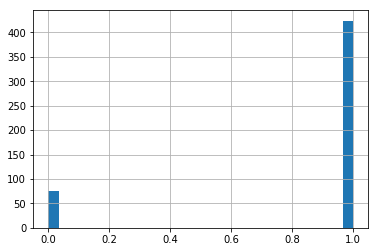

'0.0% de registros nulos'

'Variância: 0.1291543086172331'

qtd   pc
0.00  424 0.85
1.00   76 0.15

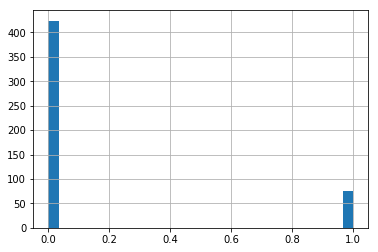

'0.0% de registros nulos'

'Variância: 0.15044488977955925'

qtd   pc
1.00  408 0.82
0.00   92 0.18

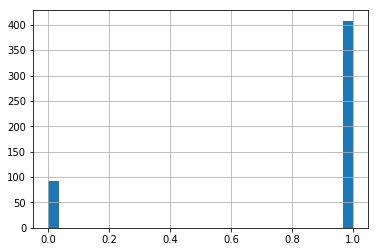

'0.0% de registros nulos'

'Variância: 0.1466092184368726'

qtd   pc
0.00  411 0.82
1.00   89 0.18

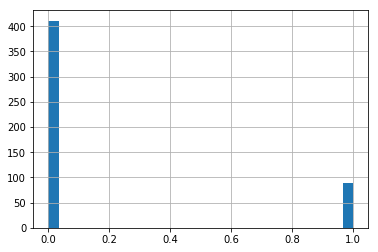

'0.0% de registros nulos'

'Variância: 0.17636873747495058'

qtd   pc
1.00  386 0.77
0.00  114 0.23

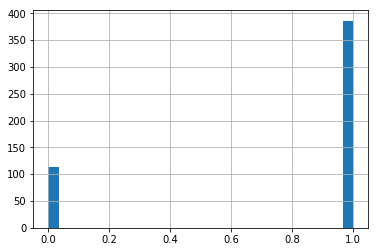

'0.0% de registros nulos'

'Variância: 0.1827655310621232'

qtd   pc
0.00  380 0.76
1.00  120 0.24

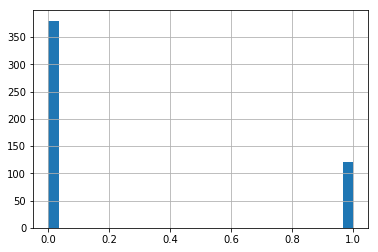

'0.0% de registros nulos'

'Variância: 0.2487334669338689'

qtd   pc
0.00  271 0.54
1.00  229 0.46

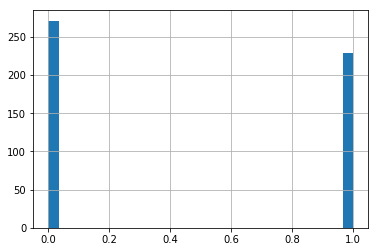

'0.0% de registros nulos'

'Variância: 0.23250901803607077'

qtd   pc
1.00  317 0.63
0.00  183 0.37

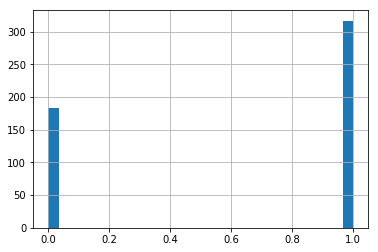

'0.0% de registros nulos'

'Variância: 0.21356312625250606'

qtd   pc
0.00  346 0.69
1.00  154 0.31

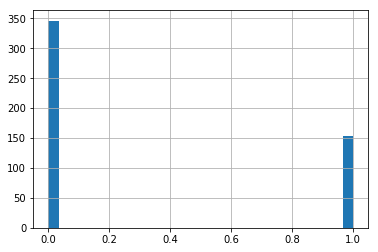

'0.0% de registros nulos'

'Variância: 0.1965691382765548'

qtd   pc
1.00  366 0.73
0.00  134 0.27

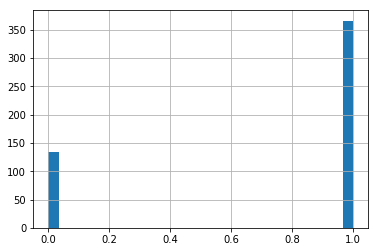

'0.0% de registros nulos'

'Variância: 0.10884168336673457'

qtd   pc
1.00  438 0.88
0.00   62 0.12

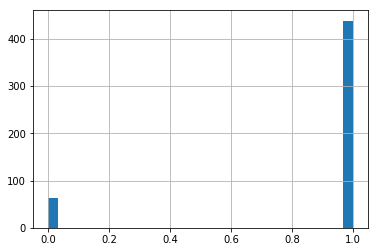

'0.0% de registros nulos'

'Variância: 0.2501763527054135'

qtd   pc
1.00  259 0.52
0.00  241 0.48

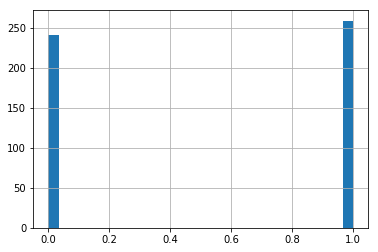

'0.0% de registros nulos'

'Variância: 0.22795591182364805'

qtd   pc
0.00  325 0.65
1.00  175 0.35

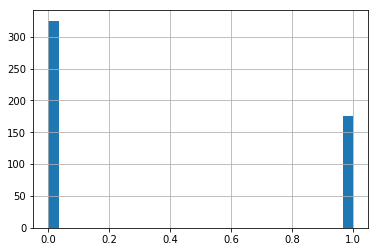

'0.0% de registros nulos'

'Variância: 0.17306212424849676'

qtd   pc
1.00  389 0.78
0.00  111 0.22

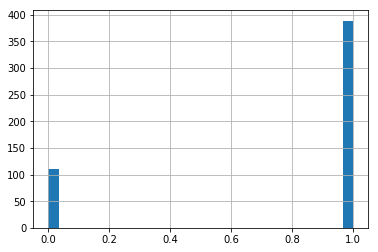

'0.0% de registros nulos'

'Variância: 0.22855310621242472'

qtd   pc
1.00  324 0.65
0.00  176 0.35

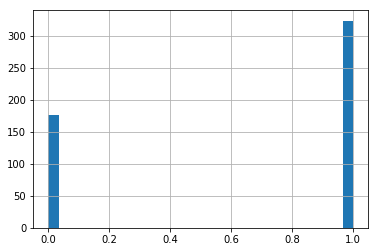

'0.0% de registros nulos'

'Variância: 0.2504649298597172'

qtd   pc
1.00  253 0.51
0.00  247 0.49

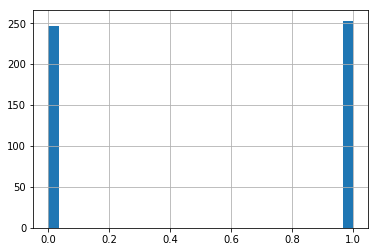

'0.0% de registros nulos'

'Variância: 0.16389178356713427'

qtd   pc
0.00  397 0.79
1.00  103 0.21

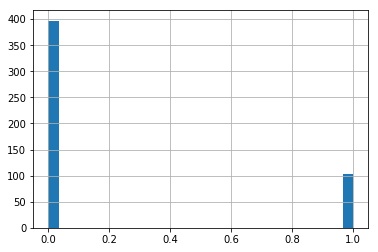

'0.0% de registros nulos'

'Variância: 0.2222204408817647'

qtd   pc
1.00  334 0.67
0.00  166 0.33

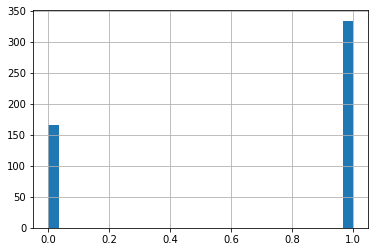

'0.0% de registros nulos'

'Variância: 0.19932264529057997'

qtd   pc
0.00  363 0.73
1.00  137 0.27

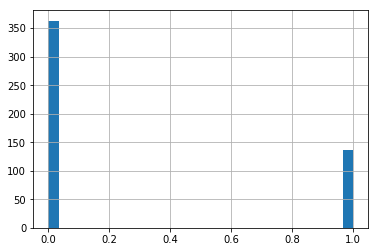

'0.0% de registros nulos'

'Variância: 0.10274949899799576'

qtd   pc
0.00  442 0.88
1.00   58 0.12

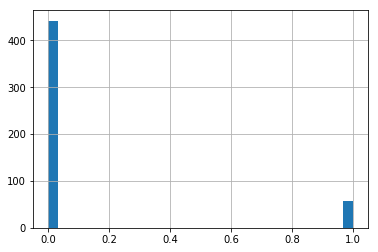

'0.0% de registros nulos'

'Variância: 0.19656913827655523'

qtd   pc
1.00  366 0.73
0.00  134 0.27

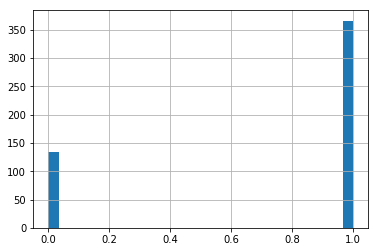

'0.0% de registros nulos'

'Variância: 0.2412665330661329'

qtd   pc
0.00  298 0.60
1.00  202 0.40

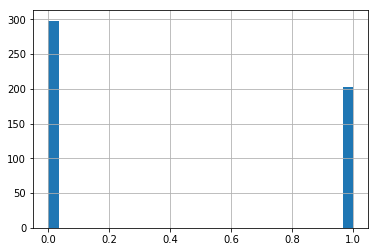

'0.0% de registros nulos'

'Variância: 0.24889779559118394'

qtd   pc
0.00  270 0.54
1.00  230 0.46

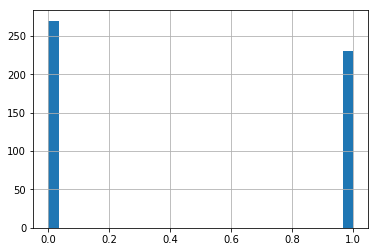

'0.0% de registros nulos'

'Variância: 0.24408817635270522'

qtd   pc
1.00  290 0.58
0.00  210 0.42

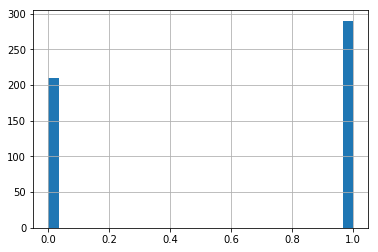

'0.0% de registros nulos'

'Variância: 0.2468937875751498'

qtd   pc
1.00  280 0.56
0.00  220 0.44

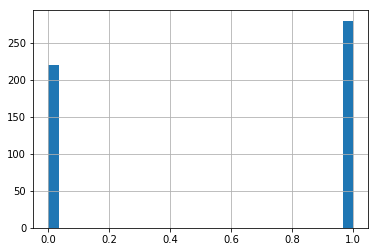

'0.0% de registros nulos'

'Variância: 0.1591142284569129'

qtd   pc
1.00  401 0.80
0.00   99 0.20

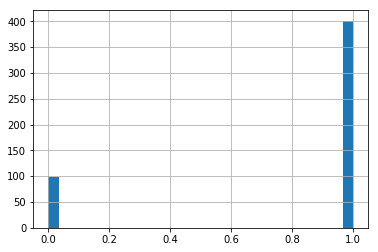

'0.0% de registros nulos'

'Variância: 0.22154308617234475'

qtd   pc
0.00  335 0.67
1.00  165 0.33

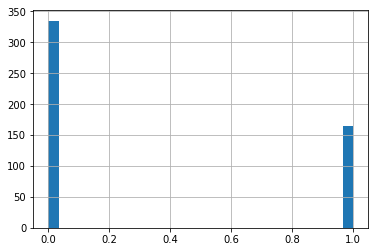

'0.0% de registros nulos'

'Variância: 0.24202004008016204'

qtd   pc
0.00  296 0.59
1.00  204 0.41

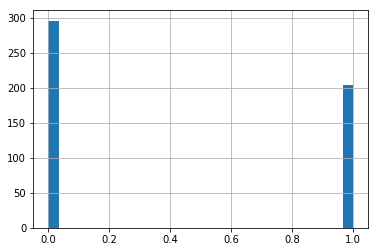

'0.0% de registros nulos'

'Variância: 0.21583567134268586'

qtd   pc
1.00  343 0.69
0.00  157 0.31

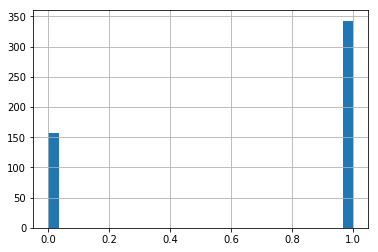

'0.0% de registros nulos'

'Variância: 1596.4339038076162'

count   500.00
mean     26.34
std      39.96
min       0.00
25%      14.00
50%      22.00
75%      30.25
max     639.00
Name: NU_COMPUTADOR, dtype: float64

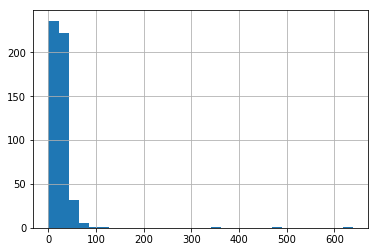

'0.0% de registros nulos'

'Variância: 27.6808456913828'

count   500.00
mean      4.75
std       5.26
min       0.00
25%       2.00
50%       4.00
75%       6.00
max      53.00
Name: NU_COMP_ADMINISTRATIVO, dtype: float64

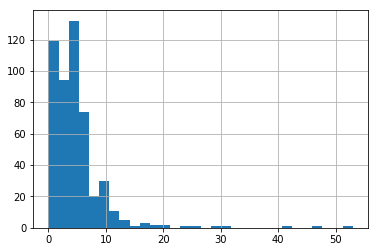

'0.0% de registros nulos'

'Variância: 155.37367134268482'

count   500.00
mean     14.27
std      12.46
min       0.00
25%       1.00
50%      13.50
75%      20.00
max      80.00
Name: NU_COMP_ALUNO, dtype: float64

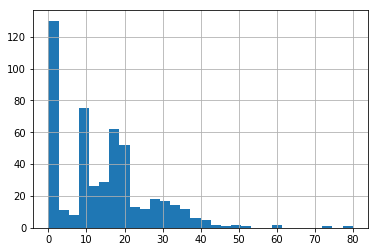

'0.0% de registros nulos'

'Variância: 1702.4672505010003'

count   500.00
mean     76.32
std      41.26
min      10.00
25%      48.00
50%      70.00
75%      96.00
max     392.00
Name: NU_FUNCIONARIOS, dtype: float64

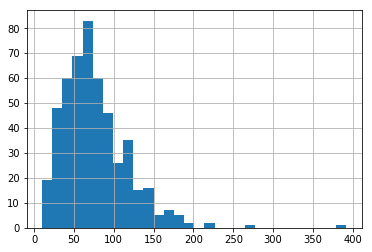

'0.0% de registros nulos'

'Variância: 0.2374789579158309'

qtd   pc
1.00  307 0.61
0.00  193 0.39

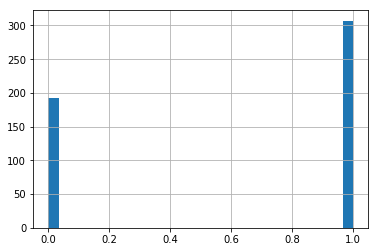

'0.0% de registros nulos'

'Variância: 0.23086172344689293'

qtd   pc
0.00  320 0.64
1.00  180 0.36

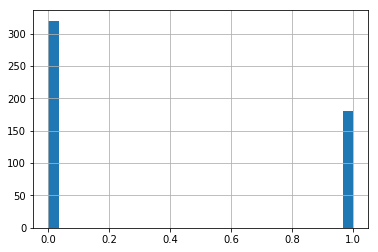

'0.0% de registros nulos'

'Variância: 0.15544689378757467'

qtd   pc
0.00  404 0.81
1.00   96 0.19

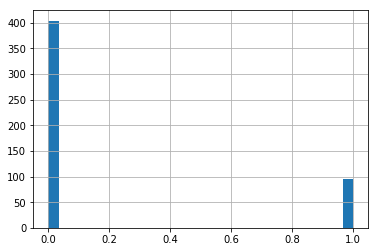

'0.0% de registros nulos'

'Variância: 2.519660518841682'

count   500.00
mean      5.64
std       1.59
min       2.00
25%       4.64
50%       5.42
75%       6.36
max      17.00
Name: NU_PROP_FUNS_SALAS_UTZD, dtype: float64

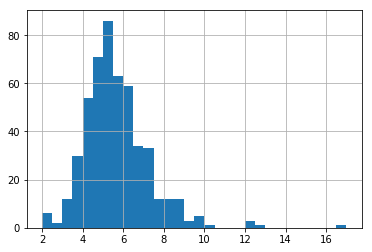

'0.0% de registros nulos'

'Variância: 8.516860371104565'

count   500.00
mean      2.03
std       2.92
min       0.00
25%       1.11
50%       1.75
75%       2.44
max      60.75
Name: NU_PROP_CPU_SALAS_UTZD, dtype: float64

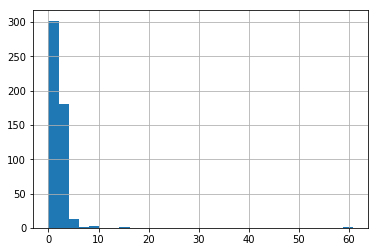

'0.0% de registros nulos'

'Variância: 10141.80310621245'

count   500.00
mean    158.45
std     100.71
min       1.00
25%      86.00
50%     154.00
75%     202.00
max     432.00
Name: NU_QTD_SETORES_CENSITARIOS, dtype: float64

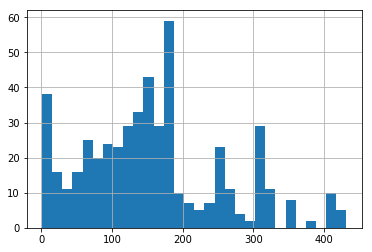

'0.0% de registros nulos'

'Variância: 0.08675136447294596'

count   500.00
mean      1.57
std       0.29
min       1.04
25%       1.44
50%       1.52
75%       1.66
max       4.85
Name: NU_MEDIA_DISTANCIA_ESCOLA_SETOR, dtype: float64

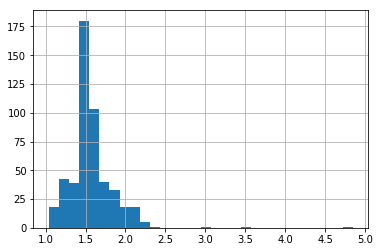

'0.0% de registros nulos'

'Variância: 10945504.354132267'

count     500.00
mean     4181.52
std      3308.40
min      1101.00
25%      1923.00
50%      2480.00
75%      5196.00
max     14050.00
Name: NU_MEDIANA_RENDA_MEDIA, dtype: float64

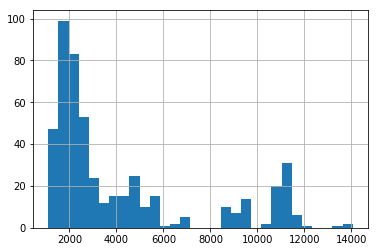

'0.0% de registros nulos'

'Variância: 653.8466092184367'

count   500.00
mean    175.42
std      25.57
min      34.00
25%     169.00
50%     181.00
75%     189.00
max     215.50
Name: NU_MEDIANA_QTD_DOMICILIOS, dtype: float64

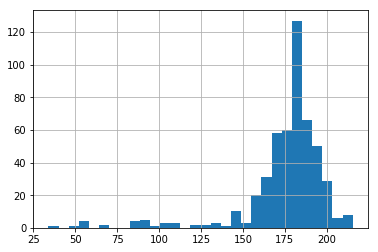

'0.0% de registros nulos'

'Variância: 10849.39506513026'

count   500.00
mean    586.49
std     104.16
min     105.00
25%     533.50
50%     609.50
75%     668.00
max     769.00
Name: NU_MEDIANA_QTD_PESSOAS, dtype: float64

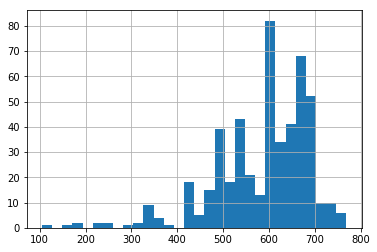

'0.0% de registros nulos'

'Variância: 432117324.1935835'

count      500.00
mean      4355.80
std      20787.43
min     -32721.00
25%     -12024.00
50%      10065.00
75%      21284.25
max      32697.00
Name: NU_SOMA_QTD_DOMICILIOS, dtype: float64

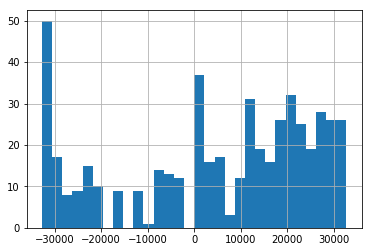

'0.0% de registros nulos'

'Variância: 309683047.81920254'

count      500.00
mean      1579.29
std      17597.81
min     -31623.00
25%     -11603.00
50%       2086.00
75%      15459.00
max      32356.00
Name: NU_SOMA_QTD_PESSOAS, dtype: float64

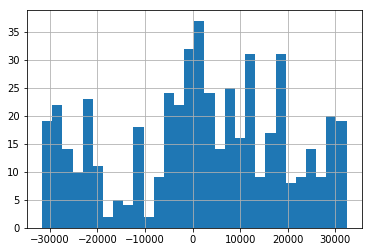

'0.0% de registros nulos'

'Variância: 0.007822586346361116'

count   500.00
mean      0.30
std       0.09
min       0.00
25%       0.27
50%       0.32
75%       0.36
max       0.45
Name: NU_PROP_DOM_ALUGADOS, dtype: float64

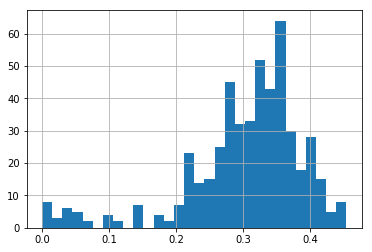

'0.0% de registros nulos'

'Variância: 0.008552230486625644'

count   500.00
mean      0.12
std       0.09
min       0.04
25%       0.08
50%       0.10
75%       0.11
max       1.00
Name: NU_PROP_DOM_CEDIDOS, dtype: float64

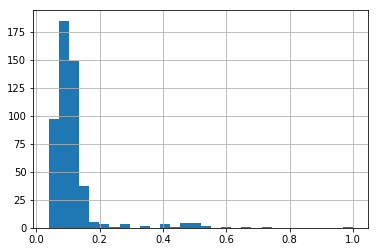

'0.0% de registros nulos'

'Variância: 0.0009659843680250532'

count   500.00
mean      0.05
std       0.03
min       0.00
25%       0.01
50%       0.04
75%       0.06
max       0.17
Name: NU_PROP_DOM_EM_AQUISICAO, dtype: float64

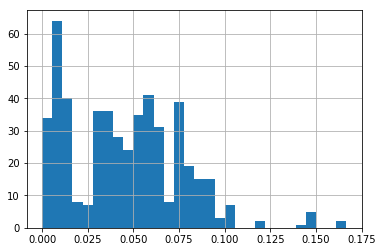

'0.0% de registros nulos'

'Variância: 0.05509034458124555'

count   500.00
mean      0.19
std       0.23
min       0.00
25%       0.02
50%       0.06
75%       0.23
max       0.71
Name: NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM, dtype: float64

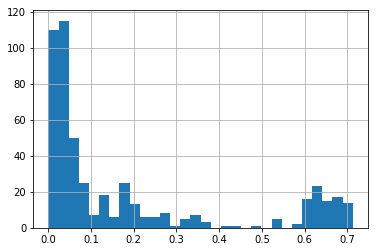

'0.0% de registros nulos'

'Variância: 0.0487186724785969'

count   500.00
mean      0.39
std       0.22
min       0.02
25%       0.20
50%       0.41
75%       0.55
max       0.82
Name: NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM, dtype: float64

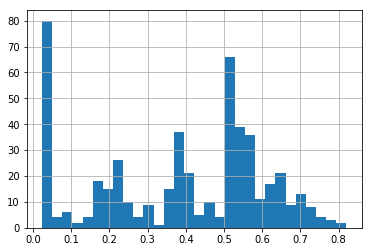

'0.0% de registros nulos'

'Variância: 0.00047009295134268516'

count   500.00
mean      0.52
std       0.02
min       0.40
25%       0.51
50%       0.52
75%       0.53
max       0.55
Name: NU_PROP_PSS_MULHERES, dtype: float64

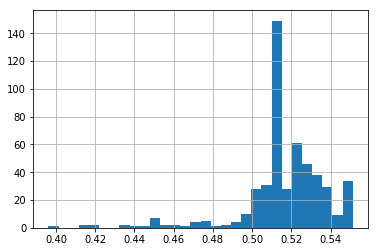

'0.0% de registros nulos'

'Variância: 0.0005504625773222439'

count   500.00
mean      0.13
std       0.02
min       0.02
25%       0.12
50%       0.13
75%       0.14
max       0.18
Name: NU_PROP_PSS_MULHERES_RSP, dtype: float64

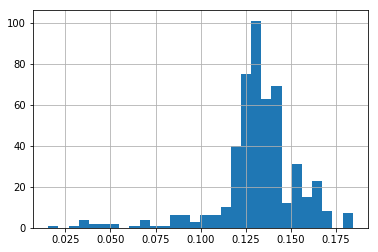

'0.0% de registros nulos'

'Variância: 0.001903211722492584'

count   500.00
mean      0.19
std       0.04
min       0.11
25%       0.16
50%       0.20
75%       0.22
max       0.30
Name: NU_PROP_PSS_ABXO_12ANOS, dtype: float64

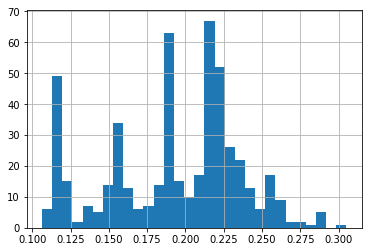

'0.0% de registros nulos'

'Variância: 0.0007824764366847454'

count   500.00
mean      0.06
std       0.03
min       0.01
25%       0.03
50%       0.05
75%       0.07
max       0.15
Name: NU_PROP_PSS_ACIMA_65ANOS, dtype: float64

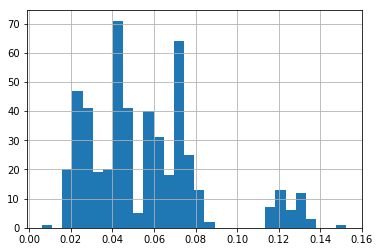

'0.0% de registros nulos'

'Variância: 9.0955089420056e-07'

count   500.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.01
Name: NU_PROP_PSS_ACIMA_90ANOS, dtype: float64

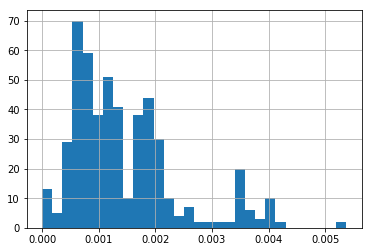

In [47]:
explora_df(f)

In [49]:
#Salva Dataframe com todas as features das escolas
f.to_csv(f'{PATH_DF_CSV}features_escolas.csv')

In [146]:
fkm = f.copy()

In [61]:
display(plota_matriz_heatmap(fkm.corr()))

In [50]:
fkm.drop(['IN_ESGOTO_FOSSA','IN_QUADRA_ESPORTES_DESCOBERTA'],axis=1,inplace=True)

In [150]:
scaler = MinMaxScaler()
data = scaler.fit_transform(fkm.values)


In [97]:
#Procura o melhor Random State para o Spectral Clustering
v =[]
for i in range(101):
    a = cluster.SpectralClustering(random_state=i,affinity='nearest_neighbors',
                                   n_clusters=3,
                                  assign_labels = 'discretize').fit_predict(data)
    s = pd.Series(a).value_counts()
    v.append(max([min(s),1])/max([max(s),10]))
    if i%10 == 0:
        display(f'{i}. Random state {np.argmax(v)} traz o conjunto mais homogeneo, com de dif de {v[np.argmax(v)]}.')    


'0. Random state 0 traz o conjunto mais homogeneo, com de dif de 0.3548387096774194.'

'10. Random state 6 traz o conjunto mais homogeneo, com de dif de 0.4251207729468599.'

'20. Random state 6 traz o conjunto mais homogeneo, com de dif de 0.4251207729468599.'

'30. Random state 6 traz o conjunto mais homogeneo, com de dif de 0.4251207729468599.'

'40. Random state 6 traz o conjunto mais homogeneo, com de dif de 0.4251207729468599.'

'50. Random state 6 traz o conjunto mais homogeneo, com de dif de 0.4251207729468599.'

'60. Random state 6 traz o conjunto mais homogeneo, com de dif de 0.4251207729468599.'

'70. Random state 6 traz o conjunto mais homogeneo, com de dif de 0.4251207729468599.'

'80. Random state 6 traz o conjunto mais homogeneo, com de dif de 0.4251207729468599.'

'90. Random state 6 traz o conjunto mais homogeneo, com de dif de 0.4251207729468599.'

'100. Random state 6 traz o conjunto mais homogeneo, com de dif de 0.4251207729468599.'

In [154]:
a = cluster.SpectralClustering(random_state=6,n_clusters=4,affinity='nearest_neighbors',
                                  assign_labels = 'discretize').fit_predict(data)
pd.Series(a).value_counts()
f['ROTULO_ESCOLA'] = a

In [155]:
f.ROTULO_ESCOLA.value_counts()

3    248
2    117
1     70
0     65
Name: ROTULO_ESCOLA, dtype: int64

In [156]:
d = f.loc[f.ROTULO_ESCOLA == 3].drop('ROTULO_ESCOLA',axis=1).values
dt = scaler.fit_transform(d)
a = cluster.SpectralClustering(random_state=6,n_clusters=2,affinity='nearest_neighbors',
                                  assign_labels = 'discretize').fit_predict(dt)
f.loc[f.ROTULO_ESCOLA == 3,'ROTULO_ESCOLA'] = a + 30
f.ROTULO_ESCOLA.value_counts()

30    132
2     117
31    116
1      70
0      65
Name: ROTULO_ESCOLA, dtype: int64

In [115]:
f.columns

Index(['IN_ESGOTO_REDE_PUBLICA', 'IN_ESGOTO_FOSSA',
       'IN_LABORATORIO_INFORMATICA', 'IN_LABORATORIO_CIENCIAS',
       'IN_SALA_ATENDIMENTO_ESPECIAL', 'IN_QUADRA_ESPORTES_COBERTA',
       'IN_QUADRA_ESPORTES_DESCOBERTA', 'IN_QUADRA_ESPORTES', 'IN_BIBLIOTECA',
       'IN_SALA_LEITURA', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_PARQUE_INFANTIL',
       'IN_BANHEIRO_EI', 'IN_BANHEIRO_PNE', 'IN_DEPENDENCIAS_PNE',
       'IN_BANHEIRO_CHUVEIRO', 'IN_REFEITORIO', 'IN_DESPENSA',
       'IN_ALMOXARIFADO', 'IN_AUDITORIO', 'IN_PATIO_COBERTO',
       'IN_PATIO_DESCOBERTO', 'IN_AREA_VERDE', 'IN_EQUIP_VIDEOCASSETE',
       'IN_EQUIP_PARABOLICA', 'IN_EQUIP_RETROPROJETOR',
       'IN_EQUIP_IMPRESSORA_MULT', 'IN_EQUIP_FAX', 'IN_EQUIP_FOTO',
       'NU_COMPUTADOR', 'NU_COMP_ADMINISTRATIVO', 'NU_COMP_ALUNO',
       'NU_FUNCIONARIOS', 'TP_AEE', 'TP_ATIVIDADE_COMPLEMENTAR',
       'IN_FINAL_SEMANA', 'NU_PROP_FUNS_SALAS_UTZD', 'NU_PROP_CPU_SALAS_UTZD',
       'NU_QTD_SETORES_CENSITARIOS', 'NU_MEDIA_DISTANCIA_ES

Base de TREINO
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        47
          1       1.00      1.00      1.00        49
          2       0.99      1.00      0.99        83
         30       1.00      0.99      1.00       106
         31       0.99      1.00      0.99        90

avg / total       0.99      0.99      0.99       375

Base de TESTE
             precision    recall  f1-score   support

          0       0.81      0.72      0.76        18
          1       0.95      1.00      0.98        21
          2       0.80      0.59      0.68        34
         30       0.62      0.92      0.74        26
         31       0.74      0.65      0.69        26

avg / total       0.78      0.76      0.76       125



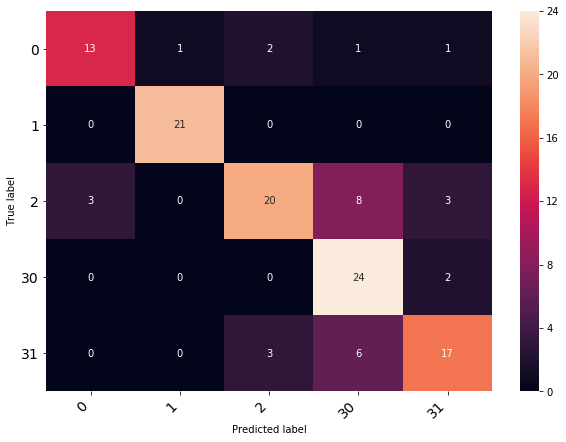

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature IN_QUADRA_ESPORTES (0.062871)
2. feature NU_PROP_PSS_ABXO_12ANOS (0.059047)
3. feature NU_FUNCIONARIOS (0.053423)
4. feature NU_COMPUTADOR (0.051441)
5. feature NU_PROP_PSS_MULHERES_RSP (0.042105)
6. feature IN_DESPENSA (0.039325)
7. feature NU_QTD_SETORES_CENSITARIOS (0.036455)
8. feature IN_AREA_VERDE (0.032549)
9. feature NU_PROP_DOM_EM_AQUISICAO (0.031530)
10. feature NU_MEDIANA_RENDA_MEDIA (0.029371)
11. feature NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM (0.027299)
12. feature NU_PROP_DOM_ALUGADOS (0.025112)
13. feature NU_MEDIA_DISTANCIA_ESCOLA_SETOR (0.024146)
14. feature NU_PROP_PSS_ACIMA_90ANOS (0.022765)
15. feature IN_PARQUE_INFANTIL (0.022753)
16. feature IN_QUADRA_ESPORTES_DESCOBERTA (0.022494)
17. feature NU_PROP_PSS_ACIMA_65ANOS (0.021450)
18. feature NU_PROP_PSS_MULHERES (0.020203)
19. feature NU_COMP_ADMINISTRATIVO (0.019420)
20. feature NU_PROP_DOM_CEDIDOS (0.018495)
21. feature IN_QUADRA_ESPORTES_COBERTA (0.017919

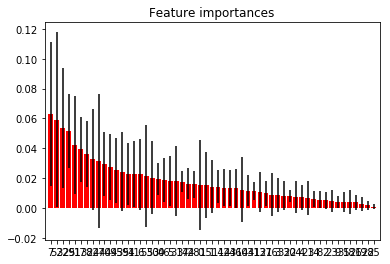

In [157]:
#Roda um Random Forest com todas as features
ft = processa_tudo(f,tg='ROTULO_ESCOLA')

RandomizedSearchCV took 0.89 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.608 (std: 0.102)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 7, 'min_samples_split': 6}

Model with rank: 2
Mean validation score: 0.600 (std: 0.061)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 6}

Model with rank: 2
Mean validation score: 0.600 (std: 0.089)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.600 (std: 0.101)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 6}

Model with rank: 2
Mean validation score: 0.600 (std: 0.112)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth

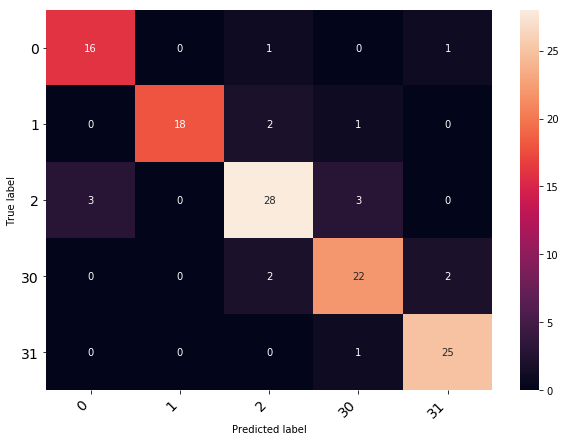

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature NU_FUNCIONARIOS (0.309503)
2. feature NU_PROP_PSS_ABXO_12ANOS (0.154406)
3. feature NU_PROP_PSS_MULHERES_RSP (0.116460)
4. feature NU_COMPUTADOR (0.114312)
5. feature IN_QUADRA_ESPORTES (0.091486)
6. feature NU_QTD_SETORES_CENSITARIOS (0.087737)
7. feature NU_MEDIANA_RENDA_MEDIA (0.045567)
8. feature IN_DESPENSA (0.040716)
9. feature NU_PROP_DOM_EM_AQUISICAO (0.022345)
10. feature IN_AREA_VERDE (0.017468)


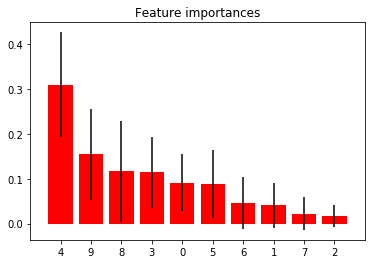

(['NU_FUNCIONARIOS',
  'NU_PROP_PSS_ABXO_12ANOS',
  'NU_PROP_PSS_MULHERES_RSP',
  'NU_COMPUTADOR',
  'IN_QUADRA_ESPORTES',
  'NU_QTD_SETORES_CENSITARIOS',
  'NU_MEDIANA_RENDA_MEDIA',
  'IN_DESPENSA',
  'NU_PROP_DOM_EM_AQUISICAO',
  'IN_AREA_VERDE'],
 GridSearchCV(cv=None, error_score='raise',
        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=123, verbose=0, warm_start=False),
        fit_params=None, iid=True, n_jobs=1,
        param_grid={'max_depth': [3, None], 'max_features': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
        pre_dispatch='2*n_job

In [159]:
#reduz a quantidade de features para 10
QTD_FEATURES_IMPORTANTES = 10
cols_imp =[col for col in f.columns if col in ft[0][:QTD_FEATURES_IMPORTANTES]] +['ROTULO_ESCOLA']
processa_tudo(f[cols_imp],tg='ROTULO_ESCOLA',grid_search=True)

In [160]:
a = f[cols_imp].merge(escolas[['LAT','LONG']],left_index=True,right_index=True)

In [161]:
a.head()

IN_QUADRA_ESPORTES  IN_DESPENSA  IN_AREA_VERDE  NU_COMPUTADOR  \
CO_ENTIDADE                                                                  
53004167                   0.00         1.00           0.00           3.00   
53002296                   0.00         1.00           1.00           3.00   
53001567                   0.00         1.00           1.00          22.00   
53009479                   1.00         0.00           0.00          24.00   
53002474                   1.00         1.00           0.00          26.00   

             NU_FUNCIONARIOS  NU_QTD_SETORES_CENSITARIOS  \
CO_ENTIDADE                                                
53004167               39.00                         315   
53002296               43.00                         184   
53001567               56.00                         161   
53009479               97.00                          33   
53002474              130.00                          95   

             NU_MEDIANA_RENDA_MEDIA  NU_PROP_DOM_EM_AQUISICAO  \
CO_ENTIDADE                                                     
53004167                    2456.00                      0.04   
53002296                   11032.00                      0.06   
53001567                   11232.00                      0.06   
53009479                   13680.00                      0.05   
53002474                    1802.00                      0.03   

             NU_PROP_PSS_MULHERES_RSP  NU_PROP_PSS_ABXO_12ANOS  ROTULO_ESCOLA  \
CO_ENTIDADE                                                                     
53004167                         0.14                     0.19              1   
53002296                         0.17                     0.12              2   
53001567                         0.16                     0.12              0   
53009479                         0.11                     0.11             30   
53002474                         0.12                     0.22             31   

               LAT   LONG  
CO_ENTIDADE                
53004167    -15.81 -48.09  
53002296    -15.80 -47.91  
53001567    -15.83 -47.91  
53009479    -15.84 -47.88  
53002474    -16.05 -48.03

In [159]:
#plota escolas diferenciando a cor por cluster
lclz_praca_3_poderes = [-15.7994, -47.8613]
map = folium.Map(location=lclz_praca_3_poderes, zoom_start=10)
cores = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
         'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
         'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
         'gray', 'black', 'lightgray']
for i,c in enumerate(a.cl.unique()):
    ll = a.loc[a.cl == c][['LAT','LONG']].values.tolist()
    for point in range(0, len(ll)):
        folium.Marker(ll[point],icon=folium.Icon(color=cores[i],icon='map-marker-alt')).add_to(map)
map

In [162]:
#Salva as features das escolas junto com os rotulos
f[cols_imp].to_csv(f'{PATH_DF_CSV}features_escolas_modelagem.csv')

In [4]:
#Recarrega o arquivo de escolas
escolas = pd.read_csv(f'{PATH_DF_CSV}features_escolas_modelagem.csv',index_col='CO_ENTIDADE')
escolas.head()

IN_QUADRA_ESPORTES  IN_DESPENSA  IN_AREA_VERDE  NU_COMPUTADOR  \
CO_ENTIDADE                                                                  
53004167                   0.00         1.00           0.00           3.00   
53002296                   0.00         1.00           1.00           3.00   
53001567                   0.00         1.00           1.00          22.00   
53009479                   1.00         0.00           0.00          24.00   
53002474                   1.00         1.00           0.00          26.00   

             NU_FUNCIONARIOS  NU_QTD_SETORES_CENSITARIOS  \
CO_ENTIDADE                                                
53004167               39.00                         315   
53002296               43.00                         184   
53001567               56.00                         161   
53009479               97.00                          33   
53002474              130.00                          95   

             NU_MEDIANA_RENDA_MEDIA  NU_PROP_DOM_EM_AQUISICAO  \
CO_ENTIDADE                                                     
53004167                    2456.00                      0.04   
53002296                   11030.00                      0.06   
53001567                   11230.00                      0.06   
53009479                   13680.00                      0.05   
53002474                    1802.00                      0.03   

             NU_PROP_PSS_MULHERES_RSP  NU_PROP_PSS_ABXO_12ANOS  ROTULO_ESCOLA  
CO_ENTIDADE                                                                    
53004167                         0.14                     0.19              1  
53002296                         0.17                     0.12              2  
53001567                         0.16                     0.12              0  
53009479                         0.11                     0.11             30  
53002474                         0.12                     0.22             31

<table><tr><td>
<img src='img/lisa-simpson-livros236.jpg'/>
</td><td><h1> Matriculas </h1></td></tr></table>

In [9]:
#lambdas de todas matriculas
turmas_interesse = dfs[2015].loc[dfs[2015].CO_ENTIDADE.isin(features_escolas.index)].ID_TURMA.unique()
fmv = lambda df: df.loc[df.PK_COD_TURMA.isin(turmas_interesse)] 
fmn = lambda df: df.loc[df.ID_TURMA.isin(turmas_interesse)] 
l_df_matricula = lambda ano: ajusta_colunas_int_df_inep(monta_df_docente(f'{ARQ_PATH}/{ano}/MATRICULA_CO.CSV'))

In [78]:
# carrega todas as matriculas, filtra e salva
matriculas_df = {a : fmn(l_df_matricula(a)) if a >= 2015 else fmv(l_df_matricula(a)) for a in tqdm(anos_psq)}
[v.to_csv(f'{ARQ_PATH}MATRICULAS_FILTRADAS_{k}.csv',index=False) for k,v in tqdm(matriculas_df.items())]; 


100%|██████████| 7/7 [00:33<00:00,  4.76s/it]


[None, None, None, None, None, None, None]

In [10]:
#carrega matriculas filtradas
matriculas_df = {a : ajusta_colunas_int_df_inep(pd.read_csv(f'{ARQ_PATH}MATRICULAS_FILTRADAS_{a}.csv',low_memory=False)) for a in [2015]}

### Alunos

In [11]:
#carrega e filtra os alunos da rede publica do DF
alunos_interesse = matriculas_df[2015].CO_PESSOA_FISICA.unique()
fav = lambda df: df.loc[df.FK_COD_ALUNO.isin(alunos_interesse)] 
fan = lambda df: df.loc[df.CO_PESSOA_FISICA.isin(alunos_interesse)] 

alunos_df = {a : fan(l_df_matricula(a)) if a >= 2015 else fav(l_df_matricula(a)) for a in tqdm(anos_psq)}


100%|██████████| 7/7 [10:41<00:00, 91.63s/it]


In [12]:
#salva alunos filtrados
[v.to_csv(f'{ARQ_PATH}ALUNOS_FILTRADOS_{k}.csv',index=False) for k,v in tqdm(alunos_df.items())]; 


100%|██████████| 7/7 [01:47<00:00, 15.29s/it]


In [10]:
#carrega alunos filtrados
alunos_df = {a : ajusta_colunas_int_df_inep(pd.read_csv(f'{ARQ_PATH}ALUNOS_FILTRADOS_{a}.csv',low_memory=False)) for a in tqdm(anos_psq)}


100%|██████████| 7/7 [00:37<00:00,  5.32s/it]


In [13]:
#Dataframe de alunos
cols_mtr = ['ID_MATRICULA','CO_PESSOA_FISICA',
'NU_IDADE_REFERENCIA','NU_DURACAO_TURMA',
'NU_DUR_ATIV_COMP_MESMA_REDE',
'NU_DUR_ATIV_COMP_OUTRAS_REDES',
'NU_DUR_AEE_MESMA_REDE',
'NU_DUR_AEE_OUTRAS_REDES',
'NU_DIAS_ATIVIDADE',
'TP_SEXO','TP_COR_RACA',
'CO_UF_NASC','CO_UF_END',
'TP_ZONA_RESIDENCIAL',
'IN_TRANSPORTE_PUBLICO',
'IN_TRANSP_VANS_KOMBI','IN_TRANSP_MICRO_ONIBUS',
'IN_TRANSP_ONIBUS','IN_TRANSP_BICICLETA',
'IN_TRANSP_TR_ANIMAL','IN_TRANSP_OUTRO_VEICULO',
'IN_TRANSP_EMBAR_ATE5','IN_TRANSP_EMBAR_5A15',
'IN_TRANSP_EMBAR_15A35','IN_TRANSP_EMBAR_35',
'IN_TRANSP_TREM_METRO','IN_NECESSIDADE_ESPECIAL',
'IN_CEGUEIRA','IN_BAIXA_VISAO',
'IN_SURDEZ','IN_DEF_AUDITIVA',
'IN_SURDOCEGUEIRA','IN_DEF_FISICA',
'IN_DEF_INTELECTUAL','IN_DEF_MULTIPLA',
'IN_AUTISMO','IN_SINDROME_ASPERGER',
'IN_SINDROME_RETT','IN_TRANSTORNO_DI',
'IN_SUPERDOTACAO','IN_RECURSO_LEDOR',
'IN_RECURSO_TRANSCRICAO','IN_RECURSO_INTERPRETE',
'IN_RECURSO_LIBRAS','IN_RECURSO_LABIAL',
'IN_RECURSO_BRAILLE','IN_RECURSO_AMPLIADA_16',
'IN_RECURSO_AMPLIADA_20','IN_RECURSO_AMPLIADA_24',
'IN_RECURSO_NENHUM',
'TP_MEDIACAO_DIDATICO_PEDAGO','IN_ESPECIAL_EXCLUSIVA',
'IN_REGULAR','IN_EJA',
'IN_PROFISSIONALIZANTE','TP_ETAPA_ENSINO',
'TP_ETAPA_AGREGADA','ID_TURMA', 'CO_ENTIDADE'
]
aln15 = alunos_df[2015][cols_mtr].copy()


In [22]:
#Criacao de features dos alunos
idd_max_etapa = {
    1  : 4, 2  : 6,  4  : 7, 5  : 8, 6  : 9, 7  : 10, 8  : 11, 9  : 12, 
    10 : 13, 11 : 14, 14 : 7, 15 : 8, 16 : 9, 17 : 10, 18 : 11, 19 : 12,
    20 : 13, 21 : 14, 41 : 15, 25 : 16, 26 : 17, 27 : 18, 28 : 19, 
    30 : 16, 31 : 17, 32 : 18, 33 : 19, 35 : 16, 36 : 17, 37 : 18, 38 : 19
}
cd = []
aln15['IN_IDD_CORRETA'] = aln15.apply(lambda lin: lin['NU_IDADE_REFERENCIA'] <= idd_max_etapa[lin['TP_ETAPA_ENSINO']] if lin['TP_ETAPA_ENSINO'] in idd_max_etapa.keys()
                                      else 0,axis=1).astype(np.int8)
cd.append('TP_ETAPA_ENSINO')
aln15['IN_NATURAL_DF'] = (aln15.CO_UF_NASC == 53).astype(np.int8)
cd.append('CO_UF_NASC')
aln15['IN_RESIDE_DF'] = (aln15.CO_UF_END == 53).astype(np.int8)
cd.append('CO_UF_END')
aln15['NU_ANOS_TURMA'] = 1
aln15['NU_ANOS_ESCOLA'] = 1
aln15['NU_ANOS_REDE_PBC_DF'] = 1
for k in anos_psq[:-2]:
    v = alunos_df[k]
    #display(f'{k} - {v.shape} / {aln15.loc[aln15.NU_ANOS_TURMA == 0].shape}')
    a = aln15[['CO_PESSOA_FISICA','ID_TURMA']].merge(v[['FK_COD_ALUNO','PK_COD_TURMA']],
                left_on = ['CO_PESSOA_FISICA','ID_TURMA'],
                right_on = ['FK_COD_ALUNO','PK_COD_TURMA'])[['CO_PESSOA_FISICA','ID_TURMA']]
    aln15.loc[(aln15.CO_PESSOA_FISICA.isin(a.CO_PESSOA_FISICA)) & 
              (aln15.NU_ANOS_TURMA == 1),'NU_ANOS_TURMA'] = 2015 - k
    
    a = aln15[['CO_PESSOA_FISICA','CO_ENTIDADE']].merge(v[['FK_COD_ALUNO','PK_COD_ENTIDADE']],
                left_on = ['CO_PESSOA_FISICA','CO_ENTIDADE'],
                right_on = ['FK_COD_ALUNO','PK_COD_ENTIDADE'])
    aln15.loc[(aln15.CO_PESSOA_FISICA.isin(a.CO_PESSOA_FISICA)) & 
              (aln15.NU_ANOS_ESCOLA == 1),'NU_ANOS_ESCOLA'] = 2015 - k

    aln15.loc[(aln15.CO_PESSOA_FISICA.isin(v.loc[v.ID_DEPENDENCIA_ADM_ESC == 2].FK_COD_ALUNO.values)) & 
              (aln15.NU_ANOS_REDE_PBC_DF == 1),'NU_ANOS_REDE_PBC_DF'] = 2015 - k

aln15['NU_PROP_VIDA_ESCOLA'] = (aln15['NU_ANOS_ESCOLA']/aln15['NU_IDADE_REFERENCIA'].clip_lower(1))
aln15['NU_PROP_VIDA_REDE_PBC'] = (aln15['NU_ANOS_REDE_PBC_DF']/aln15['NU_IDADE_REFERENCIA'].clip_lower(1))
aln15['IN_MULHER'] = (aln15['TP_SEXO'] == 2).astype(np.int8)
cd.append('TP_SEXO')
aln15['TP_COR_RACA'] = aln15.TP_COR_RACA.astype(np.int8)
aln15 = aln15.merge(pd.get_dummies(aln15.TP_COR_RACA.astype(np.int8),prefix='IN_TP_COR_RACA',dtype=np.int8),right_index=True,left_index=True)     
cd.append('TP_COR_RACA')
aln15['TP_ETAPA_AGREGADA'] = aln15.TP_ETAPA_AGREGADA.fillna(0).astype(np.int8)
aln15 = aln15.merge(pd.get_dummies(aln15.TP_ETAPA_AGREGADA,prefix='IN_TP_ETAPA_AGREGADA',dtype=np.int8),right_index=True,left_index=True)     
#1 - Educação Infantil (etapas 1 e 2)
#2 - Anos Iniciais do Ensino Fundamental (etapas 4, 5, 6, 7, 14, 15, 16, 17 e 18)
#3 - Anos Finais do Ensino Fundamental (etapas 8, 9, 10, 11, 19, 20, 21 e 41)
#4 - Ensino Médio Propedêutico (etapas 25, 26, 27, 28 e 29)
#5 - Ensino Médio - Normal/Magistério (etapas 35, 36, 37 e 38)
#6 - Curso técnico integrado (Ensino Médio integrado - etapas 30, 31, 32, 33 e 34) 
#7 - Educação Profissional (etapas 39, 40 e 68)
#8 - EJA - Ensino Fundamental (etapas 65, 69, 70 e 73)
#9 - EJA - Ensino Médio (etapas 67, 71 e 74)

aln15['IN_TP_ETAPA_AGREGADA_INFANTIL'] = (aln15.IN_TP_ETAPA_AGREGADA_1 +
                                       aln15.IN_TP_ETAPA_AGREGADA_2).astype(np.int8)
aln15['IN_TP_ETAPA_AGREGADA_PROFSS'] = (aln15.IN_TP_ETAPA_AGREGADA_6 +
                                       aln15.IN_TP_ETAPA_AGREGADA_7).astype(np.int8)
aln15['IN_TP_ETAPA_AGREGADA_EJA'] = (aln15.IN_TP_ETAPA_AGREGADA_8 +
                                       aln15.IN_TP_ETAPA_AGREGADA_9).astype(np.int8)
cd.append('IN_TP_ETAPA_AGREGADA_1')
cd.append('IN_TP_ETAPA_AGREGADA_2')
cd.append('IN_TP_ETAPA_AGREGADA_6')
cd.append('IN_TP_ETAPA_AGREGADA_7')
cd.append('IN_TP_ETAPA_AGREGADA_8')
cd.append('IN_TP_ETAPA_AGREGADA_9')
cd.append('TP_ETAPA_AGREGADA')
#aln15['IN_TURMA_ANO_ANTEIOR'] = aln15.CO_PESSOA_FISICA alunos_df[2014].loc[FK_COD_ALUNO]


'0.0% de registros nulos'

'Variância: 47.91818505759569'

count   384829.00
mean        13.42
std          6.92
min          0.00
25%          9.00
50%         13.00
75%         16.00
max         83.00
Name: NU_IDADE_REFERENCIA, dtype: float64

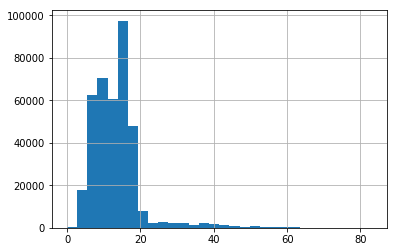

'0.6951139337212112% de registros nulos'

'Variância: nan'

count   382154.00
mean          nan
std           nan
min         20.00
25%        255.00
50%        300.00
75%        300.00
max        660.00
Name: NU_DURACAO_TURMA, dtype: float64

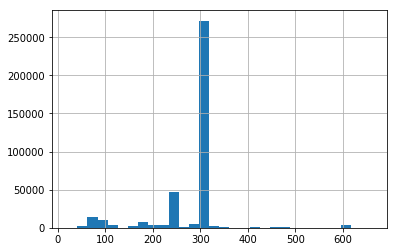

'15.311995717578458% de registros nulos'

'Variância: nan'

count   325904.00
mean          nan
std           nan
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        390.00
Name: NU_DUR_ATIV_COMP_MESMA_REDE, dtype: float64

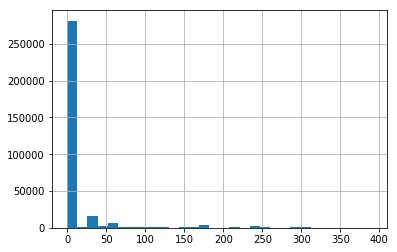

'15.311995717578458% de registros nulos'

'Variância: nan'

count   325904.00
mean         0.05
std           nan
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        300.00
Name: NU_DUR_ATIV_COMP_OUTRAS_REDES, dtype: float64

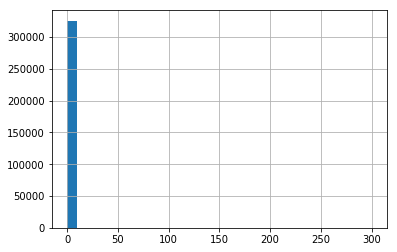

'15.311995717578458% de registros nulos'

'Variância: nan'

count   325904.00
mean          nan
std           nan
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        600.00
Name: NU_DUR_AEE_MESMA_REDE, dtype: float64

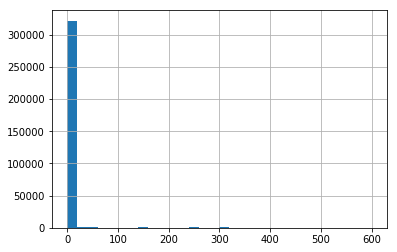

'15.311995717578458% de registros nulos'

'Variância: nan'

count   325904.00
mean         0.12
std           nan
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        600.00
Name: NU_DUR_AEE_OUTRAS_REDES, dtype: float64

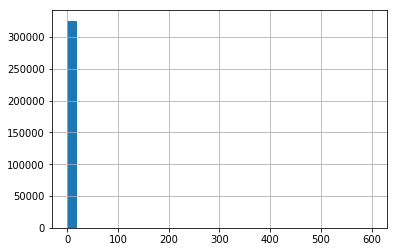

'0.0% de registros nulos'

'Variância: 1.3015873084009104'

qtd   pc
5  326030 0.85
2   24177 0.06
1   16375 0.04
4   10053 0.03
3    4366 0.01
0    2675 0.01
6    1153 0.00

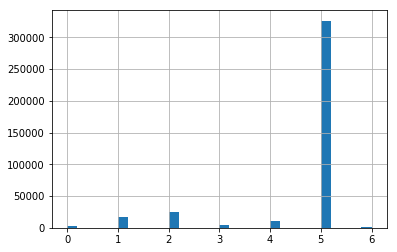

'0.0% de registros nulos'

'Variância: 0.057446648105885026'

qtd   pc
1  361281 0.94
2   23548 0.06

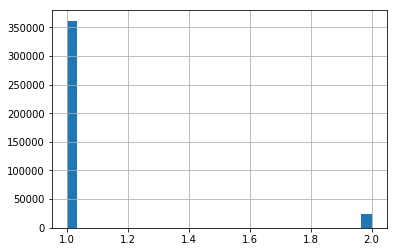

'0.0% de registros nulos'

'Variância: 0.07876490479250461'

qtd   pc
0  351659 0.91
1   33170 0.09

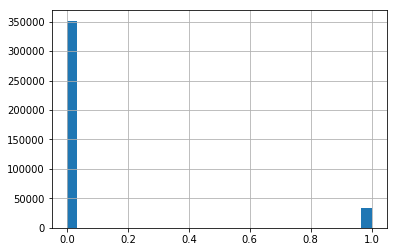

'91.38058722185698% de registros nulos'

'Variância: 0.00012058019638061523'

qtd   pc
0.00  33166 0.09
1.00      4 0.00

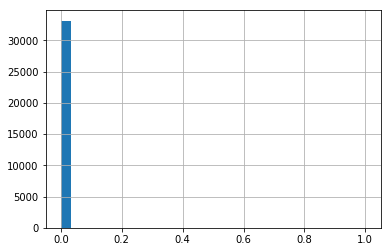

'91.38058722185698% de registros nulos'

'Variância: 0.02593994140625'

qtd   pc
0.00  32285 0.08
1.00    885 0.00

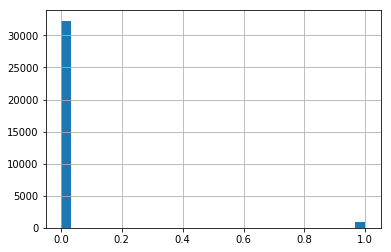

'91.38058722185698% de registros nulos'

'Variância: 0.0203399658203125'

qtd   pc
1.00  32482 0.08
0.00    688 0.00

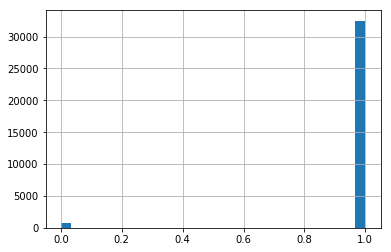

'91.38058722185698% de registros nulos'

'Variância: 0.00024116039276123047'

qtd   pc
0.00  33162 0.09
1.00      8 0.00

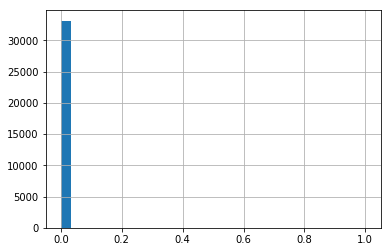

'91.38058722185698% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  33170 0.09

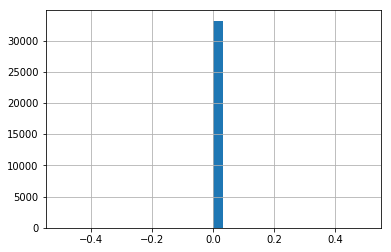

'91.38058722185698% de registros nulos'

'Variância: 0.00027108192443847656'

qtd   pc
0.00  33161 0.09
1.00      9 0.00

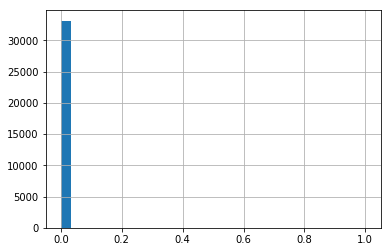

'91.38058722185698% de registros nulos'

'Variância: 0.00012058019638061523'

qtd   pc
0.00  33166 0.09
1.00      4 0.00

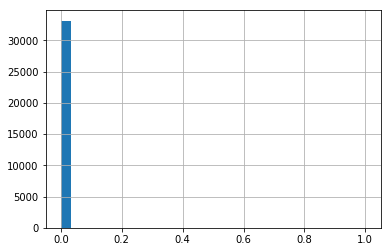

'91.38058722185698% de registros nulos'

'Variância: 6.031990051269531e-05'

qtd   pc
0.00  33168 0.09
1.00      2 0.00

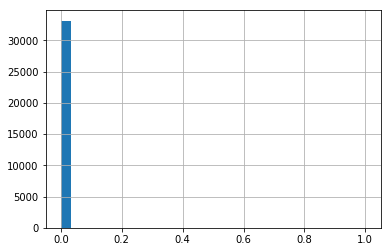

'91.38058722185698% de registros nulos'

'Variância: 0.0367431640625'

qtd   pc
0.00  31904 0.08
1.00   1266 0.00

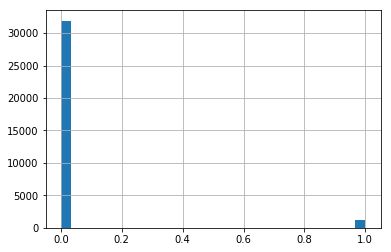

'91.38058722185698% de registros nulos'

'Variância: 0.04388427734375'

qtd   pc
0.00  31644 0.08
1.00   1526 0.00

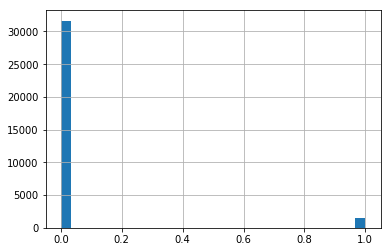

'91.38058722185698% de registros nulos'

'Variância: 0.0014429092407226562'

qtd   pc
0.00  33122 0.09
1.00     48 0.00

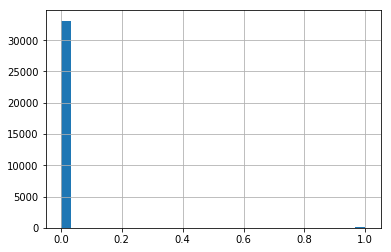

'0.0% de registros nulos'

'Variância: 0.04252248699172411'

qtd   pc
0  367703 0.96
1   17126 0.04

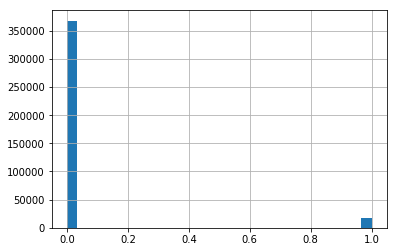

'95.54971169012731% de registros nulos'

'Variância: 0.00792694091796875'

qtd   pc
0.00  16989 0.04
1.00    137 0.00

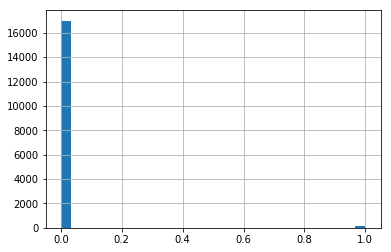

'95.54971169012731% de registros nulos'

'Variância: 0.03973388671875'

qtd   pc
0.00  16415 0.04
1.00    711 0.00

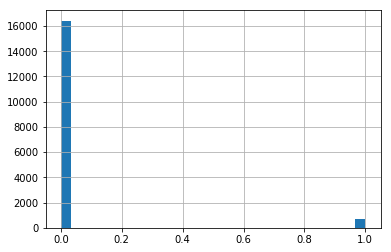

'95.54971169012731% de registros nulos'

'Variância: 0.0157470703125'

qtd   pc
0.00  16852 0.04
1.00    274 0.00

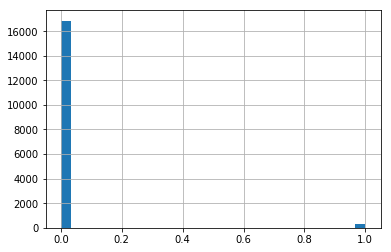

'95.54971169012731% de registros nulos'

'Variância: 0.0809326171875'

qtd   pc
0.00  15604 0.04
1.00   1522 0.00

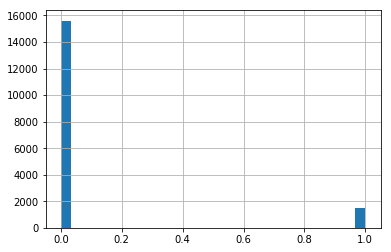

'95.54971169012731% de registros nulos'

'Variância: 0.0009336471557617188'

qtd   pc
0.00  17110 0.04
1.00     16 0.00

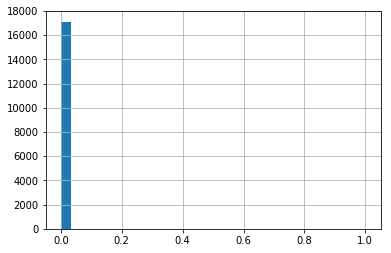

'95.54971169012731% de registros nulos'

'Variância: 0.1512451171875'

qtd   pc
0.00  13948 0.04
1.00   3178 0.01

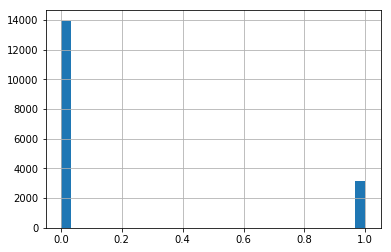

'95.54971169012731% de registros nulos'

'Variância: 0.249267578125'

qtd   pc
1.00  8924 0.02
0.00  8202 0.02

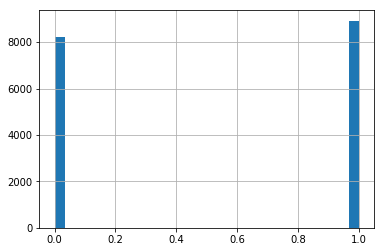

'95.54971169012731% de registros nulos'

'Variância: 0.05322265625'

qtd   pc
0.00  16159 0.04
1.00    967 0.00

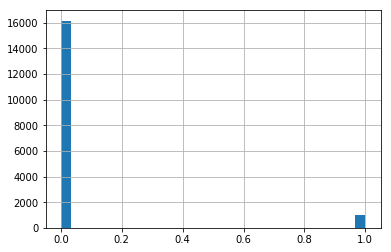

'95.54971169012731% de registros nulos'

'Variância: 0.064453125'

qtd   pc
0.00  15938 0.04
1.00   1188 0.00

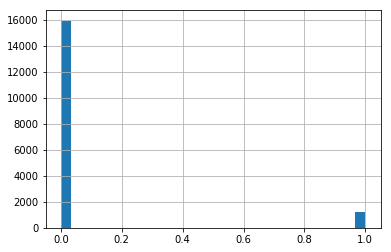

'95.54971169012731% de registros nulos'

'Variância: 0.0170135498046875'

qtd   pc
0.00  16830 0.04
1.00    296 0.00

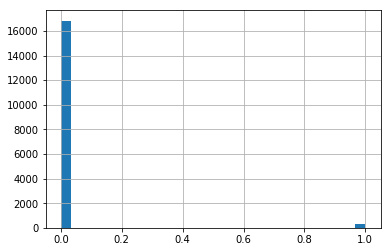

'95.54971169012731% de registros nulos'

'Variância: 0.00116729736328125'

qtd   pc
0.00  17106 0.04
1.00     20 0.00

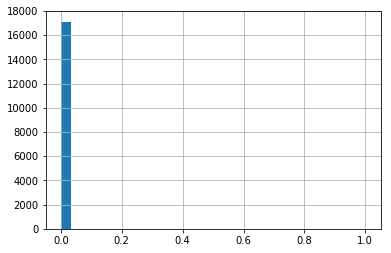

'95.54971169012731% de registros nulos'

'Variância: 0.021270751953125'

qtd   pc
0.00  16754 0.04
1.00    372 0.00

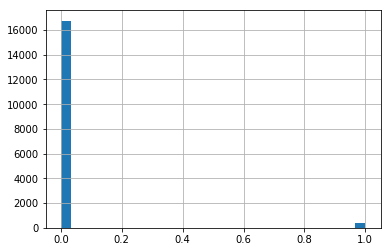

'95.54971169012731% de registros nulos'

'Variância: 0.088134765625'

qtd   pc
0.00  15456 0.04
1.00   1670 0.00

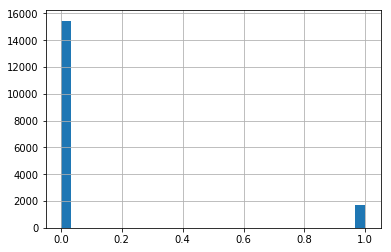

'96.35682342027239% de registros nulos'

'Variância: 0.1446533203125'

qtd   pc
0.00  11559 0.03
1.00   2461 0.01

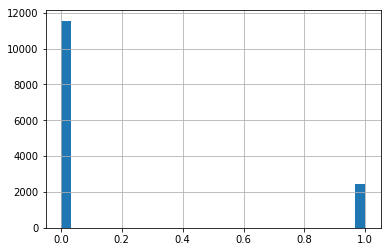

'96.35682342027239% de registros nulos'

'Variância: 0.06768798828125'

qtd   pc
0.00  12996 0.03
1.00   1024 0.00

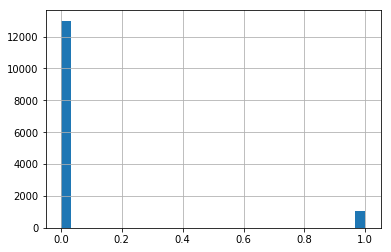

'96.35682342027239% de registros nulos'

'Variância: 0.00028514862060546875'

qtd   pc
0.00  14016 0.04
1.00      4 0.00

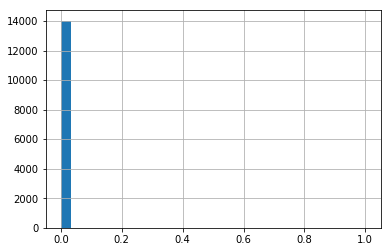

'96.35682342027239% de registros nulos'

'Variância: 0.058929443359375'

qtd   pc
0.00  13140 0.03
1.00    880 0.00

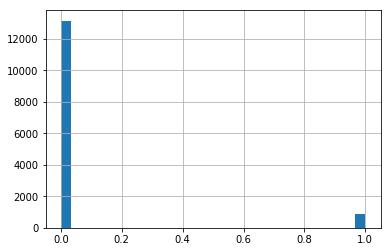

'96.35682342027239% de registros nulos'

'Variância: 0.01065826416015625'

qtd   pc
0.00  13869 0.04
1.00    151 0.00

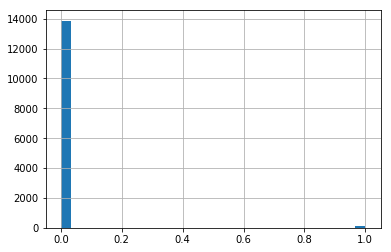

'96.35682342027239% de registros nulos'

'Variância: 0.003192901611328125'

qtd   pc
0.00  13975 0.04
1.00     45 0.00

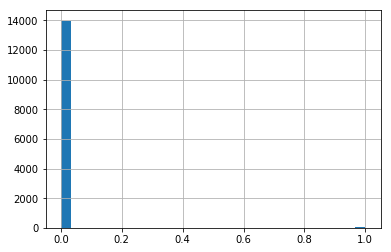

'96.35682342027239% de registros nulos'

'Variância: 0.01031494140625'

qtd   pc
0.00  13874 0.04
1.00    146 0.00

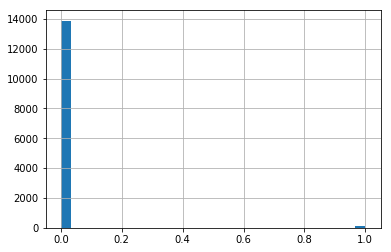

'96.35682342027239% de registros nulos'

'Variância: 0.0055999755859375'

qtd   pc
0.00  13941 0.04
1.00     79 0.00

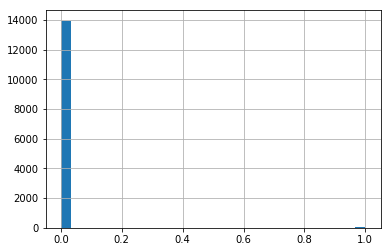

'96.35682342027239% de registros nulos'

'Variância: 0.0069427490234375'

qtd   pc
0.00  13922 0.04
1.00     98 0.00

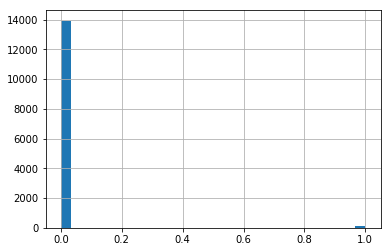

'96.35682342027239% de registros nulos'

'Variância: 0.202392578125'

qtd   pc
1.00  10074 0.03
0.00   3946 0.01

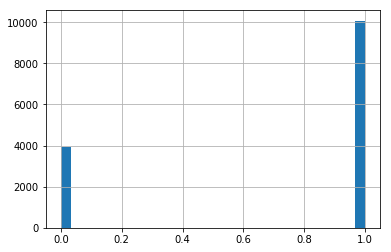

'0.0% de registros nulos'

'Variância: 0.027271511373416928'

qtd   pc
1  382154 0.99
3    2631 0.01
2      44 0.00

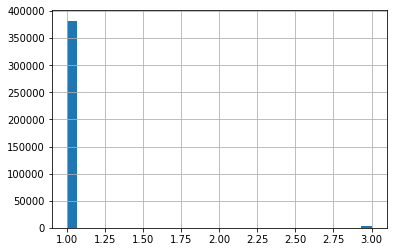

'15.311995717578458% de registros nulos'

'Variância: 0.006694793701171875'

qtd   pc
0.00  323704 0.84
1.00    2200 0.01

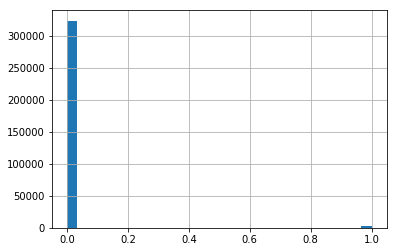

'15.311995717578458% de registros nulos'

'Variância: 0.0'

qtd   pc
1.00  280569 0.73
0.00   45335 0.12

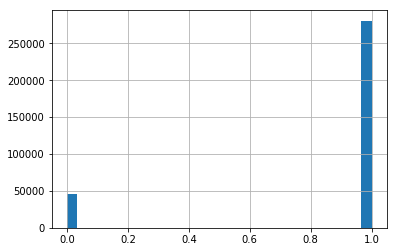

'15.311995717578458% de registros nulos'

'Variância: 0.10675048828125'

qtd   pc
0.00  286322 0.74
1.00   39582 0.10

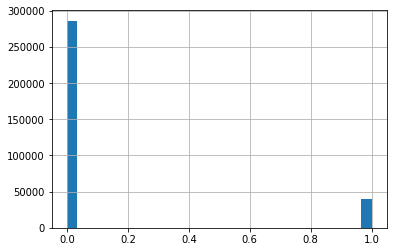

'15.311995717578458% de registros nulos'

'Variância: 0.0186767578125'

qtd   pc
0.00  319695 0.83
1.00    6209 0.02

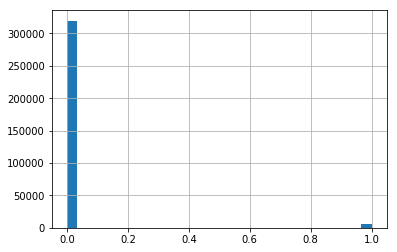

'0.0% de registros nulos'

'Variância: 0.23609826663841255'

qtd   pc
1  237789 0.62
0  147040 0.38

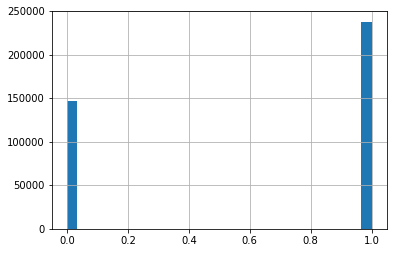

'0.0% de registros nulos'

'Variância: 0.15566044305294252'

qtd   pc
1  310614 0.81
0   74215 0.19

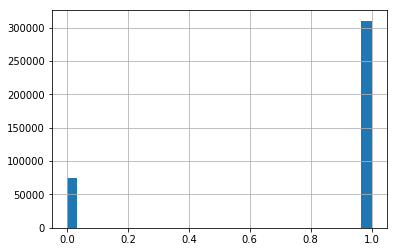

'0.0% de registros nulos'

'Variância: 0.15076497141508427'

qtd   pc
1  313642 0.82
0   71187 0.18

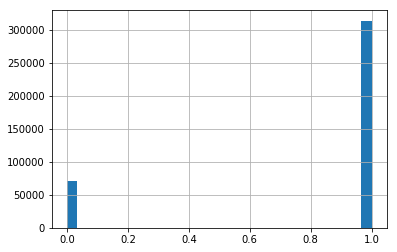

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
1  384829 1.00

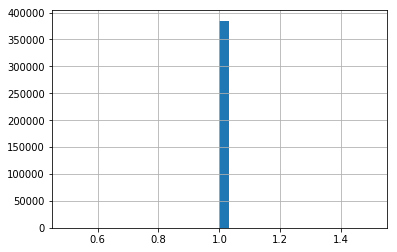

'0.0% de registros nulos'

'Variância: 2.0637200133233353'

qtd   pc
1  230051 0.60
2   99934 0.26
4   35533 0.09
6   13038 0.03
8    6273 0.02

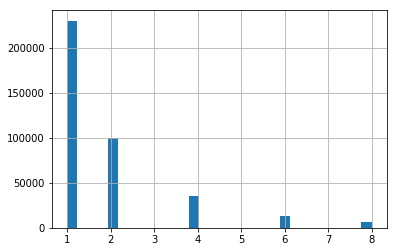

'0.0% de registros nulos'

'Variância: 7.936473134573738'

qtd   pc
8  134765 0.35
1   77263 0.20
6   64278 0.17
2   55180 0.14
4   53343 0.14

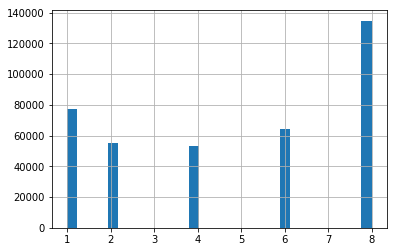

'0.0% de registros nulos'

'Variância: 0.014518555079172032'

count   384829.00
mean         0.16
std          0.12
min          0.01
25%          0.07
50%          0.12
75%          0.20
max          1.00
Name: NU_PROP_VIDA_ESCOLA, dtype: float64

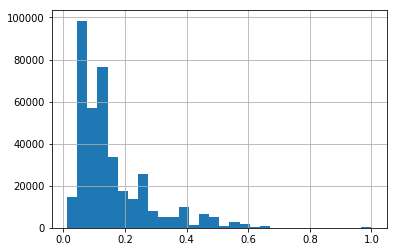

'0.0% de registros nulos'

'Variância: 0.0330175583055192'

count   384829.00
mean         0.38
std          0.18
min          0.01
25%          0.22
50%          0.42
75%          0.50
max          1.14
Name: NU_PROP_VIDA_REDE_PBC, dtype: float64

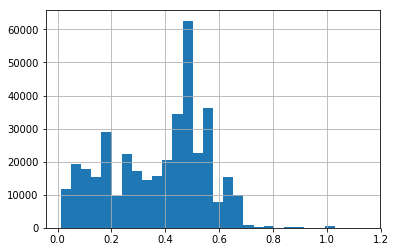

'0.0% de registros nulos'

'Variância: 0.24999973767155298'

qtd   pc
0  192782 0.50
1  192047 0.50

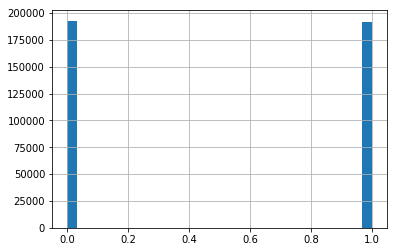

'0.0% de registros nulos'

'Variância: 0.23423374799330918'

qtd   pc
0  240736 0.63
1  144093 0.37

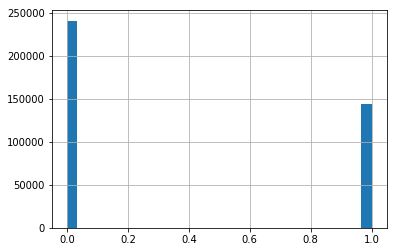

'0.0% de registros nulos'

'Variância: 0.15648232963117673'

qtd   pc
0  310098 0.81
1   74731 0.19

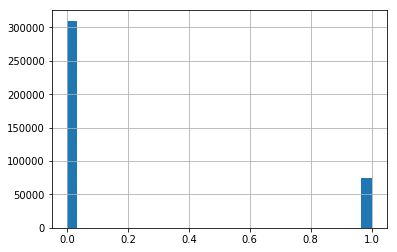

'0.0% de registros nulos'

'Variância: 0.02862137476020972'

qtd   pc
0  373480 0.97
1   11349 0.03

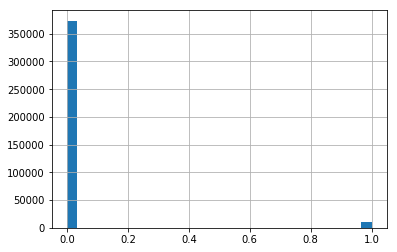

'0.0% de registros nulos'

'Variância: 0.23941082383397025'

qtd   pc
0  232016 0.60
1  152813 0.40

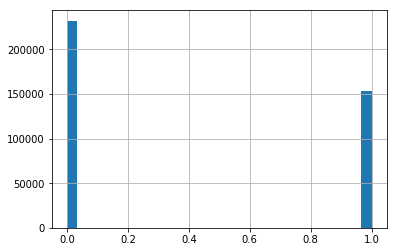

'0.0% de registros nulos'

'Variância: 0.003428661096288008'

qtd   pc
0  383505 1.00
1    1324 0.00

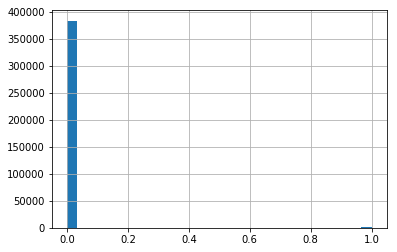

'0.0% de registros nulos'

'Variância: 0.001346835599676077'

qtd   pc
0  384310 1.00
1     519 0.00

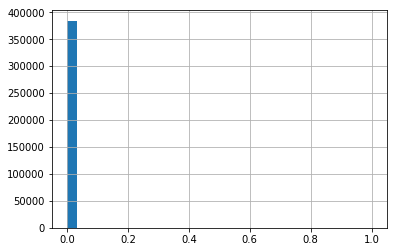

'0.0% de registros nulos'

'Variância: 0.12967457285700862'

qtd   pc
0  325904 0.85
1   58925 0.15

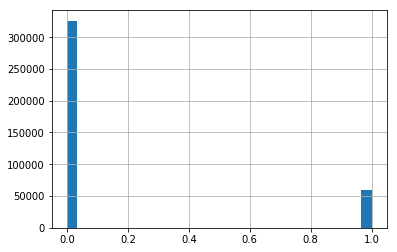

'0.0% de registros nulos'

'Variância: 0.19785228439321406'

qtd   pc
0  280294 0.73
1  104535 0.27

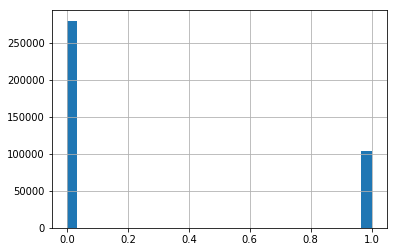

'0.0% de registros nulos'

'Variância: 0.1402137225107786'

qtd   pc
0  319924 0.83
1   64905 0.17

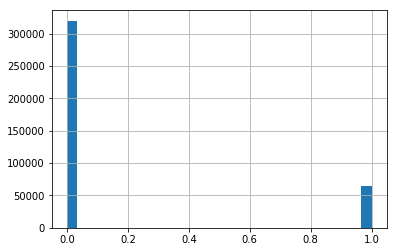

'0.0% de registros nulos'

'Variância: 0.20488586679059484'

qtd   pc
0  274153 0.71
1  110676 0.29

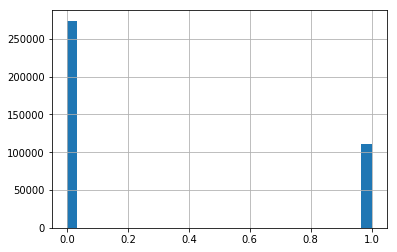

'0.0% de registros nulos'

'Variância: 0.015866615869723523'

qtd   pc
0  378623 0.98
1    6206 0.02

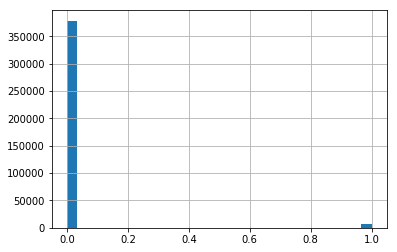

'0.0% de registros nulos'

'Variância: 0.09227694161899876'

qtd   pc
0  345247 0.90
1   39582 0.10

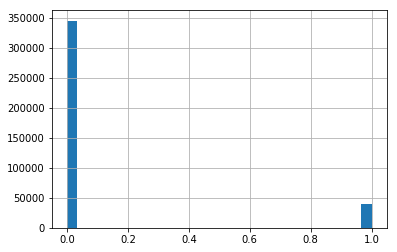

In [23]:
#dropa algumas colunas, indexa e explora
alunos = aln15.drop(cd,axis=1).set_index(['CO_PESSOA_FISICA','ID_TURMA','CO_ENTIDADE','ID_MATRICULA'])
explora_df(alunos)

In [ ]:
#salva o csv com todas as features dos alunos
alunos.to_csv(f'{PATH_DF_CSV}alunos_todas_ft.csv')

In [31]:
#carrega arquivo com todas as features dos alunos
alunos =  ajusta_colunas_int_df_inep( pd.read_csv(f'{PATH_DF_CSV}alunos_todas_ft.csv',index_col=['CO_PESSOA_FISICA','ID_TURMA','CO_ENTIDADE','ID_MATRICULA']))

In [32]:
#inicia o feature selection com a variancia e nulos
f = alunos.copy()
VARIANCIA_MINIMA = 0.05
PC_MAX_MODA = 0.9
PC_MAX_MODA_NU = 0.6
MAXIMO_DE_NULOS  = 0.05
qtd_ttl = f.shape[0]
cd = []
for c in f.columns:
    s = f[c]
    pc_nulos = s.isnull().sum() / qtd_ttl * 100
    try:
        a = f.loc[s == s.mode()[0]].shape[0]
    except:
        a = 0
        pass
    pc_moda = a/qtd_ttl
    if pc_moda > PC_MAX_MODA or (c.startswith('NU') and pc_moda > PC_MAX_MODA_NU) or pc_nulos > MAXIMO_DE_NULOS:
        #display(f'{c} - {pc_moda}')
        cd.append(c)
    
f.drop(cd,axis=1,inplace=True)
display(' '.join(f.columns))
display(f'Restaram {len(f.columns)/len(alunos.columns)} das colunas')
display(f.var())
display(f.head())

'NU_IDADE_REFERENCIA IN_IDD_CORRETA IN_NATURAL_DF IN_RESIDE_DF NU_ANOS_ESCOLA NU_ANOS_REDE_PBC_DF NU_PROP_VIDA_ESCOLA NU_PROP_VIDA_REDE_PBC IN_MULHER IN_TP_COR_RACA_0 IN_TP_COR_RACA_1 IN_TP_COR_RACA_3 IN_TP_ETAPA_AGREGADA_0 IN_TP_ETAPA_AGREGADA_3 IN_TP_ETAPA_AGREGADA_4 IN_TP_ETAPA_AGREGADA_INFANTIL IN_TP_ETAPA_AGREGADA_EJA'

'Restaram 0.24285714285714285 das colunas'

NU_IDADE_REFERENCIA             0.00
IN_IDD_CORRETA                  0.00
IN_NATURAL_DF                   0.00
IN_RESIDE_DF                    0.00
NU_ANOS_ESCOLA                  0.00
NU_ANOS_REDE_PBC_DF             0.00
NU_PROP_VIDA_ESCOLA             0.00
NU_PROP_VIDA_REDE_PBC           0.00
IN_MULHER                       0.00
IN_TP_COR_RACA_0                0.00
IN_TP_COR_RACA_1                0.00
IN_TP_COR_RACA_3                0.00
IN_TP_ETAPA_AGREGADA_0          0.00
IN_TP_ETAPA_AGREGADA_3          0.00
IN_TP_ETAPA_AGREGADA_4          0.00
IN_TP_ETAPA_AGREGADA_INFANTIL   0.00
IN_TP_ETAPA_AGREGADA_EJA        0.00
dtype: float16

NU_IDADE_REFERENCIA  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                        
110174229150     10026    53002580    105874465                      17   
119831893165     10026    53002580    105876922                      16   
113354964080     10026    53002580    105875659                      17   
114722786312     10026    53002580    105876291                      16   
113193719578     10026    53002580    106307563                      17   

                                                    IN_IDD_CORRETA  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                   
110174229150     10026    53002580    105874465                  1   
119831893165     10026    53002580    105876922                  1   
113354964080     10026    53002580    105875659                  1   
114722786312     10026    53002580    105876291                  1   
113193719578     10026    53002580    106307563                  1   

                                                    IN_NATURAL_DF  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                  
110174229150     10026    53002580    105874465                 1   
119831893165     10026    53002580    105876922                 1   
113354964080     10026    53002580    105875659                 1   
114722786312     10026    53002580    105876291                 1   
113193719578     10026    53002580    106307563                 1   

                                                    IN_RESIDE_DF  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                 
110174229150     10026    53002580    105874465                1   
119831893165     10026    53002580    105876922                1   
113354964080     10026    53002580    105875659                1   
114722786312     10026    53002580    105876291                1   
113193719578     10026    53002580    106307563                1   

                                                    NU_ANOS_ESCOLA  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                   
110174229150     10026    53002580    105874465                  1   
119831893165     10026    53002580    105876922                  1   
113354964080     10026    53002580    105875659                  2   
114722786312     10026    53002580    105876291                  1   
113193719578     10026    53002580    106307563                  2   

                                                    NU_ANOS_REDE_PBC_DF  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                        
110174229150     10026    53002580    105874465                       1   
119831893165     10026    53002580    105876922                       6   
113354964080     10026    53002580    105875659                       8   
114722786312     10026    53002580    105876291                       8   
113193719578     10026    53002580    106307563                       6   

                                                    NU_PROP_VIDA_ESCOLA  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                        
110174229150     10026    53002580    105874465                    0.06   
119831893165     10026    53002580    105876922                    0.06   
113354964080     10026    53002580    105875659                    0.12   
114722786312     10026    53002580    105876291                    0.06   
113193719578     10026    53002580    106307563                    0.12   

                                                    NU_PROP_VIDA_REDE_PBC  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                          
110174229150     10026    53002580    105874465                      0.06   
119831893165     10026    53002580    105876922                      0.38   
113354964080     10026    53002580    105875659                      0.47   
114722786312     10026    53002580    105876291                      0.50   
113193719578     10026    53002580    106307563                      

'0.0% de registros nulos'

'Variância: 47.91818505759569'

count   384829.00
mean        13.42
std          6.92
min          0.00
25%          9.00
50%         13.00
75%         16.00
max         83.00
Name: NU_IDADE_REFERENCIA, dtype: float64

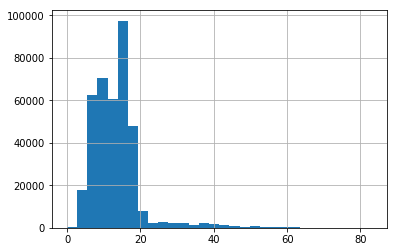

'0.0% de registros nulos'

'Variância: 0.23609826663841255'

qtd   pc
1  237789 0.62
0  147040 0.38

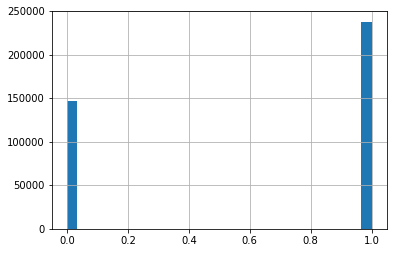

'0.0% de registros nulos'

'Variância: 0.15566044305294252'

qtd   pc
1  310614 0.81
0   74215 0.19

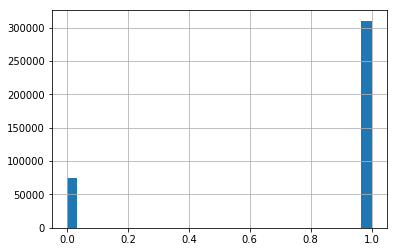

'0.0% de registros nulos'

'Variância: 0.15076497141508427'

qtd   pc
1  313642 0.82
0   71187 0.18

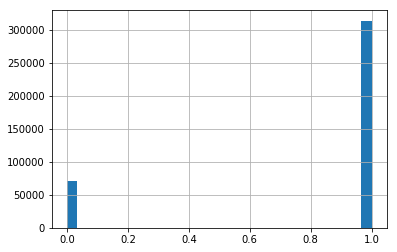

'0.0% de registros nulos'

'Variância: 2.0637200133233353'

qtd   pc
1  230051 0.60
2   99934 0.26
4   35533 0.09
6   13038 0.03
8    6273 0.02

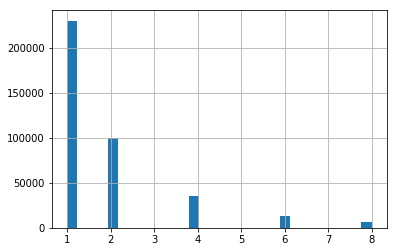

'0.0% de registros nulos'

'Variância: 7.936473134573738'

qtd   pc
8  134765 0.35
1   77263 0.20
6   64278 0.17
2   55180 0.14
4   53343 0.14

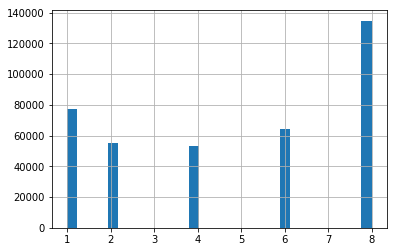

'0.0% de registros nulos'

'Variância: 0.014518555079172032'

count   384829.00
mean         0.16
std          0.12
min          0.01
25%          0.07
50%          0.12
75%          0.20
max          1.00
Name: NU_PROP_VIDA_ESCOLA, dtype: float64

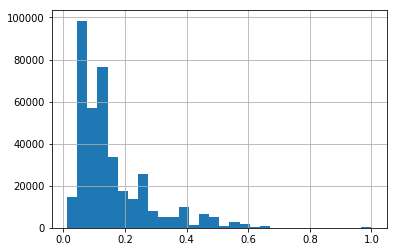

'0.0% de registros nulos'

'Variância: 0.0330175583055192'

count   384829.00
mean         0.38
std          0.18
min          0.01
25%          0.22
50%          0.42
75%          0.50
max          1.14
Name: NU_PROP_VIDA_REDE_PBC, dtype: float64

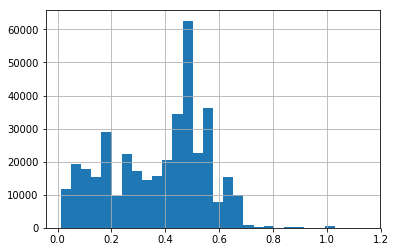

'0.0% de registros nulos'

'Variância: 0.24999973767155298'

qtd   pc
0  192782 0.50
1  192047 0.50

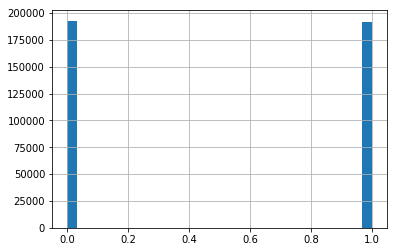

'0.0% de registros nulos'

'Variância: 0.23423374799330918'

qtd   pc
0  240736 0.63
1  144093 0.37

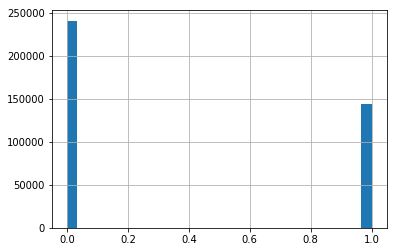

'0.0% de registros nulos'

'Variância: 0.15648232963117673'

qtd   pc
0  310098 0.81
1   74731 0.19

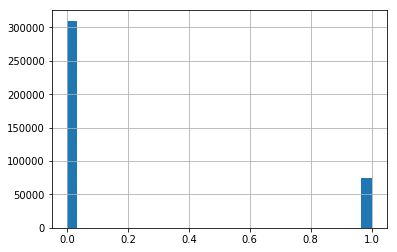

'0.0% de registros nulos'

'Variância: 0.23941082383397025'

qtd   pc
0  232016 0.60
1  152813 0.40

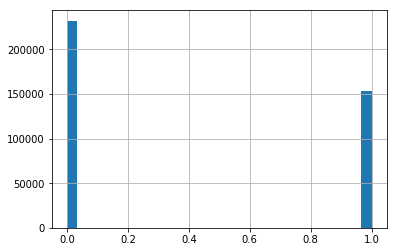

'0.0% de registros nulos'

'Variância: 0.12967457285700862'

qtd   pc
0  325904 0.85
1   58925 0.15

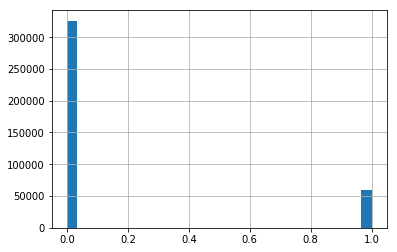

'0.0% de registros nulos'

'Variância: 0.19785228439321406'

qtd   pc
0  280294 0.73
1  104535 0.27

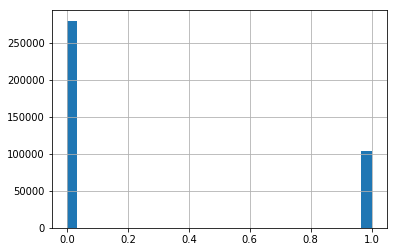

'0.0% de registros nulos'

'Variância: 0.1402137225107786'

qtd   pc
0  319924 0.83
1   64905 0.17

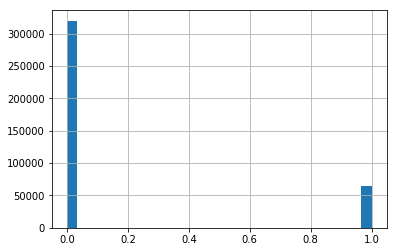

'0.0% de registros nulos'

'Variância: 0.20488586679059484'

qtd   pc
0  274153 0.71
1  110676 0.29

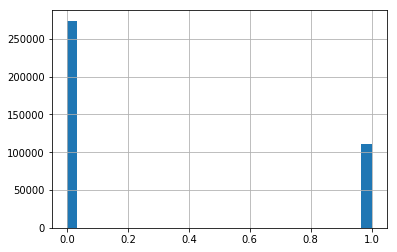

'0.0% de registros nulos'

'Variância: 0.09227694161899876'

qtd   pc
0  345247 0.90
1   39582 0.10

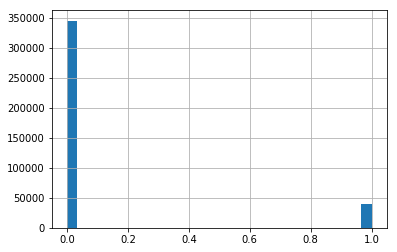

In [26]:
explora_df(f)

In [33]:
fkma = f.copy()

In [28]:
v = []
for i in range(101):
    km = kmeans_professores(fkma,10,i)
    a = pd.Series(km.labels_).value_counts()
    v.append(max([min(a),1])/max([max(a),10]))
    if i%10 == 0:
        display(f'Random state {np.argmax(v)} traz o conjunto mais homogeneo, com de dif de {v[np.argmax(v)]}.')    



/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


'Random state 0 traz o conjunto mais homogeneo, com de dif de 0.3527693906845518.'

'Random state 8 traz o conjunto mais homogeneo, com de dif de 0.49708852073326143.'

'Random state 8 traz o conjunto mais homogeneo, com de dif de 0.49708852073326143.'

'Random state 8 traz o conjunto mais homogeneo, com de dif de 0.49708852073326143.'

'Random state 8 traz o conjunto mais homogeneo, com de dif de 0.49708852073326143.'

'Random state 48 traz o conjunto mais homogeneo, com de dif de 0.5315686274509804.'

'Random state 48 traz o conjunto mais homogeneo, com de dif de 0.5315686274509804.'

'Random state 48 traz o conjunto mais homogeneo, com de dif de 0.5315686274509804.'

'Random state 48 traz o conjunto mais homogeneo, com de dif de 0.5315686274509804.'

'Random state 48 traz o conjunto mais homogeneo, com de dif de 0.5315686274509804.'

'Random state 48 traz o conjunto mais homogeneo, com de dif de 0.5315686274509804.'

In [35]:
km = kmeans_professores(fkma,10,48)
f['ROTULO_ALUNO'] = km.labels_
pd.DataFrame(f.ROTULO_ALUNO.value_counts())

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


ROTULO_ALUNO
6         51000
1         49917
8         44011
0         41214
5         40364
9         35864
4         33712
3         31946
2         29691
7         27110

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Base de TREINO
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     30919
          1       1.00      1.00      1.00     37383
          2       1.00      1.00      1.00     22321
          3       1.00      1.00      1.00     23971
          4       1.00      1.00      1.00     25301
          5       1.00      1.00      1.00     30174
          6       1.00      1.00      1.00     38277
          7       1.00      1.00      1.00     20337
          8       1.00      1.00      1.00     33077
          9       1.00      1.00      1.00     26861

avg / total       1.00      1.00      1.00    288621

Base de TESTE
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     10295
          1       1.00      1.00      1.00     12534
          2       1.00      1.00      1.00      7370
          3       1.00      1.00      1.00      7975
          4       1.00      1.00      1.00      8411
          5  

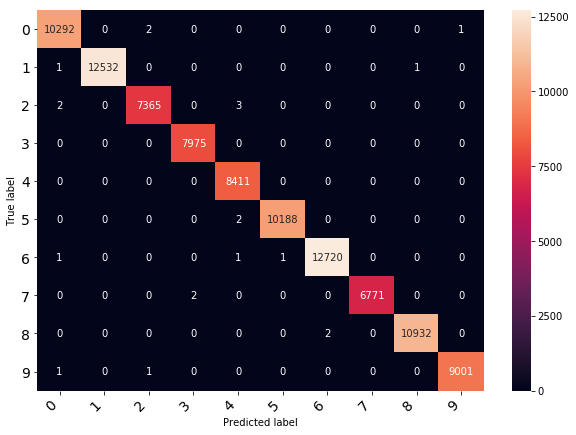

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature IN_TP_COR_RACA_3 (0.160461)
2. feature IN_TP_COR_RACA_1 (0.128758)
3. feature IN_TP_ETAPA_AGREGADA_3 (0.124509)
4. feature IN_TP_COR_RACA_0 (0.110360)
5. feature IN_TP_ETAPA_AGREGADA_INFANTIL (0.091813)
6. feature NU_IDADE_REFERENCIA (0.086906)
7. feature IN_TP_ETAPA_AGREGADA_0 (0.082699)
8. feature IN_TP_ETAPA_AGREGADA_4 (0.080482)
9. feature IN_IDD_CORRETA (0.074453)
10. feature IN_TP_ETAPA_AGREGADA_EJA (0.032930)
11. feature NU_PROP_VIDA_REDE_PBC (0.010656)
12. feature NU_PROP_VIDA_ESCOLA (0.008618)
13. feature IN_MULHER (0.002950)
14. feature NU_ANOS_REDE_PBC_DF (0.001640)
15. feature NU_ANOS_ESCOLA (0.001056)
16. feature IN_NATURAL_DF (0.000942)
17. feature IN_RESIDE_DF (0.000767)


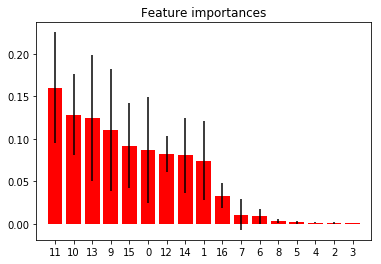

In [36]:
ft = processa_tudo(f,tg='ROTULO_ALUNO')

In [37]:
QTD_FEATURES_IMPORTANTES = 11
cols_imp = ft[0][:QTD_FEATURES_IMPORTANTES] + ['ROTULO_ALUNO']

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Base de TREINO
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     30919
          1       1.00      1.00      1.00     37383
          2       1.00      1.00      1.00     22321
          3       1.00      1.00      1.00     23971
          4       0.97      0.98      0.97     25301
          5       1.00      1.00      1.00     30174
          6       1.00      1.00      1.00     38277
          7       0.97      0.97      0.97     20337
          8       1.00      1.00      1.00     33077
          9       1.00      1.00      1.00     26861

avg / total       0.99      0.99      0.99    288621

Base de TESTE
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     10295
          1       1.00      1.00      1.00     12534
          2       1.00      1.00      1.00      7370
          3       1.00      1.00      1.00      7975
          4       0.97      0.97      0.97      8411
          5  

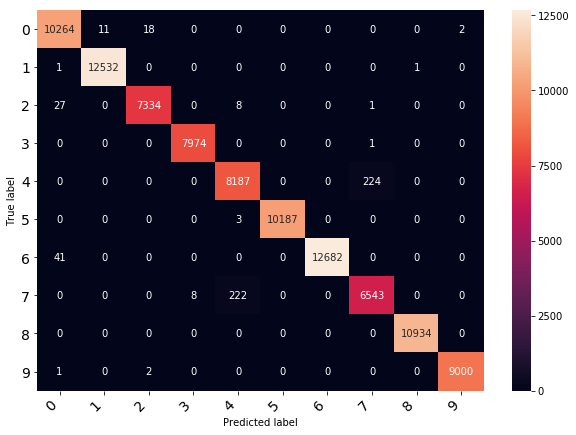

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature IN_TP_COR_RACA_3 (0.190378)
2. feature IN_TP_COR_RACA_1 (0.140902)
3. feature IN_TP_ETAPA_AGREGADA_3 (0.126522)
4. feature IN_TP_ETAPA_AGREGADA_4 (0.111776)
5. feature IN_TP_ETAPA_AGREGADA_INFANTIL (0.107766)
6. feature IN_TP_COR_RACA_0 (0.072565)
7. feature IN_TP_ETAPA_AGREGADA_0 (0.066244)
8. feature NU_IDADE_REFERENCIA (0.061299)
9. feature IN_IDD_CORRETA (0.057451)
10. feature IN_TP_ETAPA_AGREGADA_EJA (0.052806)
11. feature NU_PROP_VIDA_REDE_PBC (0.012292)


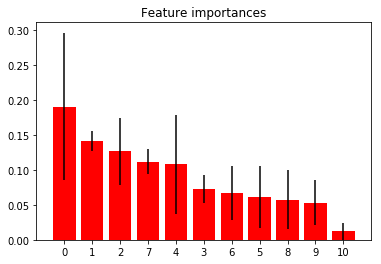

In [38]:
processa_tudo(f[cols_imp],tg='ROTULO_ALUNO');

In [39]:
f = f[cols_imp]

ROTULO_ALUNO
0   0.99
1   1.00
2   0.00
3   0.00
4   0.00
5   0.00
6   0.35
7   0.00
8   1.00
9   0.00
Name: IN_TP_COR_RACA_3, dtype: float64

152813

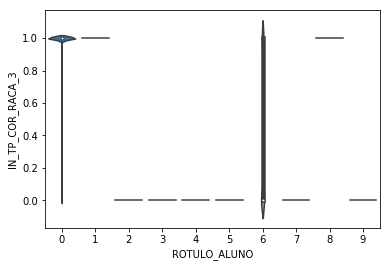

ROTULO_ALUNO
0   0.00
1   0.00
2   0.13
3   1.00
4   0.00
5   0.00
6   0.00
7   0.94
8   0.00
9   0.37
Name: IN_TP_COR_RACA_1, dtype: float64

74731

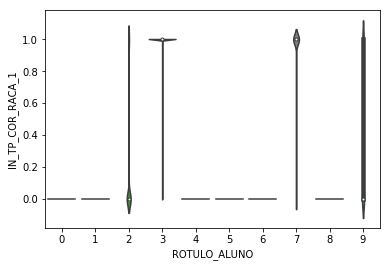

ROTULO_ALUNO
0   0.00
1   0.00
2   0.00
3   0.64
4   0.00
5   1.00
6   0.00
7   0.00
8   1.00
9   0.00
Name: IN_TP_ETAPA_AGREGADA_3, dtype: float64

104535

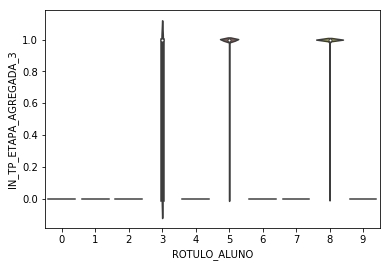

ROTULO_ALUNO
0   0.00
1   0.00
2   0.81
3   0.00
4   0.94
5   0.91
6   0.61
7   0.00
8   0.00
9   0.57
Name: IN_TP_COR_RACA_0, dtype: float64

144093

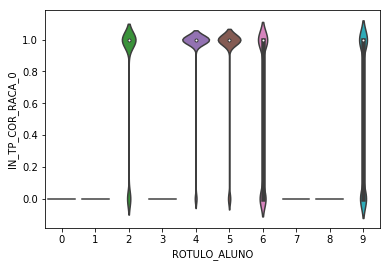

ROTULO_ALUNO
0   0.00
1   1.00
2   0.00
3   0.00
4   1.00
5   0.00
6   0.00
7   1.00
8   0.00
9   0.00
Name: IN_TP_ETAPA_AGREGADA_INFANTIL, dtype: float64

110676

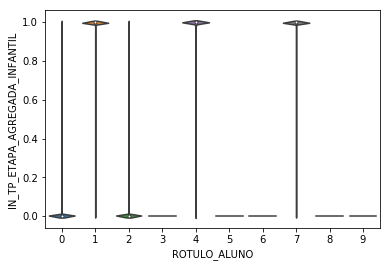

count  mean   std   min   25%   50%   75%   max
ROTULO_ALUNO                                                   
0            41214.00 17.24  9.58  2.00 11.00 15.00 19.00 81.00
1            49917.00  7.81  2.21  0.00  6.00  8.00  9.00 50.00
2            29691.00 25.55 11.16 11.00 18.00 20.00 31.00 83.00
3            31946.00 14.33  3.57  9.00 12.00 14.00 16.00 71.00
4            33712.00  7.77  2.59  0.00  6.00  8.00  9.00 56.00
5            40364.00 13.37  1.72  9.00 12.00 13.00 14.00 50.00
6            51000.00 16.36  1.70 11.00 15.00 16.00 17.00 64.00
7            27110.00  7.66  2.25  0.00  6.00  8.00  9.00 44.00
8            44011.00 12.92  1.57  8.00 12.00 13.00 14.00 53.00
9            35864.00 12.19  3.80  0.00 10.00 12.00 15.00 62.00

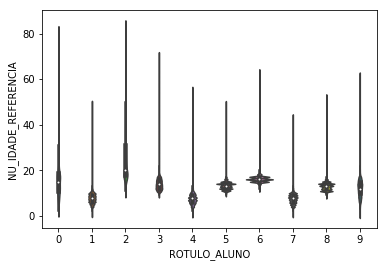

ROTULO_ALUNO
0   0.56
1   0.00
2   0.00
3   0.00
4   0.00
5   0.00
6   0.00
7   0.00
8   0.00
9   1.00
Name: IN_TP_ETAPA_AGREGADA_0, dtype: float64

58925

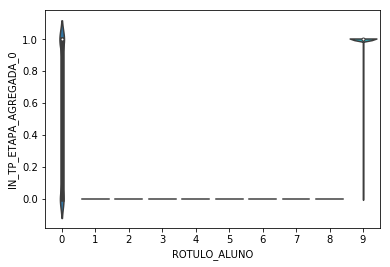

ROTULO_ALUNO
0   0.08
1   0.00
2   0.00
3   0.33
4   0.00
5   0.00
6   1.00
7   0.00
8   0.00
9   0.00
Name: IN_TP_ETAPA_AGREGADA_4, dtype: float64

64905

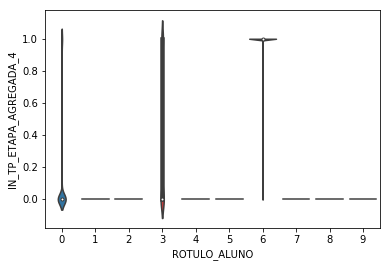

ROTULO_ALUNO
0   0.00
1   0.93
2   0.00
3   0.83
4   0.92
5   0.71
6   0.88
7   0.95
8   0.79
9   0.00
Name: IN_IDD_CORRETA, dtype: float64

237789

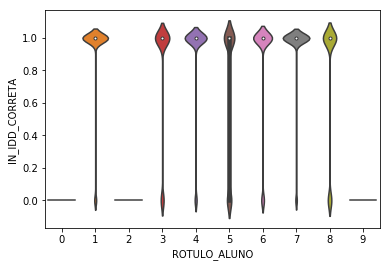

ROTULO_ALUNO
0   0.30
1   0.00
2   0.91
3   0.00
4   0.00
5   0.00
6   0.00
7   0.00
8   0.00
9   0.00
Name: IN_TP_ETAPA_AGREGADA_EJA, dtype: float64

39582

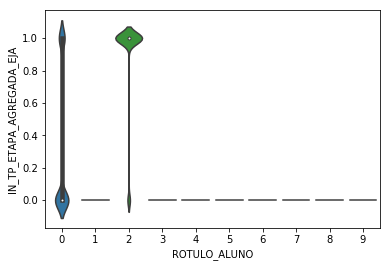

count  mean  std  min  25%  50%  75%  max
ROTULO_ALUNO                                             
0            41214.00  0.35 0.19 0.01 0.17 0.40 0.50 1.00
1            49917.00  0.31 0.16 0.02 0.20 0.25 0.44 1.00
2            29691.00  0.26 0.18 0.01 0.05 0.32 0.42 0.73
3            31946.00  0.43 0.18 0.01 0.35 0.50 0.55 0.80
4            33712.00  0.29 0.15 0.02 0.17 0.25 0.40 1.14
5            40364.00  0.46 0.17 0.02 0.38 0.50 0.57 0.89
6            51000.00  0.41 0.15 0.02 0.35 0.47 0.50 0.62
7            27110.00  0.32 0.16 0.03 0.20 0.29 0.44 1.00
8            44011.00  0.46 0.17 0.02 0.36 0.50 0.57 0.80
9            35864.00  0.42 0.17 0.02 0.29 0.46 0.55 1.00

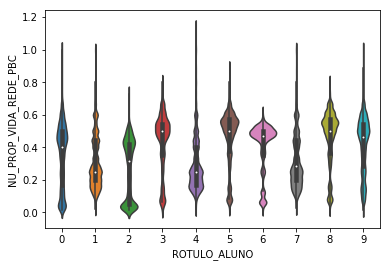

In [40]:
import seaborn as sns
for c in f.columns[:-1]:
    display(HTML(f'<h2>{c}</h2>'))
    if f[c].dtype == bool:
        f[c] = f[c].astype(np.int8)
    sns.violinplot(y=c,x='ROTULO_ALUNO',data=f)
    if c.startswith('NU'):
        display(f.groupby('ROTULO_ALUNO')[c].describe())
    else:
        display(f.groupby('ROTULO_ALUNO')[c].mean())
        display(f[c].sum())
        
    plt.show()

In [41]:
f.to_csv(f'{PATH_DF_CSV}alunos_features.csv')

<ul>
<li><strong>Classe 0 - 41.214 alunos</strong>
<ul>
<li>Cor parda</li>
<li>Mediana em 15 anos, maior variabilidade.</li>
<li>56% em s&eacute;rie n&atilde;o informada</li>
<li>8% no Ensino m&eacute;dio</li>
<li>30% est&aacute; no EJA</li>
<li>N&atilde;o est&aacute; na idade correta</li>
</ul>
</li>
<li><strong>Classe 1 - 49.917 alunos</strong>
<ul>
<li>2&ordm; maior grupo</li>
<li>Cor parda</li>
<li>Ensino infantil / primeiros anos do fundamental (antigo prim&aacute;rio)</li>
<li>Alunos mais jovens (mediana em 8 anos)</li>
<li>93% est&aacute; na idade correta</li>
</ul>
</li>
<li><strong>Classe 2 - 26.691 alunos</strong>
<ul>
<li>2&ordf; menor grupo</li>
<li>13% Cor branca</li>
<li>81% cor n&atilde;o declarada</li>
<li>Grupo mais velho, mediana em 20 anos</li>
<li>N&atilde;o est&aacute; na idade correta</li>
<li>91% Est&aacute; no EJA</li>
</ul>
</li>
<li><strong>Classe 3 - 31.946 alunos</strong>
<ul>
<li>3&ordm; menor grupo</li>
<li>Cor branca</li>
<li>64% nos anos finais do Ensino Fundamental (antigo gin&aacute;sio)</li>
<li>8% no Ensino m&eacute;dio</li>
<li>Mediana em 14 anos</li>
<li>83% est&aacute; na idade correta</li>
<li></li>
</ul>
</li>
<li><strong>Classe 4 - 33.712 alunos</strong>
<ul>
<li>94% cor n&atilde;o declarada</li>
<li>Ensino infantil / primeiros anos do fundamental (antigo prim&aacute;rio)</li>
<li>Alunos mais jovens (mediana em 8 anos)</li>
<li>92% est&aacute; na idade correta</li>
<li></li>
</ul>
</li>
<li><strong>Classe 5 - 40.364 alunos</strong>
<ul>
<li>91% cor n&atilde;o declarada&nbsp;</li>
<li>nos anos finais do Ensino Fundamental (antigo gin&aacute;sio)</li>
<li>Mediana em 13 anos</li>
<li>71% est&aacute; na idade correta</li>
<li>Sempre estudou em escola p&uacute;blica</li>
<li></li>
</ul>
</li>
<li><strong>Classe 6 - 51.000 alunos</strong>
<ul>
<li>1&ordm; maior grupo</li>
<li>35% Cor parda</li>
<li>61% cor n&atilde;o declarada</li>
<li>Segundo grupo mais velho, mediana em 16 anos</li>
<li>Ensino m&eacute;dio</li>
<li>88% est&aacute; na idade correta</li>
<li></li>
</ul>
</li>
<li><strong>Classe 7 - 27.110 alunos</strong>
<ul>
<li>1&ordf; menor grupo</li>
<li>Cor branca</li>
<li>Ensino infantil / primeiros anos do fundamental (antigo prim&aacute;rio)</li>
<li>Alunos mais jovens (mediana em 8 anos) e menor m&eacute;dia (7.66)</li>
<li>95% est&aacute; na idade correta</li>
<li></li>
<li></li>
</ul>
</li>
<li><strong>Classe 8 - 44.011 alunos</strong>
<ul>
<li>3&ordm; maior grupo</li>
<li>Cor parda</li>
<li>nos anos finais do Ensino Fundamental (antigo gin&aacute;sio)</li>
<li>Mediana em 13 anos</li>
<li>79% est&aacute; na idade correta</li>
<li>Sempre estudou em escola p&uacute;blica</li>
</ul>
</li>
<li><strong>Classe 9 - 35.864 alunos</strong>
<ul>
<li>37% Cor branca </li>
<li>57% cor n&atilde;o declarada</li>
<li>Mediana em 12 anos</li>
<li>S&eacute;rie n&atilde;o informada</li>
<li>N&atilde;o est&aacute; na idade correta</li>
</ul>
</li>
</ul>

In [5]:
alunos = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}alunos_features.csv',index_col='CO_PESSOA_FISICA'))
alunos.head()

ID_TURMA  CO_ENTIDADE  ID_MATRICULA  IN_TP_COR_RACA_3  \
CO_PESSOA_FISICA                                                          
110174229150         10026     53002580     105874465                 0   
119831893165         10026     53002580     105876922                 1   
113354964080         10026     53002580     105875659                 0   
114722786312         10026     53002580     105876291                 0   
113193719578         10026     53002580     106307563                 0   

                  IN_TP_COR_RACA_1  IN_TP_ETAPA_AGREGADA_3  IN_TP_COR_RACA_0  \
CO_PESSOA_FISICA                                                               
110174229150                     0                       0                 1   
119831893165                     0                       0                 0   
113354964080                     0                       0                 1   
114722786312                     1                       0                 0   
113193719578                     0                       0                 1   

                  IN_TP_ETAPA_AGREGADA_INFANTIL  NU_IDADE_REFERENCIA  \
CO_PESSOA_FISICA                                                       
110174229150                                  0                   17   
119831893165                                  0                   16   
113354964080                                  0                   17   
114722786312                                  0                   16   
113193719578                                  0                   17   

                  IN_TP_ETAPA_AGREGADA_0  IN_TP_ETAPA_AGREGADA_4  \
CO_PESSOA_FISICA                                                   
110174229150                           0                       1   
119831893165                           0                       1   
113354964080                           0                       1   
114722786312                           0                       1   
113193719578                           0                       1   

                  IN_IDD_CORRETA  IN_TP_ETAPA_AGREGADA_EJA  \
CO_PESSOA_FISICA                                             
110174229150                   1                         0   
119831893165                   1                         0   
113354964080                   1                         0   
114722786312                   1                         0   
113193719578                   1                         0   

                  NU_PROP_VIDA_REDE_PBC  ROTULO_ALUNO  
CO_PESSOA_FISICA                                       
110174229150                       0.06             6  
119831893165                       0.38             6  
113354964080                       0.47             6  
114722786312                       0.50             3  
113193719578                       0.35             6

<table><tr><td><img src='img/school_room.jpeg'/></td><td><h1>Turmas</h1></td></tr></table>

In [9]:
t15 = monta_df_docente(f'{ARQ_PATH}2015/TURMAS.CSV')
t15 = t15.loc[t15.CO_ENTIDADE.isin(features_escolas.index.values)]
display(t15.shape)
t15.head()

(15877, 88)

NU_ANO_CENSO  ID_TURMA        NO_TURMA  TX_HR_INICIAL  TX_MI_INICIAL  \
9           2015     17261           2ªEMI          13.00           0.00   
29          2015    127976  2º ANO - H - V          12.00          45.00   
30          2015    128264  2º ANO - I - V          12.00          45.00   
31          2015    128649  3º ANO - A - V          12.00          45.00   
41          2015      6783       1PER A EI           7.00          30.00   

    NU_DURACAO_TURMA  NU_MATRICULAS  TP_MEDIACAO_DIDATICO_PEDAGO  \
9             300.00             37                            1   
29            300.00             19                            1   
30            300.00             20                            1   
31            300.00             12                            1   
41            300.00             24                            1   

    IN_ESPECIAL_EXCLUSIVA  IN_REGULAR          ...           IN_CONVENIADA_PP  \
9                    0.00        1.00          ...                        nan   
29                   0.00        1.00          ...                        nan   
30                   0.00        1.00          ...                        nan   
31                   0.00        1.00          ...                        nan   
41                   0.00        1.00          ...                        nan   

    TP_CONVENIO_PODER_PUBLICO  IN_MANT_ESCOLA_PRIVADA_EMP  \
9                         nan                         nan   
29                        nan                         nan   
30                        nan                         nan   
31                        nan                         nan   
41                        nan                         nan   

    IN_MANT_ESCOLA_PRIVADA_ONG  IN_MANT_ESCOLA_PRIVADA_SIND  \
9                          nan                          nan   
29                         nan                          nan   
30                         nan                          nan   
31                         nan                          nan   
41                         nan                          nan   

    IN_MANT_ESCOLA_PRIVADA_SIST_S  IN_MANT_ESCOLA_PRIVADA_S_FINS  \
9                             nan                            nan   
29                            nan                            nan   
30                            nan                            nan   
31                            nan                            nan   
41                            nan                            nan   

    TP_REGULAMENTACAO  TP_LOCALIZACAO_DIFERENCIADA  IN_EDUCACAO_INDIGENA  
9                   1                            0                     0  
29                  1                            0                     0  
30                  1                            0                     0  
31                  1                            0                     0  
41                  1                            0                     0  

[5 rows x 88 columns]

In [11]:
t15.columns

Index(['NU_ANO_CENSO', 'ID_TURMA', 'NO_TURMA', 'TX_HR_INICIAL',
       'TX_MI_INICIAL', 'NU_DURACAO_TURMA', 'NU_MATRICULAS',
       'TP_MEDIACAO_DIDATICO_PEDAGO', 'IN_ESPECIAL_EXCLUSIVA', 'IN_REGULAR',
       'IN_EJA', 'IN_PROFISSIONALIZANTE', 'TP_ETAPA_ENSINO',
       'CO_CURSO_EDUC_PROFISSIONAL', 'TP_TIPO_TURMA', 'IN_MAIS_EDUCACAO',
       'NU_DIAS_ATIVIDADE', 'IN_DIA_SEMANA_DOMINGO', 'IN_DIA_SEMANA_SEGUNDA',
       'IN_DIA_SEMANA_TERCA', 'IN_DIA_SEMANA_QUARTA', 'IN_DIA_SEMANA_QUINTA',
       'IN_DIA_SEMANA_SEXTA', 'IN_DIA_SEMANA_SABADO', 'CO_TIPO_ATIVIDADE_1',
       'CO_TIPO_ATIVIDADE_2', 'CO_TIPO_ATIVIDADE_3', 'CO_TIPO_ATIVIDADE_4',
       'CO_TIPO_ATIVIDADE_5', 'CO_TIPO_ATIVIDADE_6', 'IN_BRAILLE',
       'IN_RECURSOS_BAIXA_VISAO', 'IN_PROCESSOS_MENTAIS',
       'IN_ORIENTACAO_MOBILIDADE', 'IN_SINAIS', 'IN_COMUNICACAO_ALT_AUMENT',
       'IN_ENRIQ_CURRICULAR', 'IN_SOROBAN', 'IN_INFORMATICA_ACESSIVEL',
       'IN_PORT_ESCRITA', 'IN_AUTONOMIA_ESCOLAR', 'IN_DISC_QUIMICA',
       'IN_

In [54]:
cols_turma = ['ID_TURMA','TX_HR_INICIAL','NU_DURACAO_TURMA',
              'NU_MATRICULAS','IN_REGULAR','IN_EJA','IN_PROFISSIONALIZANTE',
             'NU_DIAS_ATIVIDADE'] +[col for col in t15.columns if col.startswith('IN_DISC_')]


In [105]:
turmas = t15[cols_turma].copy().set_index('ID_TURMA')
cols_drop = []
#construcao de novas colunas
def monta_turno(hora):
    if hora < 12:
        return 0
    elif hora < 18:
        return 1
    else:
        return 2

turmas['CO_TURNO'] = pd.Categorical(turmas.TX_HR_INICIAL.apply(monta_turno))
turmas = turmas.merge( pd.get_dummies( turmas.CO_TURNO,prefix='IN_TURNO'), right_index=True,left_index=True)
cols_drop.append('TX_HR_INICIAL')
cols_drop.append('CO_TURNO')
turmas['NU_QTD_DISCIPLINAS'] = np.sum(turmas[[col for col in t15.columns if col.startswith('IN_DISC_')]].fillna(0),axis=1) 
cols_drop.extend([col for col in t15.columns if col.startswith('IN_DISC_')])
a = pd.get_dummies(alunos.ROTULO_ALUNO,prefix='ROTULO_ALUNO',dtype=np.int16).\
merge(alunos[['ID_TURMA']],left_index=True,right_index=True).groupby('ID_TURMA').sum()
a['NU_QTD_ALUNOS'] =  np.sum(a,axis=1)
for col in a.columns:
    if col.startswith('ROTULO'):
        a['NU_PROP_ALUNOS_ROTULO_' + col.split('_')[-1]] = a[col]/a['NU_QTD_ALUNOS']
        a.drop(col,inplace=True,axis=1)
turmas = turmas.merge(a,left_index=True,right_index=True)


In [106]:
turmas.drop(cols_drop,axis=1,inplace=True)

In [107]:
f = turmas.copy()
VARIANCIA_MINIMA = 0.05
PC_MAX_MODA = 0.9
PC_MAX_MODA_NU = 0.6
MAXIMO_DE_NULOS  = 0.05
qtd_ttl = f.shape[0]
cd = []
for c in f.columns:
    if not c.startswith('NU_PROP_ALUNOS'):
        s = f[c]
        pc_nulos = s.isnull().sum() / qtd_ttl * 100
        try:
            a = f.loc[s == s.mode()[0]].shape[0]
        except:
            a = 0
            pass
        pc_moda = a/qtd_ttl
        if pc_moda > PC_MAX_MODA or (c.startswith('NU') and pc_moda > PC_MAX_MODA_NU) or pc_nulos > MAXIMO_DE_NULOS:
            #display(f'{c} - {pc_moda}')
            cd.append(c)
    
f.drop(cd,axis=1,inplace=True)
display(' '.join(f.columns))
display(f'Restaram {len(f.columns)/len(turmas.columns)} das colunas')
display(f.var())
display(f.head())

'NU_MATRICULAS IN_TURNO_0 IN_TURNO_1 NU_QTD_DISCIPLINAS NU_QTD_ALUNOS NU_PROP_ALUNOS_ROTULO_0 NU_PROP_ALUNOS_ROTULO_1 NU_PROP_ALUNOS_ROTULO_2 NU_PROP_ALUNOS_ROTULO_3 NU_PROP_ALUNOS_ROTULO_4 NU_PROP_ALUNOS_ROTULO_5 NU_PROP_ALUNOS_ROTULO_6 NU_PROP_ALUNOS_ROTULO_7 NU_PROP_ALUNOS_ROTULO_8 NU_PROP_ALUNOS_ROTULO_9'

'Restaram 0.7142857142857143 das colunas'

NU_MATRICULAS             256.86
IN_TURNO_0                  0.25
IN_TURNO_1                  0.25
NU_QTD_DISCIPLINAS         20.78
NU_QTD_ALUNOS             666.90
NU_PROP_ALUNOS_ROTULO_0     0.02
NU_PROP_ALUNOS_ROTULO_1     0.06
NU_PROP_ALUNOS_ROTULO_2     0.03
NU_PROP_ALUNOS_ROTULO_3     0.01
NU_PROP_ALUNOS_ROTULO_4     0.05
NU_PROP_ALUNOS_ROTULO_5     0.03
NU_PROP_ALUNOS_ROTULO_6     0.05
NU_PROP_ALUNOS_ROTULO_7     0.02
NU_PROP_ALUNOS_ROTULO_8     0.03
NU_PROP_ALUNOS_ROTULO_9     0.03
dtype: float64

NU_MATRICULAS  IN_TURNO_0  IN_TURNO_1  NU_QTD_DISCIPLINAS  \
ID_TURMA                                                              
17261                37           0           1               15.00   
127976               19           0           1                7.00   
128264               20           0           1                7.00   
128649               12           0           1                7.00   
6783                 24           1           0                0.00   

          NU_QTD_ALUNOS  NU_PROP_ALUNOS_ROTULO_0  NU_PROP_ALUNOS_ROTULO_1  \
ID_TURMA                                                                    
17261                40                     0.05                     0.00   
127976               19                     0.00                     0.32   
128264               20                     0.00                     0.20   
128649               13                     0.00                     0.23   
6783                 24                     0.00                     0.42   

          NU_PROP_ALUNOS_ROTULO_2  NU_PROP_ALUNOS_ROTULO_3  \
ID_TURMA                                                     
17261                        0.00                     0.12   
127976                       0.00                     0.00   
128264                       0.00                     0.00   
128649                       0.00                     0.00   
6783                         0.00                     0.00   

          NU_PROP_ALUNOS_ROTULO_4  NU_PROP_ALUNOS_ROTULO_5  \
ID_TURMA                                                     
17261                        0.00                     0.00   
127976                       0.68                     0.00   
128264                       0.60                     0.00   
128649                       0.46                     0.00   
6783                         0.29                     0.00   

          NU_PROP_ALUNOS_ROTULO_6  NU_PROP_ALUNOS_ROTULO_7  \
ID_TURMA                                                     
17261                        0.78                     0.00   
127976                       0.00                     0.00   
128264                       0.00                     0.20   
128649                       0.00                     0.23   
6783                         0.00                     0.29   

          NU_PROP_ALUNOS_ROTULO_8  NU_PROP_ALUNOS_ROTULO_9  
ID_TURMA                                                    
17261                        0.00                     0.05  
127976                       0.00                     0.00  
128264                       0.00                     0.00  
128649                       0.00                     0.08  
6783                         0.00                     0.00

In [108]:
plota_matriz_heatmap(f.corr())

In [109]:
f.to_csv(f'{PATH_DF_CSV}turmas_modelagem.csv')

In [6]:
turmas = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}turmas_modelagem.csv',index_col='ID_TURMA'))
turmas.head()

NU_MATRICULAS  IN_TURNO_0  IN_TURNO_1  NU_QTD_DISCIPLINAS  \
ID_TURMA                                                              
17261                37           0           1               15.00   
127976               19           0           1                7.00   
128264               20           0           1                7.00   
128649               12           0           1                7.00   
6783                 24           1           0                0.00   

          NU_QTD_ALUNOS  NU_PROP_ALUNOS_ROTULO_0  NU_PROP_ALUNOS_ROTULO_1  \
ID_TURMA                                                                    
17261                40                     0.05                     0.00   
127976               19                     0.00                     0.32   
128264               20                     0.00                     0.20   
128649               13                     0.00                     0.23   
6783                 24                     0.00                     0.42   

          NU_PROP_ALUNOS_ROTULO_2  NU_PROP_ALUNOS_ROTULO_3  \
ID_TURMA                                                     
17261                        0.00                     0.12   
127976                       0.00                     0.00   
128264                       0.00                     0.00   
128649                       0.00                     0.00   
6783                         0.00                     0.00   

          NU_PROP_ALUNOS_ROTULO_4  NU_PROP_ALUNOS_ROTULO_5  \
ID_TURMA                                                     
17261                        0.00                     0.00   
127976                       0.68                     0.00   
128264                       0.60                     0.00   
128649                       0.46                     0.00   
6783                         0.29                     0.00   

          NU_PROP_ALUNOS_ROTULO_6  NU_PROP_ALUNOS_ROTULO_7  \
ID_TURMA                                                     
17261                        0.77                     0.00   
127976                       0.00                     0.00   
128264                       0.00                     0.20   
128649                       0.00                     0.23   
6783                         0.00                     0.29   

          NU_PROP_ALUNOS_ROTULO_8  NU_PROP_ALUNOS_ROTULO_9  
ID_TURMA                                                    
17261                        0.00                     0.05  
127976                       0.00                     0.00  
128264                       0.00                     0.00  
128649                       0.00                     0.08  
6783                         0.00                     0.00

# Juncao das tabelas e target

In [36]:
#recarrega bases
dfs = {a : ajusta_colunas_int_df_inep(pd.read_csv(f'{ARQ_PATH}DOCENTES_FILTRADOS_{a}.csv',low_memory=False)) for a in tqdm(anos_psq)}
prof = pd.read_csv(f'{PATH_DF_CSV}prof_feature_mod.csv',index_col='CO_PESSOA_FISICA')
escolas = ajusta_colunas_int_df_inep( pd.read_csv(f'{PATH_DF_CSV}features_escolas_modelagem.csv',index_col='CO_ENTIDADE'))
alunos = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}alunos_features.csv',index_col='CO_PESSOA_FISICA'))
turmas = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}turmas_modelagem.csv',index_col='ID_TURMA'))


100%|██████████| 7/7 [00:16<00:00,  2.34s/it]


In [37]:
#professores e turmas
pet15 = dfs[2015][['CO_PESSOA_FISICA','ID_TURMA','CO_ENTIDADE']]
a = pet15.merge(turmas,left_on='ID_TURMA',right_index=True).groupby(['CO_PESSOA_FISICA','CO_ENTIDADE'])


In [38]:
somas = a[['IN_TURNO_0','IN_TURNO_1']].sum()
medias = a[['NU_QTD_DISCIPLINAS','NU_QTD_ALUNOS'] + 
           [col for col in turmas.columns if col.startswith('NU_PROP_ALUNOS') ]  
          ].mean()


In [39]:
pe15 = pet15[['CO_PESSOA_FISICA','CO_ENTIDADE']].drop_duplicates()\
.set_index(['CO_PESSOA_FISICA','CO_ENTIDADE'])
for c in somas.columns:
    pe15['NU_QTD_TURMAS_' + c] = somas[c]
for c in medias.columns:
    pe15['NU_MEDIA_TURMAS_' + c] = medias[c]
pe15['NU_QTD_TURMAS_PROF_ESCOLA'] = a.ID_TURMA.nunique()

In [40]:
#adiciona classe dos professores
pe15.reset_index(inplace=True)
a = prof.rename(columns={'rotulos' : 'CO_CLASSE'}).reset_index()
a.columns = [col + '_PROF' if col != 'CO_PESSOA_FISICA' else col for col in a.columns ]
pe15 = pe15.merge(a,on='CO_PESSOA_FISICA')


In [41]:
pe15.head()

CO_PESSOA_FISICA  CO_ENTIDADE  NU_QTD_TURMAS_IN_TURNO_0  \
0      115161698917     53001206                      0.00   
1      115161698917     53011988                      0.00   
2      115111512003     53068181                      5.00   
3      115075856674     53013980                      1.00   
4      115075569420     53001893                      8.00   

   NU_QTD_TURMAS_IN_TURNO_1  NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS  \
0                     11.00                               14.00   
1                      1.00                                9.80   
2                      5.00                               10.00   
3                      0.00                                7.00   
4                      0.00                               11.00   

   NU_MEDIA_TURMAS_NU_QTD_ALUNOS  NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0  \
0                          43.55                                     0.09   
1                          49.20                                     0.29   
2                           7.80                                     0.05   
3                          26.00                                     0.00   
4                          12.62                                     0.00   

   NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1  \
0                                     0.00   
1                                     0.00   
2                                     0.00   
3                                     0.73   
4                                     0.00   

   NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2  \
0                                     0.00   
1                                     0.71   
2                                     0.00   
3                                     0.00   
4                                     0.00   

   NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3       ...        \
0                                     0.12       ...         
1                                     0.00       ...         
2                                     0.08       ...         
3                                     0.00       ...         
4                                     0.06       ...         

   NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8  \
0                                     0.00   
1                                     0.00   
2                                     0.23   
3                                     0.00   
4                                     0.31   

   NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9  NU_QTD_TURMAS_PROF_ESCOLA  \
0                                     0.17                      11.00   
1                                     0.00                       5.00   
2                                     0.00                      10.00   
3                                     0.00                       1.00   
4                                     0.00                       8.00   

   IN_NASCEU_DF_PROF  IN_ESPECIALIZACAO_PROF  TP_COR_RACA_1_PROF  \
0                  1                    0.00                   0   
1                  1                    0.00                   0   
2                  0                    1.00                   0   
3                  0                    1.00                   0   
4                  0                    1.00                   0   

   TP_COR_RACA_0_PROF  TP_COR_RACA_3_PROF  NU_IDADE_REFERENCIA_PROF  \
0                   1                   0                        41   
1                   1                   0                        41   
2                   0                   0                        54   
3                   1                   0                        41   
4                   1                   0                        47   

   CO_CLASSE_PROF  
0               6  
1               6  
2               2  
3               0  
4               0  

[5 rows x 24 columns]

In [46]:
#adiciona dados das escolas
a = escolas.rename(columns={col: col + '_SCHL' for col in escolas.columns}).reset_index()
pe15 = pe15.merge(a,on='CO_ENTIDADE')


In [47]:
pe15.head()

CO_PESSOA_FISICA  CO_ENTIDADE  NU_QTD_TURMAS_IN_TURNO_0  \
0      115161698917     53001206                      0.00   
1      115105891200     53001206                      0.00   
2      115076010000     53001206                      7.00   
3      117159444530     53001206                      0.00   
4      115075882756     53001206                      6.00   

   NU_QTD_TURMAS_IN_TURNO_1  NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS  \
0                     11.00                               14.00   
1                      6.00                               14.00   
2                      0.00                               15.00   
3                      6.00                               14.00   
4                      0.00                               14.34   

   NU_MEDIA_TURMAS_NU_QTD_ALUNOS  NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0  \
0                          43.55                                     0.09   
1                          44.50                                     0.08   
2                          51.71                                     0.11   
3                          48.17                                     0.14   
4                          53.00                                     0.07   

   NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1  \
0                                     0.00   
1                                     0.00   
2                                     0.00   
3                                     0.00   
4                                     0.00   

   NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2  \
0                                     0.00   
1                                     0.00   
2                                     0.00   
3                                     0.00   
4                                     0.01   

   NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3         ...          \
0                                     0.12         ...           
1                                     0.14         ...           
2                                     0.16         ...           
3                                     0.11         ...           
4                                     0.14         ...           

   IN_DESPENSA_SCHL  IN_AREA_VERDE_SCHL  NU_COMPUTADOR_SCHL  \
0              0.00                1.00               18.00   
1              0.00                1.00               18.00   
2              0.00                1.00               18.00   
3              0.00                1.00               18.00   
4              0.00                1.00               18.00   

   NU_FUNCIONARIOS_SCHL  NU_QTD_SETORES_CENSITARIOS_SCHL  \
0                125.00                              161   
1                125.00                              161   
2                125.00                              161   
3                125.00                              161   
4                125.00                              161   

   NU_MEDIANA_RENDA_MEDIA_SCHL  NU_PROP_DOM_EM_AQUISICAO_SCHL  \
0                     11232.00                           0.06   
1                     11232.00                           0.06   
2                     11232.00                           0.06   
3                     11232.00                           0.06   
4                     11232.00                           0.06   

   NU_PROP_PSS_MULHERES_RSP_SCHL  NU_PROP_PSS_ABXO_12ANOS_SCHL  \
0                           0.16                          0.12   
1                           0.16                          0.12   
2                           0.16                          0.12   
3                           0.16                          0.12   
4                           0.16                          0.12   

   ROTULO_ESCOLA_SCHL  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 35 columns]

In [48]:
pe17 = dfs[2017][['CO_PESSOA_FISICA','CO_ENTIDADE']].drop_duplicates()
pe17 = pe17.loc[(pe17.CO_PESSOA_FISICA.isin(pe15.CO_PESSOA_FISICA.values)) & \
               (pe17.CO_ENTIDADE.isin(pe15.CO_ENTIDADE.values))]
model_vars = pe15.merge(pe17,how='left',on=['CO_PESSOA_FISICA','CO_ENTIDADE'],indicator=True)
model_vars['IN_SAIU_ESCOLA'] = model_vars._merge == 'left_only'
model_vars = model_vars.drop('_merge',axis=1).set_index(['CO_PESSOA_FISICA','CO_ENTIDADE'])


In [49]:
model_vars.IN_SAIU_ESCOLA.value_counts()

False    6211
True     1928
Name: IN_SAIU_ESCOLA, dtype: int64

In [212]:
#numero de vezes que professor|escola apareceram desde 2007
a = set(model_vars.index.values)
b = {ano : set([tuple(c) for c in dfs[ano][['FK_COD_DOCENTE','PK_COD_ENTIDADE']].values]) for ano in anos_psq[:anos_psq.index(2014)+1] }  
c = [(i[0],i[1], np.sum([int(i in v) for v in b.values()])/len(anos_psq[:anos_psq.index(2014)+1]) ) for i in a]
model_vars['NU_QTD_VEZES_PROF_ESC'] = pd.DataFrame(c,columns=['CO_PESSOA_FISICA','CO_ENTIDADE','NU_QTD_VEZES_PROF_ESC']).set_index(['CO_PESSOA_FISICA','CO_ENTIDADE']) ['NU_QTD_VEZES_PROF_ESC']

In [213]:
model_vars.shape

(8139, 35)

In [ ]:
#ja temos a base de dados
#agora precisamos explora-la:
#quais sao as escolas em que mais professores sairam?
#explorar as variavel plotando-as versus a target
#excluir as classes de professores e escolas para recupera-las apos o split
#

In [ ]:
model_vars.columns

'0.0% de registros nulos'

'Variância: 14.412791528223483'

'Correlacao:'

NU_QTD_TURMAS_IN_TURNO_0  IN_SAIU_ESCOLA
NU_QTD_TURMAS_IN_TURNO_0                      1.00           -0.04
IN_SAIU_ESCOLA                               -0.04            1.00

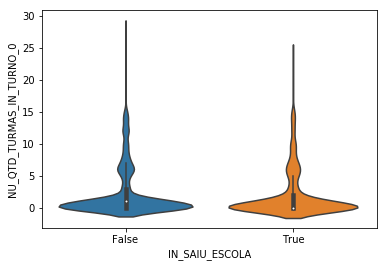

count   8139.00
mean       2.28
std        3.80
min        0.00
25%        0.00
50%        1.00
75%        2.00
max       28.00
Name: NU_QTD_TURMAS_IN_TURNO_0, dtype: float64

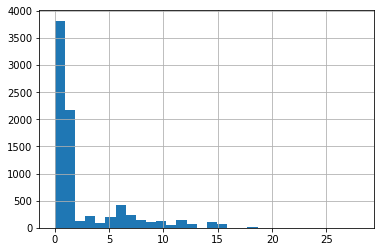

'0.0% de registros nulos'

'Variância: 10.44368021816474'

'Correlacao:'

NU_QTD_TURMAS_IN_TURNO_1  IN_SAIU_ESCOLA
NU_QTD_TURMAS_IN_TURNO_1                      1.00            0.05
IN_SAIU_ESCOLA                                0.05            1.00

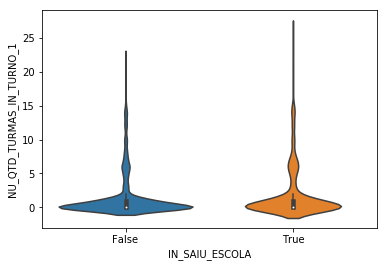

count   8139.00
mean       1.61
std        3.23
min        0.00
25%        0.00
50%        0.00
75%        1.00
max       26.00
Name: NU_QTD_TURMAS_IN_TURNO_1, dtype: float64

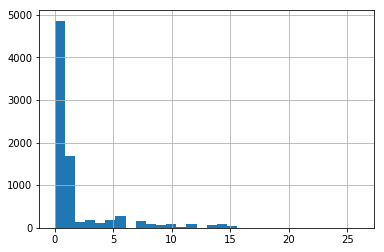

'0.0% de registros nulos'

'Variância: 18.28125'

'Correlacao:'

NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS  \
NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS                                1.00   
IN_SAIU_ESCOLA                                                    0.04   

                                    IN_SAIU_ESCOLA  
NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS            0.04  
IN_SAIU_ESCOLA                                1.00

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


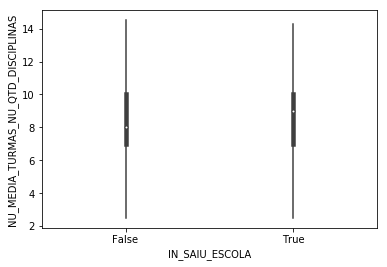

count   8139.00
mean        inf
std        4.28
min        0.00
25%        7.00
50%        8.00
75%       10.00
max       16.00
Name: NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS, dtype: float64

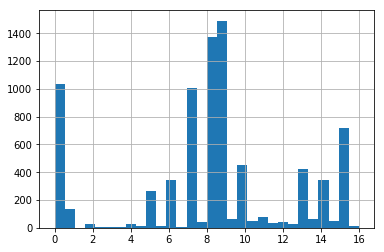

'0.0% de registros nulos'

'Variância: 1850.0605786323445'

'Correlacao:'

NU_MEDIA_TURMAS_NU_QTD_ALUNOS  IN_SAIU_ESCOLA
NU_MEDIA_TURMAS_NU_QTD_ALUNOS                           1.00            0.01
IN_SAIU_ESCOLA                                          0.01            1.00

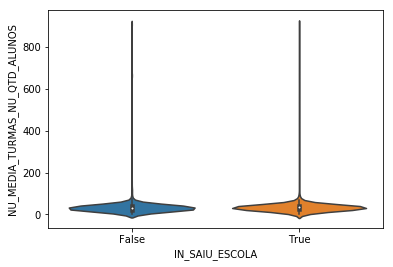

count   8139.00
mean      34.38
std       43.01
min        1.00
25%       22.00
50%       31.47
75%       41.70
max      910.00
Name: NU_MEDIA_TURMAS_NU_QTD_ALUNOS, dtype: float64

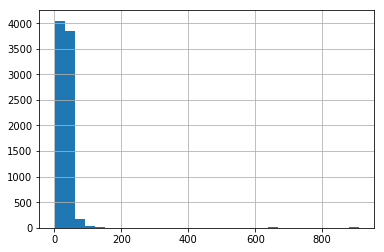

'0.0% de registros nulos'

'Variância: 0.0169219970703125'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0  \
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0                                     1.00   
IN_SAIU_ESCOLA                                                              0.03   

                                         IN_SAIU_ESCOLA  
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0            0.03  
IN_SAIU_ESCOLA                                     1.00

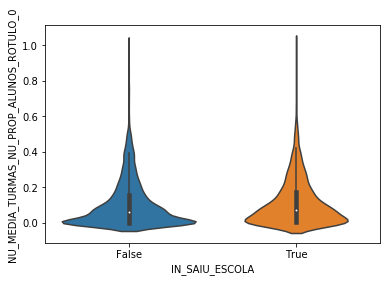

count   8139.00
mean       0.11
std        0.13
min        0.00
25%        0.00
50%        0.07
75%        0.16
max        1.00
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0, dtype: float64

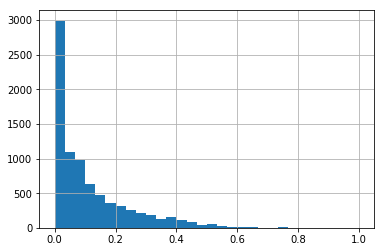

'0.0% de registros nulos'

'Variância: 0.055999755859375'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1  \
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1                                     1.00   
IN_SAIU_ESCOLA                                                             -0.05   

                                         IN_SAIU_ESCOLA  
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1           -0.05  
IN_SAIU_ESCOLA                                     1.00

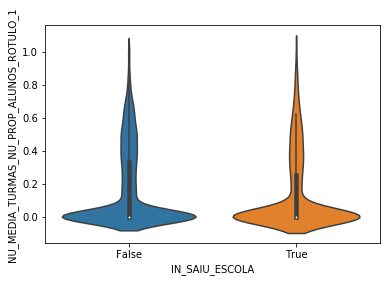

count   8139.00
mean       0.16
std        0.24
min        0.00
25%        0.00
50%        0.00
75%        0.32
max        1.00
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1, dtype: float64

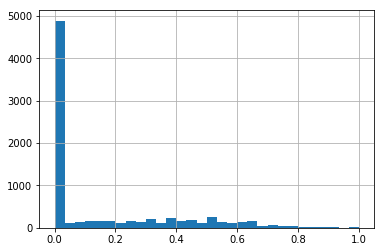

'0.0% de registros nulos'

'Variância: 0.054412841796875'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2  \
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2                                     1.00   
IN_SAIU_ESCOLA                                                              0.04   

                                         IN_SAIU_ESCOLA  
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2            0.04  
IN_SAIU_ESCOLA                                     1.00

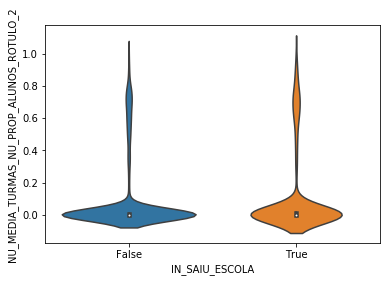

count   8139.00
mean       0.10
std        0.23
min        0.00
25%        0.00
50%        0.00
75%        0.01
max        1.00
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2, dtype: float64

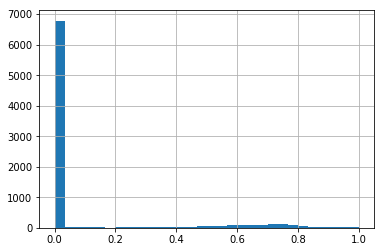

'0.0% de registros nulos'

'Variância: 0.0070953369140625'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3  \
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3                                     1.00   
IN_SAIU_ESCOLA                                                              0.04   

                                         IN_SAIU_ESCOLA  
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3            0.04  
IN_SAIU_ESCOLA                                     1.00

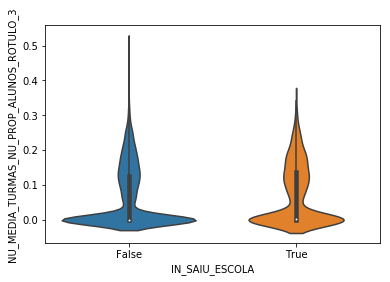

count   8139.00
mean       0.06
std        0.08
min        0.00
25%        0.00
50%        0.00
75%        0.13
max        0.50
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3, dtype: float64

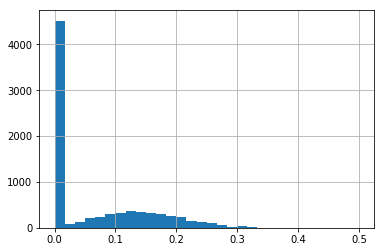

'0.0% de registros nulos'

'Variância: 0.046234130859375'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4  \
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4                                     1.00   
IN_SAIU_ESCOLA                                                             -0.06   

                                         IN_SAIU_ESCOLA  
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4           -0.06  
IN_SAIU_ESCOLA                                     1.00

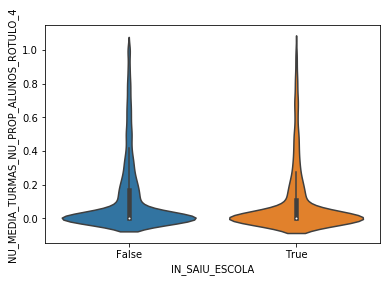

count   8139.00
mean       0.12
std        0.21
min        0.00
25%        0.00
50%        0.00
75%        0.16
max        1.00
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4, dtype: float64

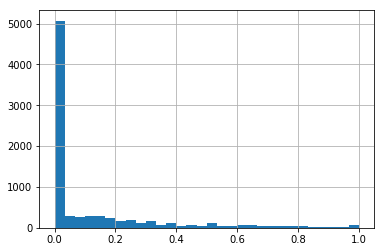

'0.0% de registros nulos'

'Variância: 0.02325439453125'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5  \
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5                                     1.00   
IN_SAIU_ESCOLA                                                              0.06   

                                         IN_SAIU_ESCOLA  
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5            0.06  
IN_SAIU_ESCOLA                                     1.00

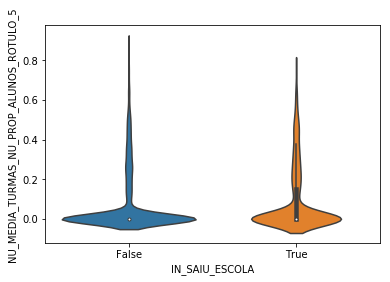

count   8139.00
mean       0.08
std        0.15
min        0.00
25%        0.00
50%        0.00
75%        0.05
max        0.88
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5, dtype: float64

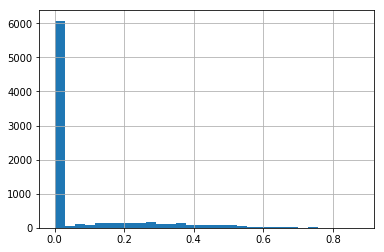

'0.0% de registros nulos'

'Variância: 0.0653076171875'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_6  \
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_6                                     1.00   
IN_SAIU_ESCOLA                                                             -0.01   

                                         IN_SAIU_ESCOLA  
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_6           -0.01  
IN_SAIU_ESCOLA                                     1.00

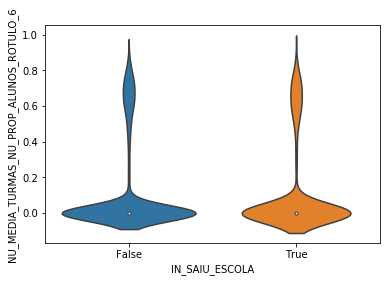

count   8139.00
mean       0.12
std        0.26
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.89
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_6, dtype: float64

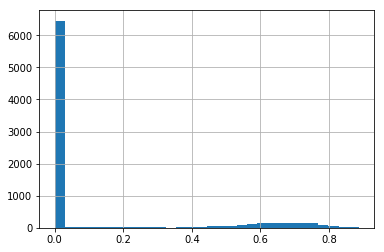

'0.0% de registros nulos'

'Variância: 0.0216827392578125'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7  \
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7                                     1.00   
IN_SAIU_ESCOLA                                                             -0.06   

                                         IN_SAIU_ESCOLA  
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7           -0.06  
IN_SAIU_ESCOLA                                     1.00

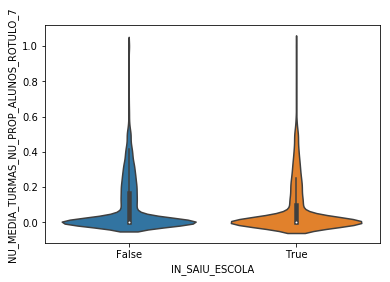

count   8139.00
mean       0.09
std        0.15
min        0.00
25%        0.00
50%        0.00
75%        0.15
max        1.00
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7, dtype: float64

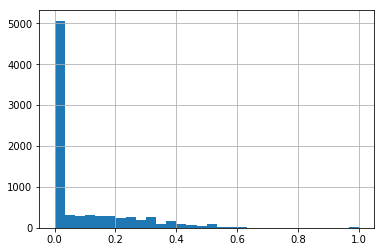

'0.0% de registros nulos'

'Variância: 0.0234832763671875'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8  \
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8                                     1.00   
IN_SAIU_ESCOLA                                                              0.08   

                                         IN_SAIU_ESCOLA  
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8            0.08  
IN_SAIU_ESCOLA                                     1.00

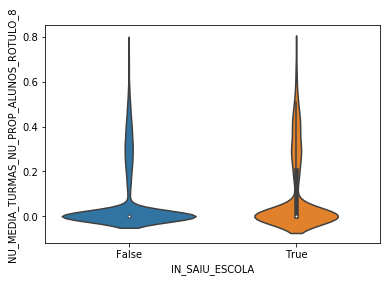

count   8139.00
mean       0.08
std        0.15
min        0.00
25%        0.00
50%        0.00
75%        0.04
max        0.75
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8, dtype: float64

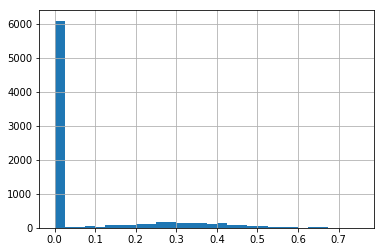

'0.0% de registros nulos'

'Variância: 0.01348876953125'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9  \
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9                                     1.00   
IN_SAIU_ESCOLA                                                             -0.02   

                                         IN_SAIU_ESCOLA  
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9           -0.02  
IN_SAIU_ESCOLA                                     1.00

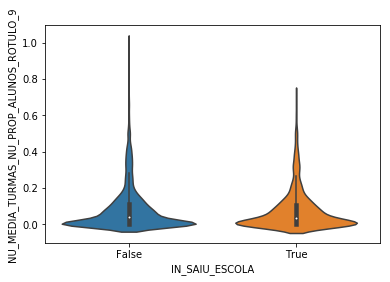

count   8139.00
mean       0.08
std        0.12
min        0.00
25%        0.00
50%        0.04
75%        0.11
max        1.00
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9, dtype: float64

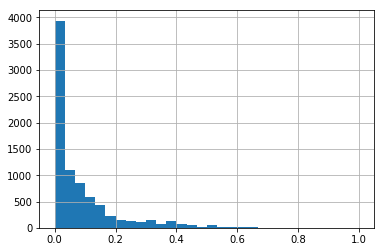

'0.0% de registros nulos'

'Variância: 18.65101012329134'

'Correlacao:'

NU_QTD_TURMAS_PROF_ESCOLA  IN_SAIU_ESCOLA
NU_QTD_TURMAS_PROF_ESCOLA                       1.00            0.02
IN_SAIU_ESCOLA                                  0.02            1.00

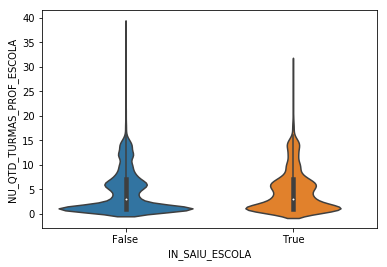

count   8139.00
mean       4.57
std        4.32
min        1.00
25%        1.00
50%        3.00
75%        7.00
max       38.00
Name: NU_QTD_TURMAS_PROF_ESCOLA, dtype: float64

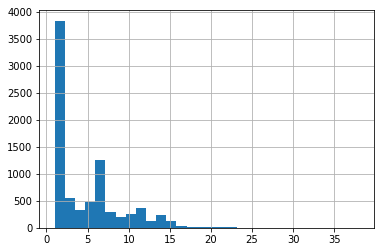

'0.0% de registros nulos'

'Variância: 0.2500237411591786'

'Correlacao:'

IN_NASCEU_DF_PROF  IN_SAIU_ESCOLA
IN_NASCEU_DF_PROF               1.00            0.06
IN_SAIU_ESCOLA                  0.06            1.00

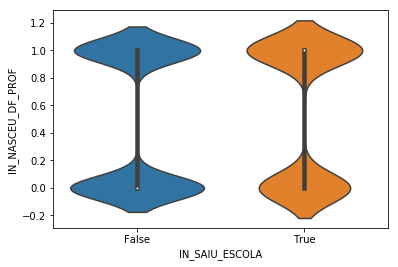

qtd   pc
1  4091 0.50
0  4048 0.50

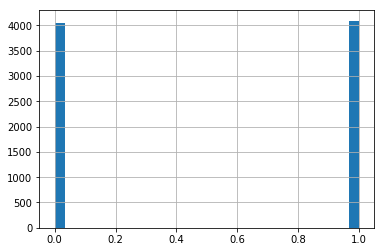

'0.0% de registros nulos'

'Variância: 0.24815473444312763'

'Correlacao:'

IN_ESPECIALIZACAO_PROF  IN_SAIU_ESCOLA
IN_ESPECIALIZACAO_PROF                    1.00           -0.05
IN_SAIU_ESCOLA                           -0.05            1.00

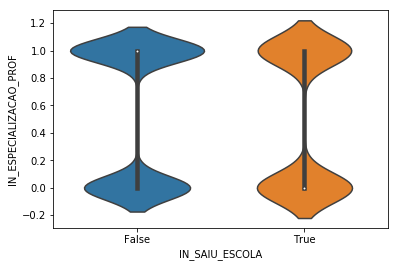

qtd   pc
1.00  4422 0.54
0.00  3717 0.46

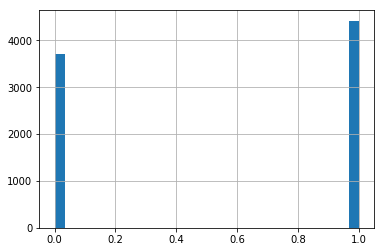

'0.0% de registros nulos'

'Variância: 0.21340658503810614'

'Correlacao:'

TP_COR_RACA_1_PROF  IN_SAIU_ESCOLA
TP_COR_RACA_1_PROF                1.00            0.01
IN_SAIU_ESCOLA                    0.01            1.00

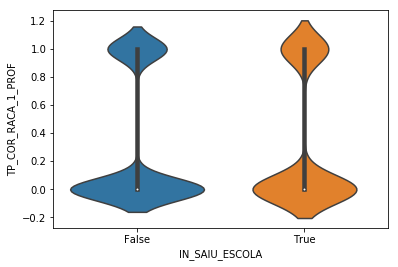

qtd   pc
0  5627 0.69
1  2512 0.31

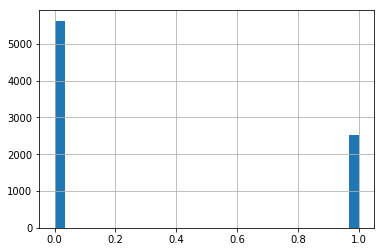

'0.0% de registros nulos'

'Variância: 0.22398289778989214'

'Correlacao:'

TP_COR_RACA_0_PROF  IN_SAIU_ESCOLA
TP_COR_RACA_0_PROF                1.00           -0.02
IN_SAIU_ESCOLA                   -0.02            1.00

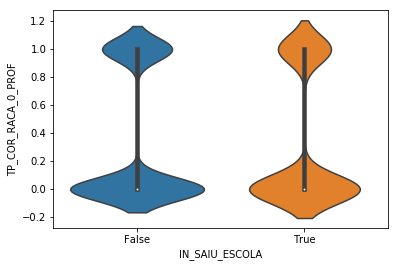

qtd   pc
0  5383 0.66
1  2756 0.34

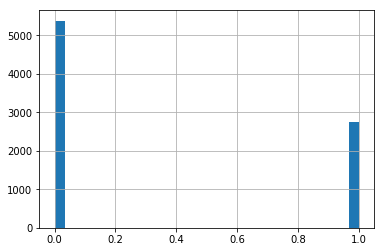

'0.0% de registros nulos'

'Variância: 0.21004054914502612'

'Correlacao:'

TP_COR_RACA_3_PROF  IN_SAIU_ESCOLA
TP_COR_RACA_3_PROF                1.00            0.00
IN_SAIU_ESCOLA                    0.00            1.00

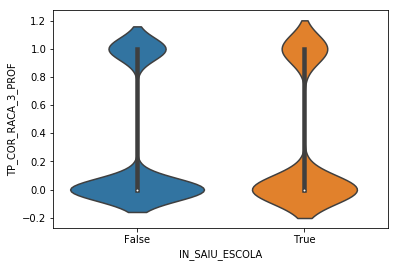

qtd   pc
0  5697 0.70
1  2442 0.30

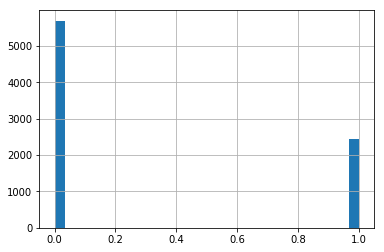

'0.0% de registros nulos'

'Variância: 57.512334728695045'

'Correlacao:'

NU_IDADE_REFERENCIA_PROF  IN_SAIU_ESCOLA
NU_IDADE_REFERENCIA_PROF                      1.00           -0.18
IN_SAIU_ESCOLA                               -0.18            1.00

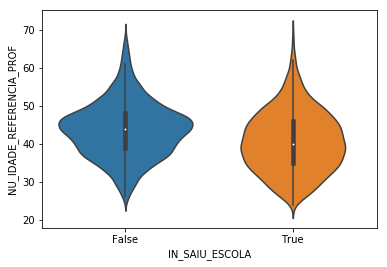

count   8139.00
mean      43.04
std        7.58
min       24.00
25%       38.00
50%       43.00
75%       48.00
max       69.00
Name: NU_IDADE_REFERENCIA_PROF, dtype: float64

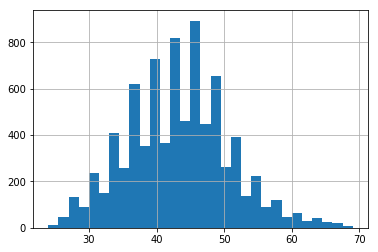

'0.0% de registros nulos'

'Variância: 5.416643559611658'

'Correlacao:'

CO_CLASSE_PROF  IN_SAIU_ESCOLA
CO_CLASSE_PROF            1.00            0.03
IN_SAIU_ESCOLA            0.03            1.00

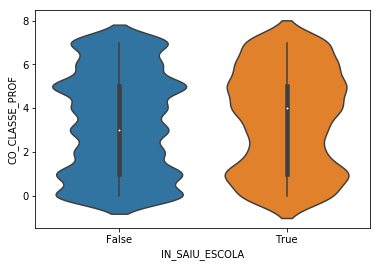

qtd   pc
5  1282 0.16
1  1230 0.15
0  1183 0.15
7   945 0.12
4   945 0.12
3   899 0.11
6   848 0.10
2   807 0.10

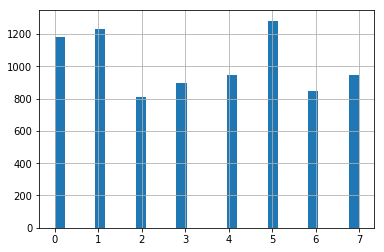

'0.0% de registros nulos'

'Variância: 0.1507568359375'

'Correlacao:'

IN_QUADRA_ESPORTES_SCHL  IN_SAIU_ESCOLA
IN_QUADRA_ESPORTES_SCHL                     1.00            0.02
IN_SAIU_ESCOLA                              0.02            1.00

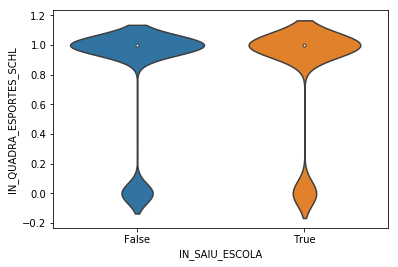

qtd   pc
1.00  6634 0.82
0.00  1505 0.18

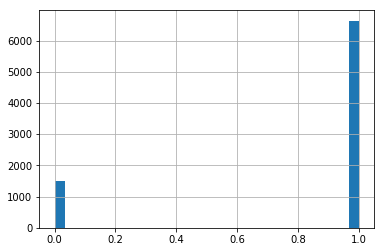

'0.0% de registros nulos'

'Variância: 0.2235107421875'

'Correlacao:'

IN_DESPENSA_SCHL  IN_SAIU_ESCOLA
IN_DESPENSA_SCHL              1.00           -0.02
IN_SAIU_ESCOLA               -0.02            1.00

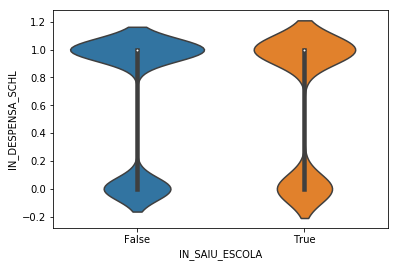

qtd   pc
1.00  5393 0.66
0.00  2746 0.34

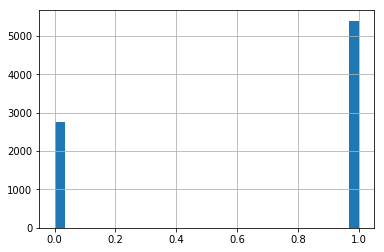

'0.0% de registros nulos'

'Variância: 0.249755859375'

'Correlacao:'

IN_AREA_VERDE_SCHL  IN_SAIU_ESCOLA
IN_AREA_VERDE_SCHL                1.00           -0.00
IN_SAIU_ESCOLA                   -0.00            1.00

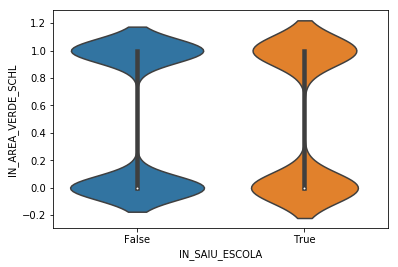

qtd   pc
0.00  4102 0.50
1.00  4037 0.50

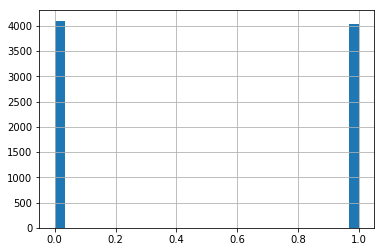

'0.0% de registros nulos'

'Variância: inf'

'Correlacao:'

NU_COMPUTADOR_SCHL  IN_SAIU_ESCOLA
NU_COMPUTADOR_SCHL                1.00           -0.06
IN_SAIU_ESCOLA                   -0.06            1.00

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


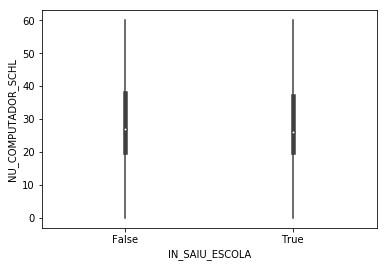

count   8139.00
mean        inf
std         inf
min        0.00
25%       20.00
50%       26.00
75%       38.00
max      639.00
Name: NU_COMPUTADOR_SCHL, dtype: float64

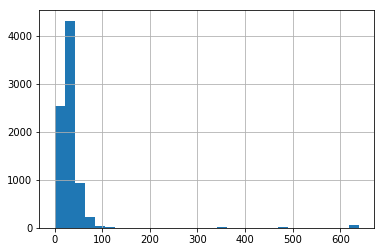

'0.0% de registros nulos'

'Variância: inf'

'Correlacao:'

NU_FUNCIONARIOS_SCHL  IN_SAIU_ESCOLA
NU_FUNCIONARIOS_SCHL                  1.00           -0.04
IN_SAIU_ESCOLA                       -0.04            1.00

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


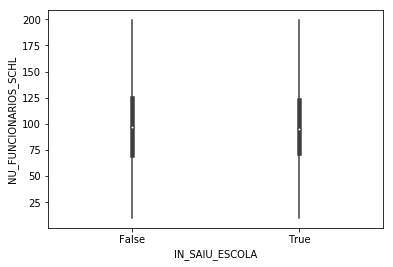

count   8139.00
mean        inf
std         inf
min       10.00
25%       70.00
50%       96.00
75%      125.00
max      392.00
Name: NU_FUNCIONARIOS_SCHL, dtype: float64

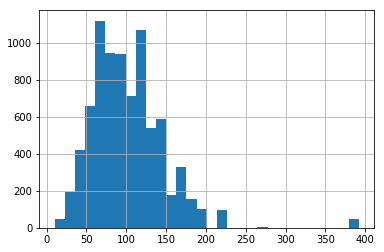

'0.0% de registros nulos'

'Variância: 9971.74928514577'

'Correlacao:'

NU_QTD_SETORES_CENSITARIOS_SCHL  \
NU_QTD_SETORES_CENSITARIOS_SCHL                             1.00   
IN_SAIU_ESCOLA                                             -0.02   

                                 IN_SAIU_ESCOLA  
NU_QTD_SETORES_CENSITARIOS_SCHL           -0.02  
IN_SAIU_ESCOLA                             1.00

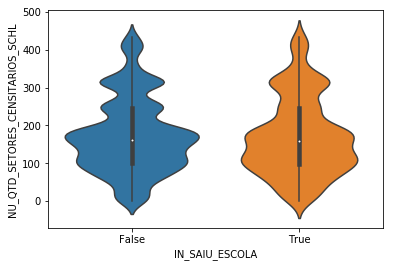

count   8139.00
mean     174.39
std       99.86
min        1.00
25%      100.00
50%      159.00
75%      247.00
max      432.00
Name: NU_QTD_SETORES_CENSITARIOS_SCHL, dtype: float64

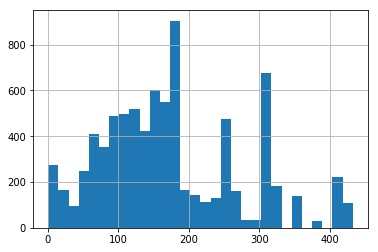

'0.0% de registros nulos'

'Variância: inf'

'Correlacao:'

NU_MEDIANA_RENDA_MEDIA_SCHL  IN_SAIU_ESCOLA
NU_MEDIANA_RENDA_MEDIA_SCHL                         1.00           -0.00
IN_SAIU_ESCOLA                                     -0.00            1.00

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


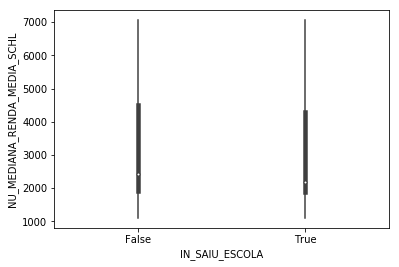

count    8139.00
mean         inf
std          inf
min      1101.00
25%      1905.00
50%      2356.00
75%      4500.00
max     14048.00
Name: NU_MEDIANA_RENDA_MEDIA_SCHL, dtype: float64

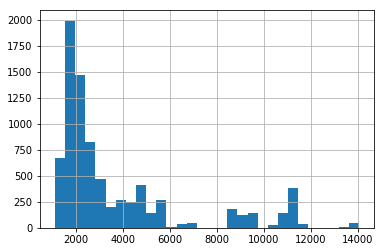

'0.0% de registros nulos'

'Variância: 0.0009388923645019531'

'Correlacao:'

NU_PROP_DOM_EM_AQUISICAO_SCHL  IN_SAIU_ESCOLA
NU_PROP_DOM_EM_AQUISICAO_SCHL                           1.00           -0.07
IN_SAIU_ESCOLA                                         -0.07            1.00

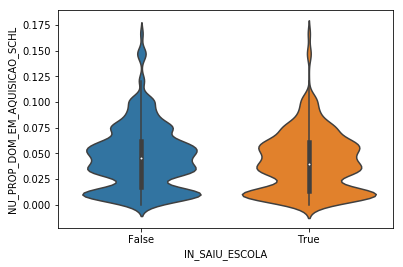

count   8139.00
mean       0.05
std        0.03
min        0.00
25%        0.02
50%        0.04
75%        0.06
max        0.17
Name: NU_PROP_DOM_EM_AQUISICAO_SCHL, dtype: float64

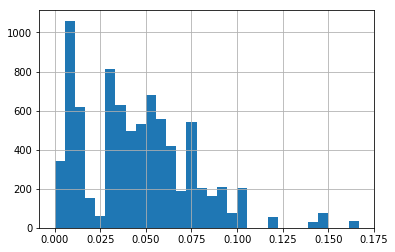

'0.0% de registros nulos'

'Variância: 0.0003101825714111328'

'Correlacao:'

NU_PROP_PSS_MULHERES_RSP_SCHL  IN_SAIU_ESCOLA
NU_PROP_PSS_MULHERES_RSP_SCHL                           1.00            0.01
IN_SAIU_ESCOLA                                          0.01            1.00

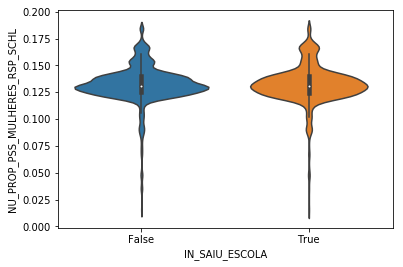

count   8139.00
mean       0.13
std        0.02
min        0.02
25%        0.13
50%        0.13
75%        0.14
max        0.18
Name: NU_PROP_PSS_MULHERES_RSP_SCHL, dtype: float64

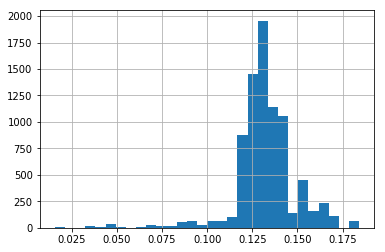

'0.0% de registros nulos'

'Variância: 0.0015554428100585938'

'Correlacao:'

NU_PROP_PSS_ABXO_12ANOS_SCHL  IN_SAIU_ESCOLA
NU_PROP_PSS_ABXO_12ANOS_SCHL                          1.00            0.03
IN_SAIU_ESCOLA                                        0.03            1.00

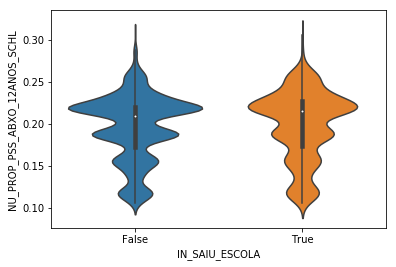

count   8139.00
mean       0.20
std        0.04
min        0.11
25%        0.17
50%        0.21
75%        0.22
max        0.30
Name: NU_PROP_PSS_ABXO_12ANOS_SCHL, dtype: float64

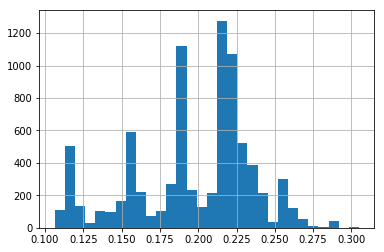

'0.0% de registros nulos'

'Variância: 175.96317398206895'

'Correlacao:'

ROTULO_ESCOLA_SCHL  IN_SAIU_ESCOLA
ROTULO_ESCOLA_SCHL                1.00            0.02
IN_SAIU_ESCOLA                    0.02            1.00

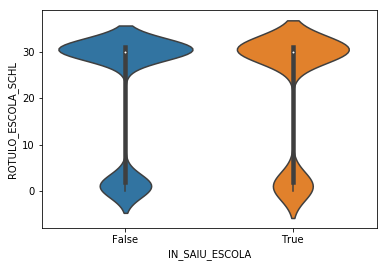

qtd   pc
31  3080 0.38
30  2755 0.34
2   1077 0.13
0    805 0.10
1    422 0.05

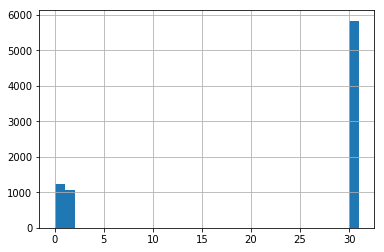

'0.0% de registros nulos'

'Variância: 0.18079225629666118'

'Correlacao:'

IN_SAIU_ESCOLA  IN_SAIU_ESCOLA
IN_SAIU_ESCOLA            1.00            1.00
IN_SAIU_ESCOLA            1.00            1.00

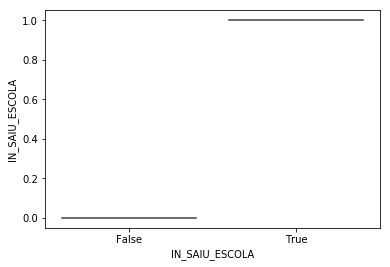

qtd   pc
False  6211 0.76
True   1928 0.24

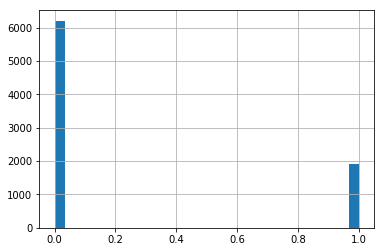

'0.0% de registros nulos'

'Variância: 2.87997300286726'

'Correlacao:'

NU_QTD_VEZES_PROF_ESC  IN_SAIU_ESCOLA
NU_QTD_VEZES_PROF_ESC                   1.00           -0.32
IN_SAIU_ESCOLA                         -0.32            1.00

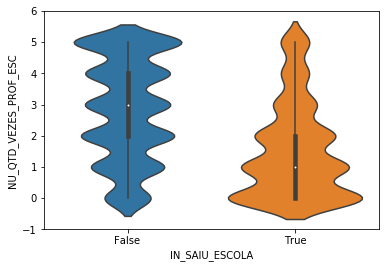

qtd   pc
2  1549 0.19
5  1497 0.18
1  1417 0.17
3  1278 0.16
0  1200 0.15
4  1198 0.15

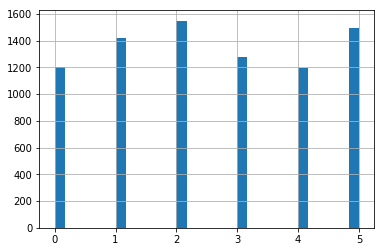

In [119]:
explora_df(model_vars,var_cor=['IN_SAIU_ESCOLA'])

In [184]:
cols_modelagem = ['NU_QTD_TURMAS_IN_TURNO_0', 'NU_QTD_TURMAS_IN_TURNO_1',
       'NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS', 'NU_MEDIA_TURMAS_NU_QTD_ALUNOS',
       'NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0',
       'NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1',
       'NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2',
       'NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3',
       'NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4',
       'NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5',
       'NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_6',
       'NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7',
       'NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8',
       'NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9', 
       'CO_CLASSE_PROF', 'ROTULO_ESCOLA',
       'IN_SAIU_ESCOLA']

In [214]:
#mv = model_vars[cols_modelagem]
mv = model_vars.copy()

In [215]:
mv.to_csv(f'{PATH_DF_CSV}model_vars.csv')

<img src='img/exploracao.gif'/>

# Início da exploração

In [209]:
# onde estao as escolas com maior turnover?

ge = mv.reset_index().groupby('CO_ENTIDADE')
p = ge['CO_PESSOA_FISICA'].nunique()
sch = pd.DataFrame()
sch['NU_QTD_PROF'] = p
sch['NU_SUM_SAIDAS'] = ge['IN_SAIU_ESCOLA'].sum()
sch = sch.merge(ajusta_colunas_int_df_inep( 
    pd.read_csv(f'{CSV_PATH}lclz_df/DADOS_ESCOLAS_PUBLICAS.csv',
                index_col='CO_ENTIDADE'))[['LAT','LONG']],
          right_index = True,
          left_index = True)
sch['TURN_OVER'] = sch.NU_SUM_SAIDAS/sch.NU_QTD_PROF

count   498.00
mean      0.24
std       0.20
min       0.00
25%       0.09
50%       0.20
75%       0.33
max       1.00
Name: TURN_OVER, dtype: float64

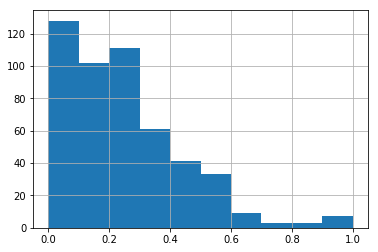

In [211]:
display(sch.TURN_OVER.describe())
sch.TURN_OVER.hist()

In [212]:
sch.TURN_OVER.sort_values(ascending=False).head(10)

CO_ENTIDADE
53015517   1.00
53015541   1.00
53014588   1.00
53002326   1.00
53006895   1.00
53016378   1.00
53001664   1.00
53004299   0.88
53005201   0.83
53001524   0.80
Name: TURN_OVER, dtype: float64

In [24]:
import folium
lclz_praca_3_poderes = [-15.7994, -47.8613]
map = folium.Map(location=lclz_praca_3_poderes, zoom_start=10)
a = sch.loc[sch.TURN_OVER<1].sort_values('TURN_OVER',ascending=False)
a = a.merge(escolas_df[2015].set_index('CO_ENTIDADE')[['NO_ENTIDADE']],left_index=True,right_index=True)
QTD_ESCOLAS = 10
display(a.head(QTD_ESCOLAS))
locations = a.head(QTD_ESCOLAS)[['LAT', 'LONG']]
n = a.head(QTD_ESCOLAS)['NO_ENTIDADE'].values
locationlist = locations.values.tolist()

for point in range(QTD_ESCOLAS):
    folium.Marker(locationlist[point],popup=f'{str(point+1)} - {n[point]}').add_to(map)
map

NameError: name 'sch' is not defined

In [238]:
sch['CO_CLASSE_ESCOLA'] = mv.reset_index()[['CO_ENTIDADE','ROTULO_ESCOLA']].\
                        drop_duplicates().set_index('CO_ENTIDADE')

In [241]:
sch.groupby('CO_CLASSE_ESCOLA')['TURN_OVER'].mean()

CO_CLASSE_ESCOLA
0    0.22
1    0.20
2    0.26
30   0.24
31   0.24
Name: TURN_OVER, dtype: float64

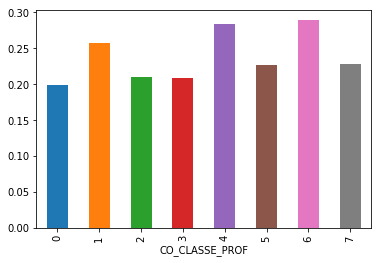

In [232]:
#vamos ver classes de professores e alunos
mv.groupby('CO_CLASSE_PROF')['IN_SAIU_ESCOLA'].mean().plot.bar()

<table><tr><td><img src='img/Simpson_model.jpg'></td><td>
    <h1>Modelagem</h1>
    </td></tr></table>

In [5]:
mv = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}model_vars.csv',index_col=['CO_PESSOA_FISICA','CO_ENTIDADE']))

In [12]:
display(mv.shape)
mv.dropna().shape

(8139, 35)

(8139, 35)

In [6]:
#inicia o processamento para a modelagem
teste = mv.sample(frac=0.20).copy()
a = mv.reset_index().merge(teste.reset_index(),on=['CO_PESSOA_FISICA','CO_ENTIDADE'],indicator=True,how='left')
a = a.loc[a._merge == 'left_only'][['CO_PESSOA_FISICA','CO_ENTIDADE']]
treino = mv.reset_index().merge(a,on=['CO_PESSOA_FISICA','CO_ENTIDADE']).set_index(['CO_PESSOA_FISICA','CO_ENTIDADE']).copy()



In [7]:
#Transformacoes
dict_tg_prof = treino.groupby('CO_CLASSE_PROF')['IN_SAIU_ESCOLA'].mean().to_dict()
dict_tg_esc = treino.groupby('ROTULO_ESCOLA_SCHL')['IN_SAIU_ESCOLA'].mean().to_dict()
def transforma_model_vars(md):
    cols_drop = []
    md['NU_MEAN_TG_CL_PROF'] = md.CO_CLASSE_PROF.apply(lambda x: dict_tg_prof[x])
    md['NU_MEAN_TG_CL_PROF'] = (md['NU_MEAN_TG_CL_PROF']*100)**2
    cols_drop.append('CO_CLASSE_PROF')
    md['NU_MEAN_TG_CL_ESCOLA'] = md.ROTULO_ESCOLA_SCHL.apply(lambda x: dict_tg_esc[x])
    md['NU_MEAN_TG_CL_ESCOLA'] = (md['NU_MEAN_TG_CL_ESCOLA']*100)**2
    cols_drop.append('ROTULO_ESCOLA_SCHL')
    return md.drop(cols_drop,axis=1)

In [8]:
#montagem das bases de treino e de teste
def monta_bases(df_tr,df_ts,transforma=True,tg = 'IN_SAIU_ESCOLA',ft=None):
    if ft:
        df_tr = df_tr[ft + [tg]]
        df_ts = df_ts[ft + [tg]]
    dftr = df_tr.drop(tg,axis=1)
    dfts = df_ts.drop(tg,axis=1)
    if transforma:
        dftr = transforma_model_vars(dftr)
        dfts = transforma_model_vars(dfts)
    y_train = df_tr[tg].values
    X_train = dftr.values
    mms = MinMaxScaler().fit(X_train)
    X_train = mms.transform(X_train)
    y_test = df_ts[tg].values
    X_test = mms.transform(dfts.values)
    return X_train,y_train, X_test,y_test, dfts.columns
#clf = modela(X_train,y_train)


Base de TREINO
             precision    recall  f1-score   support

      False       0.98      1.00      0.99      1264
       True       0.99      0.91      0.95       364

avg / total       0.98      0.98      0.98      1628

Base de TESTE
             precision    recall  f1-score   support

      False       0.78      0.94      0.85      4947
       True       0.48      0.17      0.25      1564

avg / total       0.71      0.76      0.71      6511



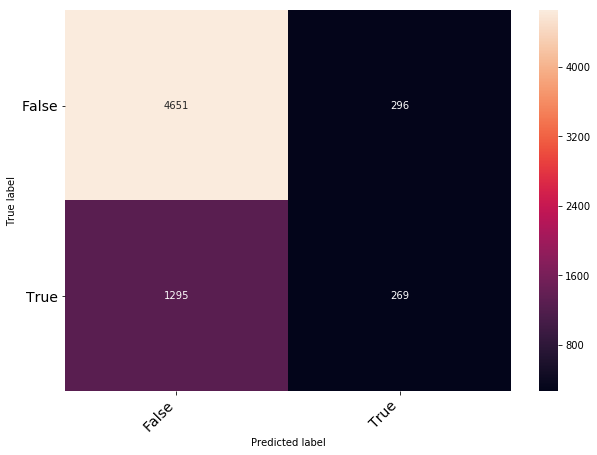

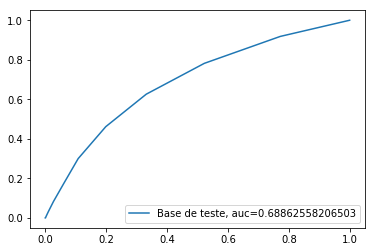

Feature ranking:
1. feature NU_QTD_VEZES_PROF_ESC (0.099996)
2. feature NU_IDADE_REFERENCIA_PROF (0.067405)
3. feature NU_MEDIA_TURMAS_NU_QTD_ALUNOS (0.052167)
4. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0 (0.047842)
5. feature NU_QTD_SETORES_CENSITARIOS_SCHL (0.043424)
6. feature NU_COMPUTADOR_SCHL (0.043154)
7. feature NU_MEDIANA_RENDA_MEDIA_SCHL (0.040644)
8. feature NU_PROP_PSS_ABXO_12ANOS_SCHL (0.039027)
9. feature NU_FUNCIONARIOS_SCHL (0.038952)
10. feature NU_PROP_DOM_EM_AQUISICAO_SCHL (0.038638)
11. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9 (0.038483)
12. feature NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS (0.036291)
13. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3 (0.031573)
14. feature NU_PROP_PSS_MULHERES_RSP_SCHL (0.029983)
15. feature NU_MEAN_TG_CL_PROF (0.028010)
16. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7 (0.027784)
17. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2 (0.027347)
18. feature NU_QTD_TURMAS_PROF_ESCOLA (0.026040)
19. feature NU_MEDIA_TURMAS_NU_P

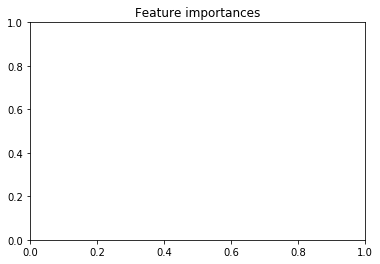

In [11]:
#RandomForest simples:
X_test,y_test,X_train,y_train, features = monta_bases(treino,teste)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train);
ft = avalia(X_test,y_test,X_train,y_train, clf,features)


/home/itsbarreto/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/itsbarreto/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Base de TREINO
             precision    recall  f1-score   support

      False       0.85      0.99      0.92      1264
       True       0.91      0.40      0.56       364

avg / total       0.87      0.86      0.84      1628

Base de TESTE
             precision    recall  f1-score   support

      False       0.79      0.94      0.86      4947
       True       0.53      0.21      0.30      1564

avg / total       0.73      0.77      0.73      6511



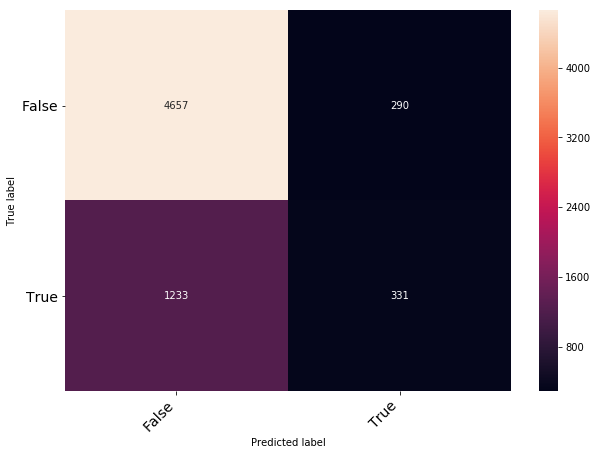

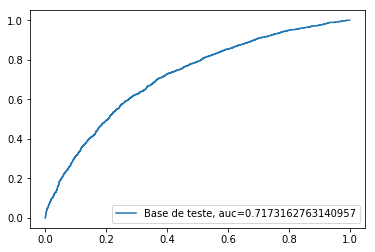

Feature ranking:
1. feature NU_QTD_VEZES_PROF_ESC (0.092044)
2. feature NU_IDADE_REFERENCIA_PROF (0.073323)
3. feature NU_MEDIA_TURMAS_NU_QTD_ALUNOS (0.068643)
4. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2 (0.067083)
5. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0 (0.054602)
6. feature NU_PROP_DOM_EM_AQUISICAO_SCHL (0.049922)
7. feature NU_QTD_SETORES_CENSITARIOS_SCHL (0.049922)
8. feature NU_COMPUTADOR_SCHL (0.046802)
9. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5 (0.043682)
10. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9 (0.039002)
11. feature NU_PROP_PSS_ABXO_12ANOS_SCHL (0.035881)
12. feature NU_MEDIANA_RENDA_MEDIA_SCHL (0.035881)
13. feature NU_FUNCIONARIOS_SCHL (0.034321)
14. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7 (0.032761)
15. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3 (0.032761)
16. feature NU_PROP_PSS_MULHERES_RSP_SCHL (0.031201)
17. feature NU_QTD_TURMAS_IN_TURNO_1 (0.024961)
18. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8 (0.024961)
19. fea

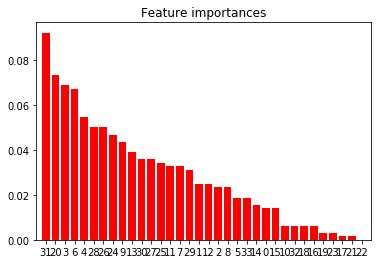

In [15]:
#XGBoost simples:
X_test,y_test,X_train,y_train, features = monta_bases(treino,teste)
import xgboost 
clf = xgboost.XGBClassifier(random_state=0)
clf.fit(X_train,y_train);
ft = avalia(X_test,y_test,X_train,y_train, clf,features)


In [19]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [20]:
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

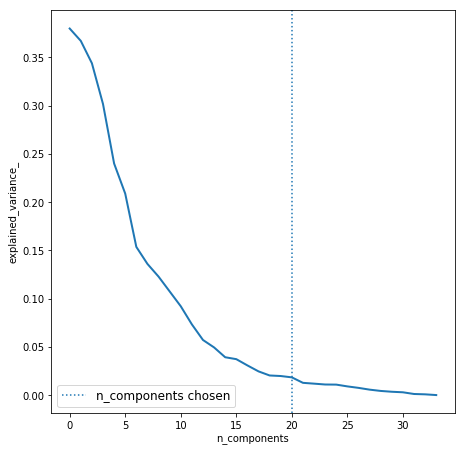

In [28]:
pca.fit(X_train)

plt.figure(1, figsize=(8, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [5, 20, 34]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_train, y_train)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()
